# Assignment 4

# INFO6105 Data Science Engineering Methods and Tools

Assignment-4 Combining Data Cleaning, Feature Selection, Modeling, and Interpretability

##Abstract

Data Cleaning, Feature Selection, Modeling, and Interpretability: A Unified Approach
In the evolving field of data science, the journey from raw data to actionable insights encompasses several pivotal stages: Data Cleaning, Feature Selection, Modeling, and Interpretability. Each stage plays a crucial role in ensuring the reliability and relevance of the findings, ultimately guiding strategic decisions. This report consolidates these stages into a cohesive analysis, demonstrating how they interlink to produce robust predictive models.

Data Cleaning
Data Cleaning is the foundational step that directly influences the quality of the outcomes. This process involves identifying and correcting inaccuracies, handling missing values, and removing duplicates. In our dataset, we began by exploring the types of data, categorizing them into numerical and categorical variables. We identified missing values across different features and employed techniques such as mean imputation for numerical data and mode imputation for categorical data to address them. Furthermore, outliers were detected through statistical methods like the Interquartile Range (IQR) and were treated by either capping or removing, based on their impact on the dataset's distribution.

Feature Selection
Feature Selection is pivotal in enhancing the model's efficiency and interpretability by eliminating redundant or irrelevant variables. We applied three primary methods to identify the most significant features for our predictive model:

Correlation Analysis: Evaluating the linear relationship between independent variables and the target variable to exclude features with negligible correlations.
Wrapper Methods (Forward Selection): Iteratively adding features that contribute most to the model's performance until no significant improvement is observed.
Feature Importance from Model: Utilizing models like Random Forest to gauge the importance of each feature based on the impact of their removal on model accuracy.
These methods provided a reduced set of variables that are highly predictive of the target outcome, streamlining the modeling process.

Modeling
With a clean and refined dataset, we proceeded to the modeling phase. We selected a variety of models to ensure a comprehensive analysis, including Logistic Regression, Decision Trees, and Random Forest. Each model was trained on the training dataset and validated using a separate test set to evaluate its performance. The evaluation criteria included accuracy, precision, recall, and the Area Under the Receiver Operating Characteristic Curve (AUC-ROC). Cross-validation techniques were also applied to mitigate overfitting and ensure the model's generalizability.

Interpretability
The final stage focused on the interpretability of our models, ensuring that the outcomes are understandable and actionable. For Logistic Regression, we examined the coefficients to assess the influence of each feature. Decision Trees provided a visual representation of how decisions are made based on feature values. Meanwhile, Random Forest's feature importance scores highlighted the variables most contributing to predictive accuracy. We also employed techniques like SHAP (SHapley Additive exPlanations) to offer insights into the impact of each feature on the model's predictions.

#Dataset

The dataset consists of socio-economic information and credit card bill payments related information of the customers. Such data helps the financial institutions to predict if an applicant is 'good' or 'bad' client and whehter their credit card should be approved or not.

The dataset consists of 2 csv files.

* **application_record.csv** - It is the table that has information about the customer regarding their application, financial and household information including all the assets.

1. `ID`: `Client identification number`
2. `CODE_GEN`: `Client gender`
3. `FLAG_OWN_CAR`: `Is there a car?`
4. `FLAG_OWN_REALTY`: `Is there a property?`
5. `CNT_CHILDREN`: `Number of children`
6. `AMT_INCOME_TOTAL`: `Total annual income`
7. `NAME_INCOME_TYPE`: `Income category`
8. `NAME_EDUCATION_TYPE`: `Education level of the client`
9. `NAME_FAMILY_STATUS`: `Marital status`
10. `NAME_HOUSING_TYPE`: `Type of living`
11. `DAYS_BIRTH`: `	Count backwards from current day (0), -1 means yesterday`
12. `DAYS_EMPLOYED`: `Count backwards from current day(0). If positive, it means the person currently unemployed.`
13. `FLAG_MOBIL`: `Is there a mobile phone?`
14. `FLAG_WORK_PHONE`: `Is there a work phone?`
15. `FLAG_PHONE`: `Is there a phone?`
16. `FLAG_EMAIL`: `Is there any email?`
17. `OCCUPATION_TYPE`: `Occupation of the client`
18. `CNT_FAM_MEMBERS`: `Size of the Family`

* **credit_records.csv** - It its the table that has all the payment related information for a given customer.

1. `ID`: `Client identification number`
2. `MONTH_BALANCE`: `The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on`
3. `STATUS`: `0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month`

Both the tables are connected with `ID`.

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
from sklearn.model_selection import KFold, cross_val_score,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1 = pd.read_csv('https://raw.githubusercontent.com/bhagyatrivedi/DSEM_dataset/main/application_record.csv');

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1.head()

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005          -4542   
1        Civil marriage   Rented apartment      -12005          -4542   
2               Married  House / apartment      -21474          -1134   
3  Single / not married  House / apartment      -19110          -3051   
4  Single / not married  House / apartment      -19110          -3051   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0           1                1           0           0             NaN   
1           1                1           0           0             NaN   
2           1                0           0           0  Security staff   
3           1                0           1           1     Sales staff   
4           1                0           1           1     Sales staff   

   CNT_FAM_MEMBERS  
0              2.0  
1              2.0  
2              2.0  
3              1.0  
4              1.0

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1.shape

(438557, 18)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1['ID'].duplicated().sum()

47

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1 = df1.drop_duplicates(subset='ID',keep='first')

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1.shape

(438510, 18)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1.columns[1:]

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134193
CNT_FAM_MEMBERS             0
dtype: int64

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1['NAME_INCOME_TYPE'].unique()

array(['Working', 'Commercial associate', 'Pensioner', 'State servant',
       'Student'], dtype=object)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1['NAME_EDUCATION_TYPE'].unique()

array(['Higher education', 'Secondary / secondary special',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1['NAME_FAMILY_STATUS'].unique()

array(['Civil marriage', 'Married', 'Single / not married', 'Separated',
       'Widow'], dtype=object)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1['NAME_HOUSING_TYPE'].unique()

array(['Rented apartment', 'House / apartment', 'Municipal apartment',
       'With parents', 'Co-op apartment', 'Office apartment'],
      dtype=object)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1['FLAG_MOBIL'].value_counts()

1    438510
Name: FLAG_MOBIL, dtype: int64

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1['FLAG_WORK_PHONE'].unique()

array([1, 0])

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1['FLAG_PHONE'].unique()

array([0, 1])

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1['FLAG_EMAIL'].unique()

array([0, 1])

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1['OCCUPATION_TYPE'].value_counts(dropna=False)

NaN                      134193
Laborers                  78231
Core staff                43000
Sales staff               41094
Managers                  35481
Drivers                   26090
High skill tech staff     17285
Accountants               15983
Medicine staff            13518
Cooking staff              8076
Security staff             7993
Cleaning staff             5843
Private service staff      3455
Low-skill Laborers         2140
Secretaries                2044
Waiters/barmen staff       1665
Realty agents              1041
HR staff                    774
IT staff                    604
Name: OCCUPATION_TYPE, dtype: int64

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1['OCCUPATION_TYPE'].fillna('not_specified',inplace=True)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1['OCCUPATION_TYPE'].value_counts(dropna=False)

not_specified            134193
Laborers                  78231
Core staff                43000
Sales staff               41094
Managers                  35481
Drivers                   26090
High skill tech staff     17285
Accountants               15983
Medicine staff            13518
Cooking staff              8076
Security staff             7993
Cleaning staff             5843
Private service staff      3455
Low-skill Laborers         2140
Secretaries                2044
Waiters/barmen staff       1665
Realty agents              1041
HR staff                    774
IT staff                    604
Name: OCCUPATION_TYPE, dtype: int64

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1.describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T

count          mean            std        min  \
ID                438510.0  6.022035e+06  571496.239776  5008804.0   
CNT_CHILDREN      438510.0  4.273814e-01       0.724874        0.0   
AMT_INCOME_TOTAL  438510.0  1.875254e+05  110089.279583    26100.0   
DAYS_BIRTH        438510.0 -1.599802e+04    4185.016222   -25201.0   
DAYS_EMPLOYED     438510.0  6.056619e+04  138770.072835   -17531.0   
FLAG_MOBIL        438510.0  1.000000e+00       0.000000        1.0   
FLAG_WORK_PHONE   438510.0  2.061276e-01       0.404524        0.0   
FLAG_PHONE        438510.0  2.877699e-01       0.452724        0.0   
FLAG_EMAIL        438510.0  1.082005e-01       0.310634        0.0   
CNT_FAM_MEMBERS   438510.0  2.194463e+00       0.897192        1.0   

                          1%          2%          3%          4%          5%  \
ID                5024429.09  5041533.18  5054216.27  5068686.36  5091807.45   
CNT_CHILDREN            0.00        0.00        0.00        0.00        0.00   
AMT_INCOME_TOTAL    54000.00    67500.00    67500.00    72000.00    76500.00   
DAYS_BIRTH         -24013.00   -23642.00   -23413.00   -23181.00   -22972.00   
DAYS_EMPLOYED      -10913.00    -9533.00    -8486.00    -7792.00    -7205.00   
FLAG_MOBIL              1.00        1.00        1.00        1.00        1.00   
FLAG_WORK_PHONE         0.00        0.00        0.00        0.00        0.00   
FLAG_PHONE              0.00        0.00        0.00        0.00        0.00   
FLAG_EMAIL              0.00        0.00        0.00        0.00        0.00   
CNT_FAM_MEMBERS         1.00        1.00        1.00        1.00        1.00   

                        10%         25%         50%         75%        90%  \
ID                5181098.9  5609362.25  6047719.50  6454160.75  6722537.1   
CNT_CHILDREN            0.0        0.00        0.00        1.00        2.0   
AMT_INCOME_TOTAL    90000.0   121500.00   160940.25   225000.00   315000.0   
DAYS_BIRTH         -21982.0   -19484.00   -15630.00   -12514.00   -10519.0   
DAYS_EMPLOYED       -5295.0    -3103.00    -1467.00     -371.00   365243.0   
FLAG_MOBIL              1.0        1.00        1.00        1.00        1.0   
FLAG_WORK_PHONE         0.0        0.00        0.00        0.00        1.0   
FLAG_PHONE              0.0        0.00        0.00        1.00        1.0   
FLAG_EMAIL              0.0        0.00        0.00        0.00        1.0   
CNT_FAM_MEMBERS         1.0        2.00        2.00        3.00        3.0   

                         95%         96%        97%         98%         99%  \
ID                6800362.55  6830288.64  7009897.1  7271099.44  7636888.19   
CNT_CHILDREN            2.00        2.00        2.0        2.00        3.00   
AMT_INCOME_TOTAL   360000.00   382500.00   405000.0   450000.00   540000.00   
DAYS_BIRTH          -9889.00    -9655.00    -9343.0    -9011.00    -8575.00   
DAYS_EMPLOYED      365243.00   365243.00   365243.0   365243.00   365243.00   
FLAG_MOBIL              1.00        1.00        1.0        1.00        1.00   
FLAG_WORK_PHONE         1.00        1.00        1.0        1.00        1.00   
FLAG_PHONE              1.00        1.00        1.0        1.00        1.00   
FLAG_EMAIL              1.00        1.00        1.0        1.00        1.00   
CNT_FAM_MEMBERS         4.00        4.00        4.0        4.00        5.00   

                        max  
ID                7999952.0  
CNT_CHILDREN           19.0  
AMT_INCOME_TOTAL  6750000.0  
DAYS_BIRTH          -7489.0  
DAYS_EMPLOYED      365243.0  
FLAG_MOBIL              1.0  
FLAG_WORK_PHONE         1.0  
FLAG_PHONE              1.0  
FLAG_EMAIL              1.0  
CNT_FAM_MEMBERS        20.0

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

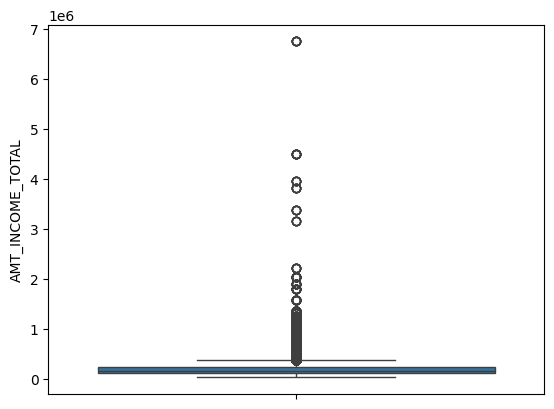

In [ ]:
sns.boxplot(df1,y='AMT_INCOME_TOTAL')

plt.show()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

<Axes: ylabel='CNT_CHILDREN'>

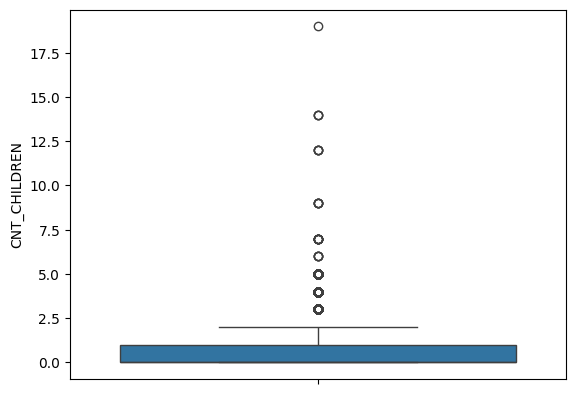

In [ ]:
sns.boxplot(data=df1, y=df1['CNT_CHILDREN'])

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1['DAYS_EMPLOYED'].max()


365243

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

<Axes: ylabel='DAYS_BIRTH'>

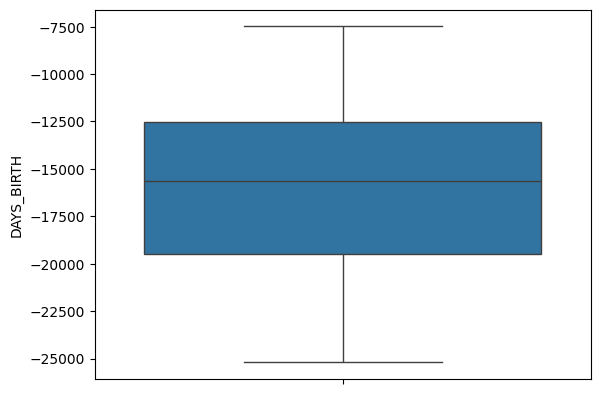

In [ ]:
sns.boxplot(data=df1, y=df1['DAYS_BIRTH'])

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

<Axes: ylabel='DAYS_EMPLOYED'>

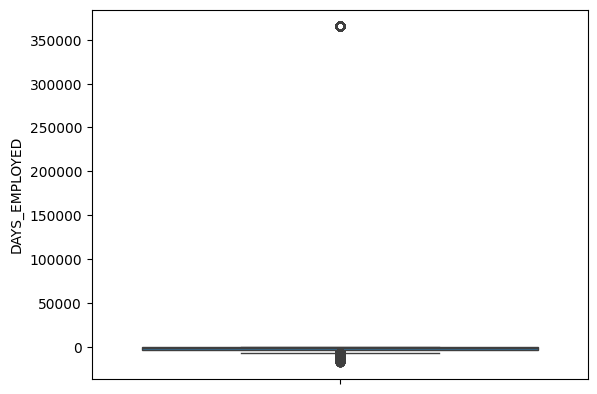

In [ ]:
sns.boxplot(data=df1, y=df1['DAYS_EMPLOYED'])

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1[df1['DAYS_EMPLOYED']>=0]['DAYS_EMPLOYED'].value_counts()

365243    75324
Name: DAYS_EMPLOYED, dtype: int64

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1['DAYS_EMPLOYED'].replace(365243,0,inplace=True)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1[df1['DAYS_EMPLOYED']>=0]['DAYS_EMPLOYED'].value_counts()

0    75324
Name: DAYS_EMPLOYED, dtype: int64

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1['AGE_YEARS']=round(-df1['DAYS_BIRTH']/365.2425,0)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1['YEARS_EMPLOYED']=round(-df1['DAYS_EMPLOYED']/365.2425)
df1.loc[df1['YEARS_EMPLOYED']<0,'YEARS_EMPLOYED']=0

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1.drop(columns=["DAYS_BIRTH","DAYS_EMPLOYED"],inplace=True)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1.describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T

count          mean            std        min  \
ID                438510.0  6.022035e+06  571496.239776  5008804.0   
CNT_CHILDREN      438510.0  4.273814e-01       0.724874        0.0   
AMT_INCOME_TOTAL  438510.0  1.875254e+05  110089.279583    26100.0   
FLAG_MOBIL        438510.0  1.000000e+00       0.000000        1.0   
FLAG_WORK_PHONE   438510.0  2.061276e-01       0.404524        0.0   
FLAG_PHONE        438510.0  2.877699e-01       0.452724        0.0   
FLAG_EMAIL        438510.0  1.082005e-01       0.310634        0.0   
CNT_FAM_MEMBERS   438510.0  2.194463e+00       0.897192        1.0   
AGE_YEARS         438510.0  4.380453e+01      11.465521       21.0   
YEARS_EMPLOYED    438510.0  5.956069e+00       6.574244        0.0   

                          1%          2%          3%          4%          5%  \
ID                5024429.09  5041533.18  5054216.27  5068686.36  5091807.45   
CNT_CHILDREN            0.00        0.00        0.00        0.00        0.00   
AMT_INCOME_TOTAL    54000.00    67500.00    67500.00    72000.00    76500.00   
FLAG_MOBIL              1.00        1.00        1.00        1.00        1.00   
FLAG_WORK_PHONE         0.00        0.00        0.00        0.00        0.00   
FLAG_PHONE              0.00        0.00        0.00        0.00        0.00   
FLAG_EMAIL              0.00        0.00        0.00        0.00        0.00   
CNT_FAM_MEMBERS         1.00        1.00        1.00        1.00        1.00   
AGE_YEARS              23.00       25.00       26.00       26.00       27.00   
YEARS_EMPLOYED          0.00        0.00        0.00        0.00        0.00   

                        10%         25%         50%         75%        90%  \
ID                5181098.9  5609362.25  6047719.50  6454160.75  6722537.1   
CNT_CHILDREN            0.0        0.00        0.00        1.00        2.0   
AMT_INCOME_TOTAL    90000.0   121500.00   160940.25   225000.00   315000.0   
FLAG_MOBIL              1.0        1.00        1.00        1.00        1.0   
FLAG_WORK_PHONE         0.0        0.00        0.00        0.00        1.0   
FLAG_PHONE              0.0        0.00        0.00        1.00        1.0   
FLAG_EMAIL              0.0        0.00        0.00        0.00        1.0   
CNT_FAM_MEMBERS         1.0        2.00        2.00        3.00        3.0   
AGE_YEARS              29.0       34.00       43.00       53.00       60.0   
YEARS_EMPLOYED          0.0        1.00        4.00        8.00       14.0   

                         95%         96%        97%         98%         99%  \
ID                6800362.55  6830288.64  7009897.1  7271099.44  7636888.19   
CNT_CHILDREN            2.00        2.00        2.0        2.00        3.00   
AMT_INCOME_TOTAL   360000.00   382500.00   405000.0   450000.00   540000.00   
FLAG_MOBIL              1.00        1.00        1.0        1.00        1.00   
FLAG_WORK_PHONE         1.00        1.00        1.0        1.00        1.00   
FLAG_PHONE              1.00        1.00        1.0        1.00        1.00   
FLAG_EMAIL              1.00        1.00        1.0        1.00        1.00   
CNT_FAM_MEMBERS         4.00        4.00        4.0        4.00        5.00   
AGE_YEARS              63.00       63.00       64.0       65.00       66.00   
YEARS_EMPLOYED         20.00       21.00       23.0       26.00       30.00   

                        max  
ID                7999952.0  
CNT_CHILDREN           19.0  
AMT_INCOME_TOTAL  6750000.0  
FLAG_MOBIL              1.0  
FLAG_WORK_PHONE         1.0  
FLAG_PHONE              1.0  
FLAG_EMAIL              1.0  
CNT_FAM_MEMBERS        20.0  
AGE_YEARS              69.0  
YEARS_EMPLOYED         48.0

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1['ID'].duplicated().sum()

0

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

<Axes: ylabel='AMT_INCOME_TOTAL'>

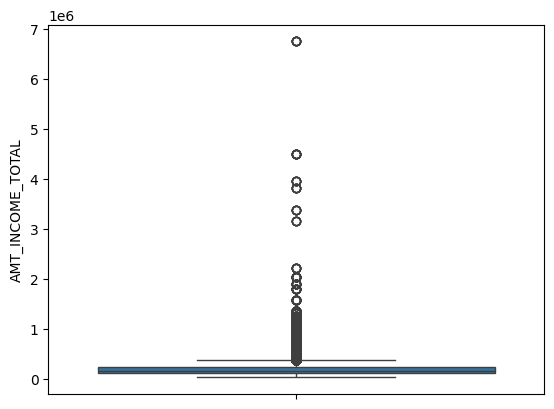

In [ ]:
sns.boxplot(df1,y='AMT_INCOME_TOTAL')

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1[df1['AMT_INCOME_TOTAL']>540000]

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
267     5009092           M            Y               Y             1   
268     5009094           M            Y               Y             1   
269     5009095           M            Y               Y             1   
270     6153741           M            Y               Y             1   
492     5009359           F            Y               N             0   
...         ...         ...          ...             ...           ...   
438095  6630576           F            Y               Y             1   
438255  6697842           M            N               Y             0   
438294  6715605           M            Y               Y             3   
438295  6715606           M            Y               Y             3   
438337  6743549           F            N               Y             0   

        AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
267             765000.0               Working               Higher education   
268             765000.0               Working               Higher education   
269             765000.0               Working               Higher education   
270             765000.0               Working               Higher education   
492             900000.0               Working               Higher education   
...                  ...                   ...                            ...   
438095          675000.0             Pensioner               Higher education   
438255          675000.0  Commercial associate  Secondary / secondary special   
438294          585000.0  Commercial associate               Higher education   
438295          585000.0  Commercial associate               Higher education   
438337         1215000.0               Working  Secondary / secondary special   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  FLAG_MOBIL  FLAG_WORK_PHONE  \
267                  Married  House / apartment           1                1   
268                  Married  House / apartment           1                1   
269                  Married  House / apartment           1                1   
270                  Married  House / apartment           1                1   
492     Single / not married  House / apartment           1                0   
...                      ...                ...         ...              ...   
438095        Civil marriage  House / apartment           1                0   
438255  Single / not married  House / apartment           1                0   
438294               Married  House / apartment           1                0   
438295               Married  House / apartment           1                0   
438337  Single / not married  House / apartment           1                0   

        FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  AGE_YEARS  \
267              0           0        Managers              3.0       33.0   
268              0           0        Managers              3.0       33.0   
269              0           0        Managers              3.0       33.0   
270              0           0        Managers              3.0       33.0   
492              0           0        Managers              1.0       52.0   
...            ...         ...             ...              ...        ...   
438095           0           1        Managers              3.0       42.0   
438255           0           1        Managers              1.0       43.0   
438294           1           0        Managers              5.0       40.0   
438295           1           0        Managers              5.0       40.0   
438337           0           0     Sales staff              1.0       48.0   

        YEARS_EMPLOYED  
267                3.0  
268                3.0  
269                3.0  
270                3.0  
492               20.0  
...                ...  
438095             3.0  
438255             5.0  
438294             8.0  
438

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

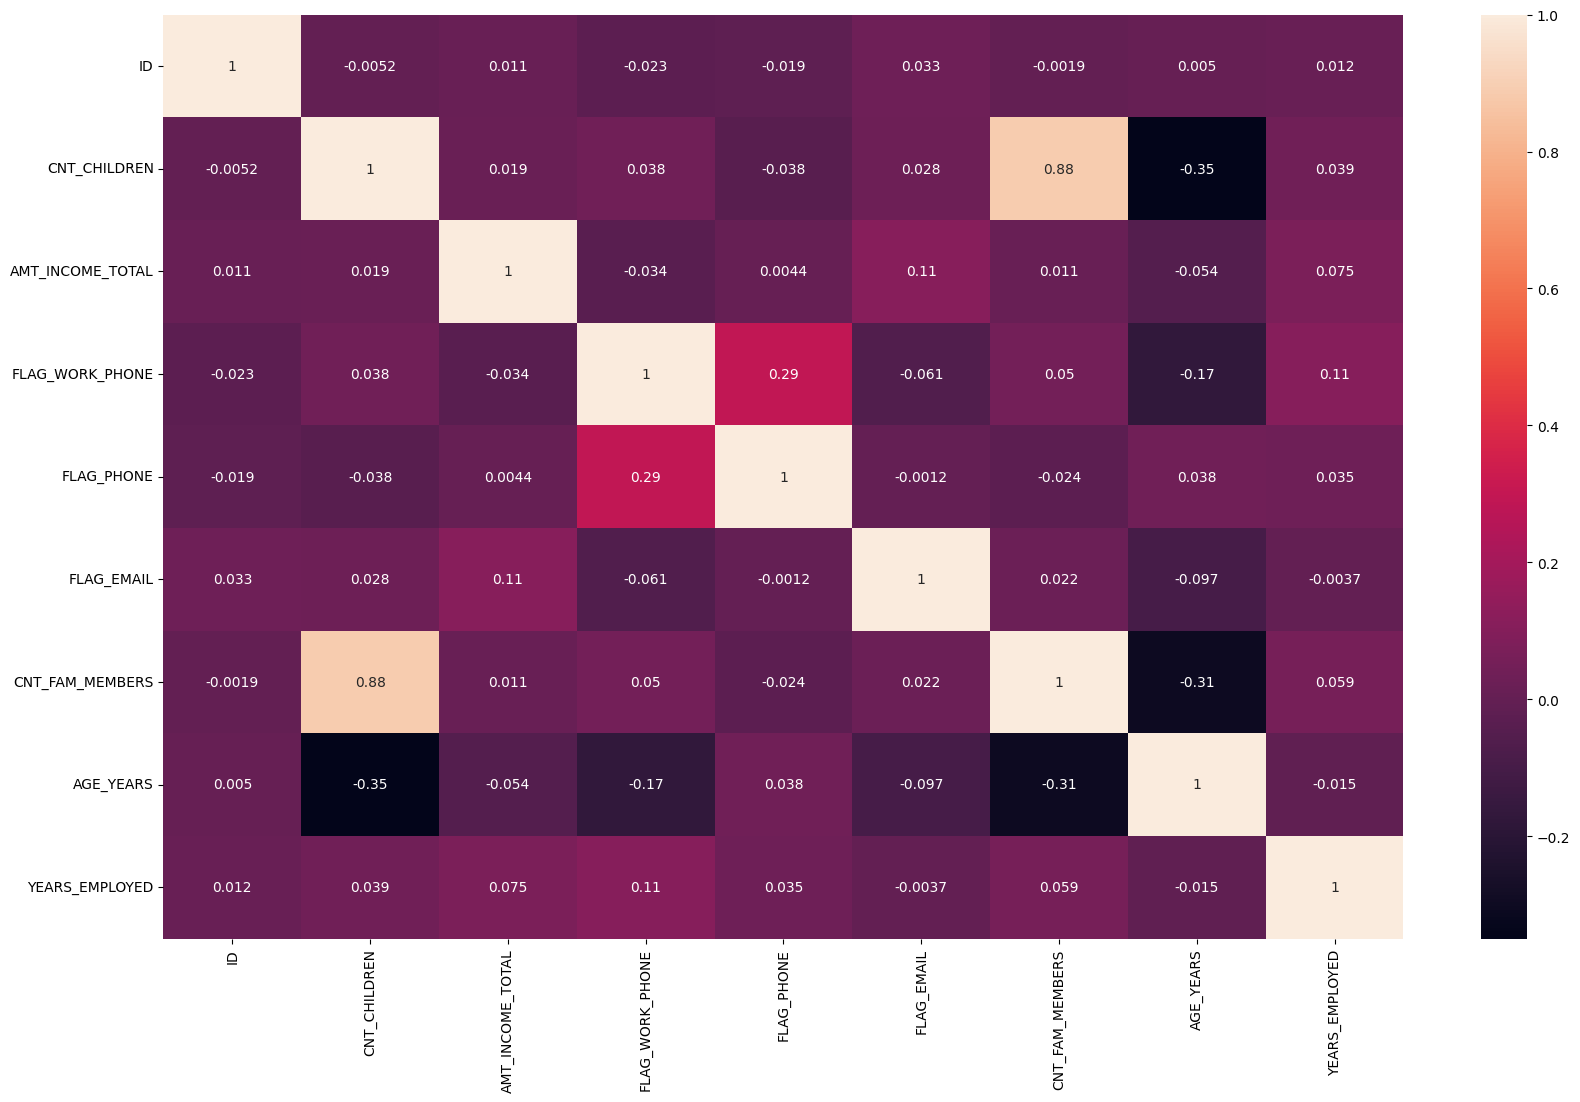

In [ ]:
df1.drop(columns=["FLAG_MOBIL"],inplace=True)
corr = df1.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr, annot=True)
plt.show()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df2 = pd.read_csv('https://raw.githubusercontent.com/bhagyatrivedi/DSEM_dataset/main/credit_record.csv')

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df2.head()

ID  MONTHS_BALANCE STATUS
0  5001711               0      X
1  5001711              -1      0
2  5001711              -2      0
3  5001711              -3      0
4  5001712               0      C

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df2.shape

(1048575, 3)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df2.duplicated().sum()

0

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df2['MONTHS_BALANCE'].unique()

array([  0,  -1,  -2,  -3,  -4,  -5,  -6,  -7,  -8,  -9, -10, -11, -12,
       -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25,
       -26, -27, -28, -29, -30, -31, -32, -33, -34, -35, -36, -37, -38,
       -39, -40, -41, -42, -43, -44, -45, -46, -47, -48, -49, -50, -51,
       -52, -53, -54, -55, -56, -57, -58, -59, -60])

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df2['STATUS'].unique()

array(['X', '0', 'C', '1', '2', '3', '4', '5'], dtype=object)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df2[df2['STATUS'].isin(['X', 'C'])]

ID  MONTHS_BALANCE STATUS
0        5001711               0      X
4        5001712               0      C
5        5001712              -1      C
6        5001712              -2      C
7        5001712              -3      C
...          ...             ...    ...
1048570  5150487             -25      C
1048571  5150487             -26      C
1048572  5150487             -27      C
1048573  5150487             -28      C
1048574  5150487             -29      C

[651261 rows x 3 columns]

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df2['ID'].nunique()

45985

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df2['target']=df2['STATUS']
df2['target'].replace('X', 0, inplace=True)
df2['target'].replace('C', 0, inplace=True)
df2['target']=df2['target'].astype(int)
df2.loc[df2['target']>=1,'target']=1

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df3=pd.DataFrame(df2.groupby(['ID'])['target'].agg("max")).reset_index()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df3["target"].value_counts()

0    40635
1     5350
Name: target, dtype: int64

We merge the two tables using inner join.

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df = pd.merge(df1, df3, how='inner', on=['ID'])

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0      5008804           M            Y               Y             0   
1      5008805           M            Y               Y             0   
2      5008806           M            Y               Y             0   
3      5008808           F            N               Y             0   
4      5008809           F            N               Y             0   
...        ...         ...          ...             ...           ...   
36452  5149828           M            Y               Y             0   
36453  5149834           F            N               Y             0   
36454  5149838           F            N               Y             0   
36455  5150049           F            N               Y             0   
36456  5150337           M            N               Y             0   

       AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0              427500.0               Working               Higher education   
1              427500.0               Working               Higher education   
2              112500.0               Working  Secondary / secondary special   
3              270000.0  Commercial associate  Secondary / secondary special   
4              270000.0  Commercial associate  Secondary / secondary special   
...                 ...                   ...                            ...   
36452          315000.0               Working  Secondary / secondary special   
36453          157500.0  Commercial associate               Higher education   
36454          157500.0             Pensioner               Higher education   
36455          283500.0               Working  Secondary / secondary special   
36456          112500.0               Working  Secondary / secondary special   

         NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  FLAG_WORK_PHONE  FLAG_PHONE  \
0            Civil marriage   Rented apartment                1           0   
1            Civil marriage   Rented apartment                1           0   
2                   Married  House / apartment                0           0   
3      Single / not married  House / apartment                0           1   
4      Single / not married  House / apartment                0           1   
...                     ...                ...              ...         ...   
36452               Married  House / apartment                0           0   
36453               Married  House / apartment                0           1   
36454               Married  House / apartment                0           1   
36455               Married  House / apartment                0           0   
36456  Single / not married   Rented apartment                0           0   

       FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  AGE_YEARS  YEARS_EMPLOYED  \
0               0   not_specified              2.0       33.0            12.0   
1               0   not_specified              2.0       33.0            12.0   
2               0  Security staff              2.0       59.0             3.0   
3               1     Sales staff              1.0       52.0             8.0   
4               1     Sales staff              1.0       52.0             8.0   
...           ...             ...              ...        ...             ...   
36452           0        Managers              2.0       47.0             7.0   
36453           1  Medicine staff              2.0       34.0             4.0   
36454           1  Medicine staff              2.0       34.0             4.0   
36455           0     Sales staff              2.0       49.0             2.0   
36456           0        Laborers              1.0       25.0             3.0   

       target  
0           1  
1           1  
2           0  
3           0  
4           0  
...       ...  
36452       1  
36453       1  
36454       1  
36455       1  
36456       1  

[36457 rows x 18 columns]

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
start_df = pd.DataFrame(df2.groupby(['ID'])['MONTHS_BALANCE'].agg(min)).reset_index()

start_df.rename(columns={'MONTHS_BALANCE': 'ACCOUNT_LENGTH'}, inplace=True)

start_df['ACCOUNT_LENGTH'] = -start_df['ACCOUNT_LENGTH']

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
start_df

ID  ACCOUNT_LENGTH
0      5001711               3
1      5001712              18
2      5001713              21
3      5001714              14
4      5001715              59
...        ...             ...
45980  5150482              28
45981  5150483              17
45982  5150484              12
45983  5150485               1
45984  5150487              29

[45985 rows x 2 columns]

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df = pd.merge(df, start_df, how='inner', on=['ID'])

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
AGE_YEARS              float64
YEARS_EMPLOYED         float64
target                   int64
ACCOUNT_LENGTH           int64
dtype: object

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df.describe()

ID  CNT_CHILDREN  AMT_INCOME_TOTAL  FLAG_WORK_PHONE  \
count  3.645700e+04  36457.000000      3.645700e+04     36457.000000   
mean   5.078227e+06      0.430315      1.866857e+05         0.225526   
std    4.187524e+04      0.742367      1.017892e+05         0.417934   
min    5.008804e+06      0.000000      2.700000e+04         0.000000   
25%    5.042028e+06      0.000000      1.215000e+05         0.000000   
50%    5.074614e+06      0.000000      1.575000e+05         0.000000   
75%    5.115396e+06      1.000000      2.250000e+05         0.000000   
max    5.150487e+06     19.000000      1.575000e+06         1.000000   

         FLAG_PHONE    FLAG_EMAIL  CNT_FAM_MEMBERS     AGE_YEARS  \
count  36457.000000  36457.000000     36457.000000  36457.000000   
mean       0.294813      0.089722         2.198453     43.747017   
std        0.455965      0.285787         0.911686     11.514045   
min        0.000000      0.000000         1.000000     21.000000   
25%        0.000000      0.000000         2.000000     34.000000   
50%        0.000000      0.000000         2.000000     43.000000   
75%        1.000000      0.000000         3.000000     53.000000   
max        1.000000      1.000000        20.000000     69.000000   

       YEARS_EMPLOYED        target  ACCOUNT_LENGTH  
count    36457.000000  36457.000000    36457.000000  
mean         6.036783      0.117700       26.164193  
std          6.488058      0.322257       16.501854  
min          0.000000      0.000000        0.000000  
25%          1.000000      0.000000       12.000000  
50%          4.000000      0.000000       24.000000  
75%          9.000000      0.000000       39.000000  
max         43.000000      1.000000       60.000000

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'AGE_YEARS', 'YEARS_EMPLOYED', 'target', 'ACCOUNT_LENGTH'],
      dtype='object')

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
AGE_YEARS              float64
YEARS_EMPLOYED         float64
target                   int64
ACCOUNT_LENGTH           int64
dtype: object

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
import pandas as pd


# Get numerical column names
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:")
print(num_cols)

# Get categorical column names
cat_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical Columns:")
print(cat_cols)


Numerical Columns:
Index(['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'AGE_YEARS',
       'YEARS_EMPLOYED', 'target', 'ACCOUNT_LENGTH'],
      dtype='object')

Categorical Columns:
Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE'],
      dtype='object')


This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df.target.value_counts()

0    32166
1     4291
Name: target, dtype: int64

# Analysis of numerical and categorical variables


This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
# creating a list of columns which are numerical
num_col = df.select_dtypes(include=['int64','float64']).columns.tolist()

#printing num_col
print(num_col)

['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'AGE_YEARS', 'YEARS_EMPLOYED', 'target', 'ACCOUNT_LENGTH']


This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

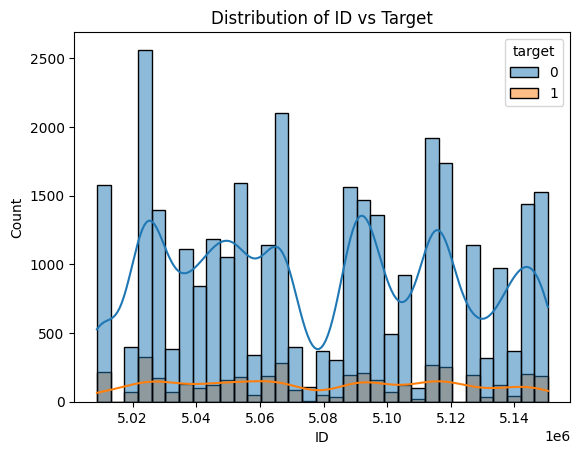

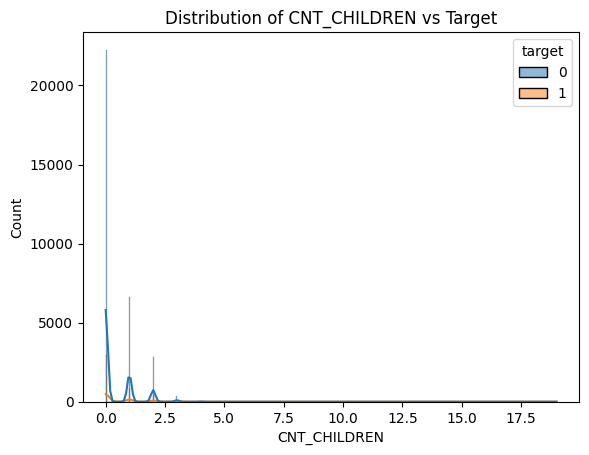

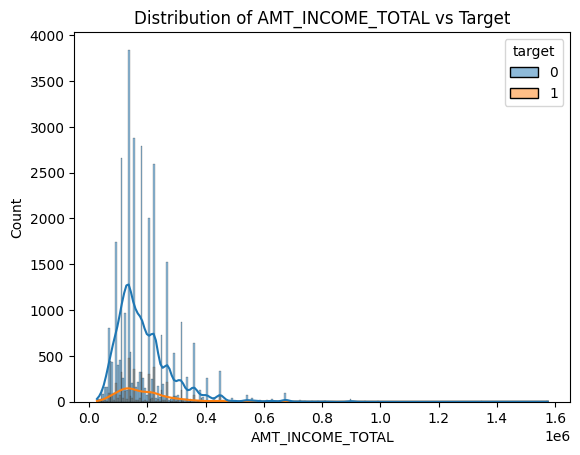

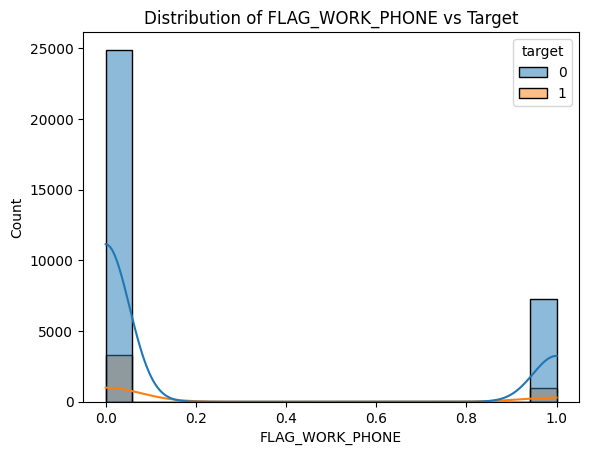

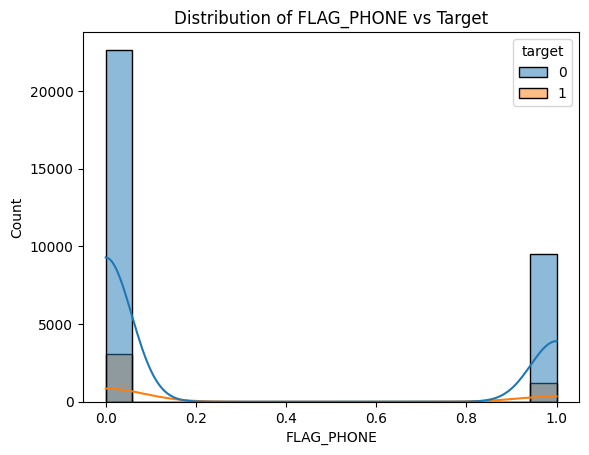

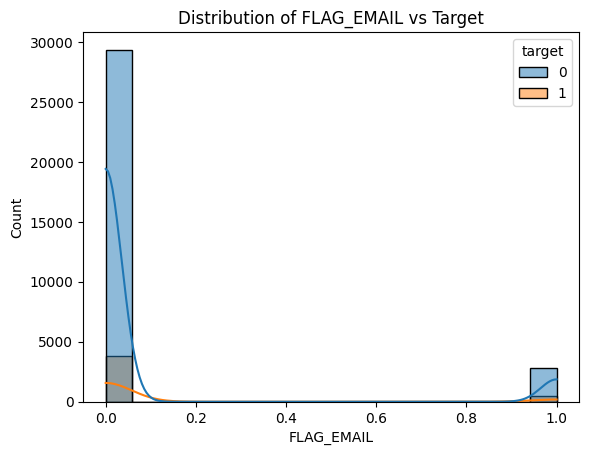

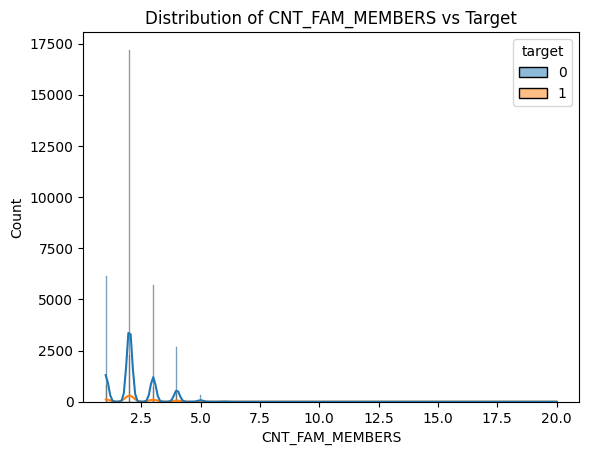

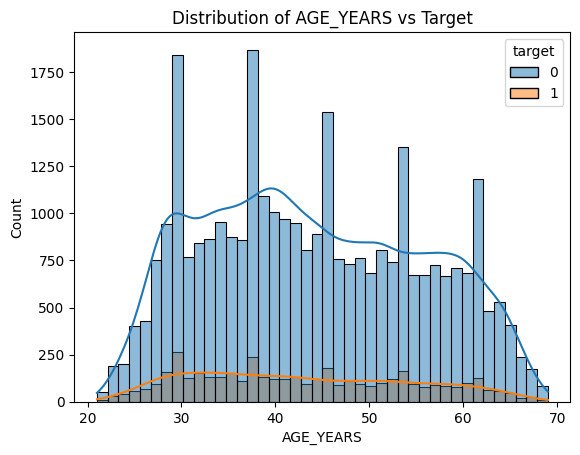

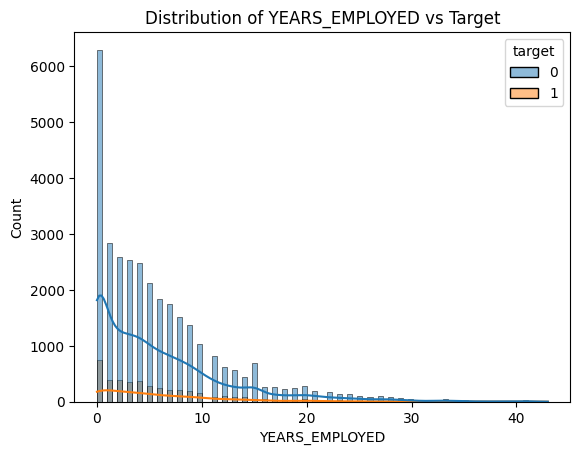

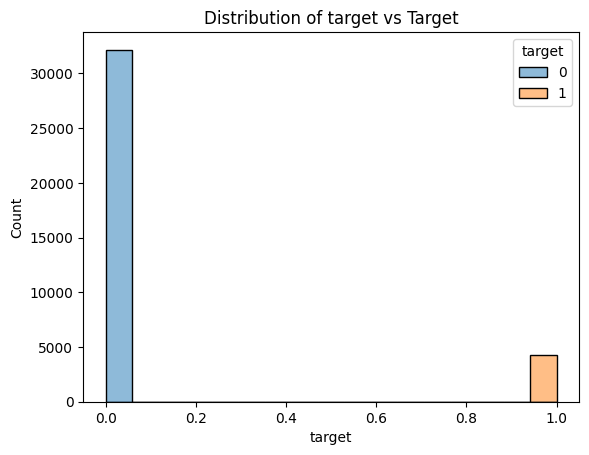

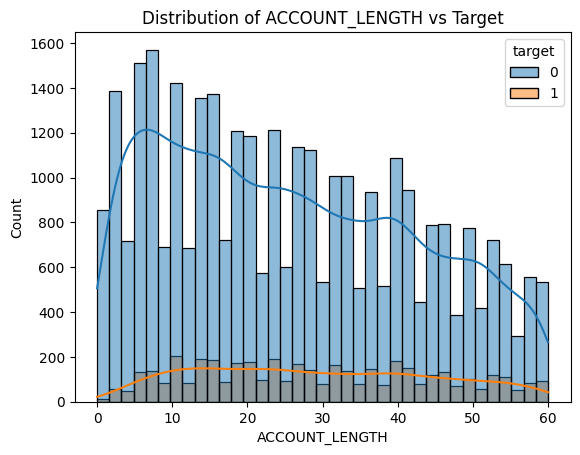

In [ ]:
# plotting histograms for seeing the distributions of numerical variables
for col in num_col:
  sns.histplot(data=df, x = col, hue = 'target',kde=True)
  plt.title(f'Distribution of {col} vs Target')
  plt.show()
  print("\n")


This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

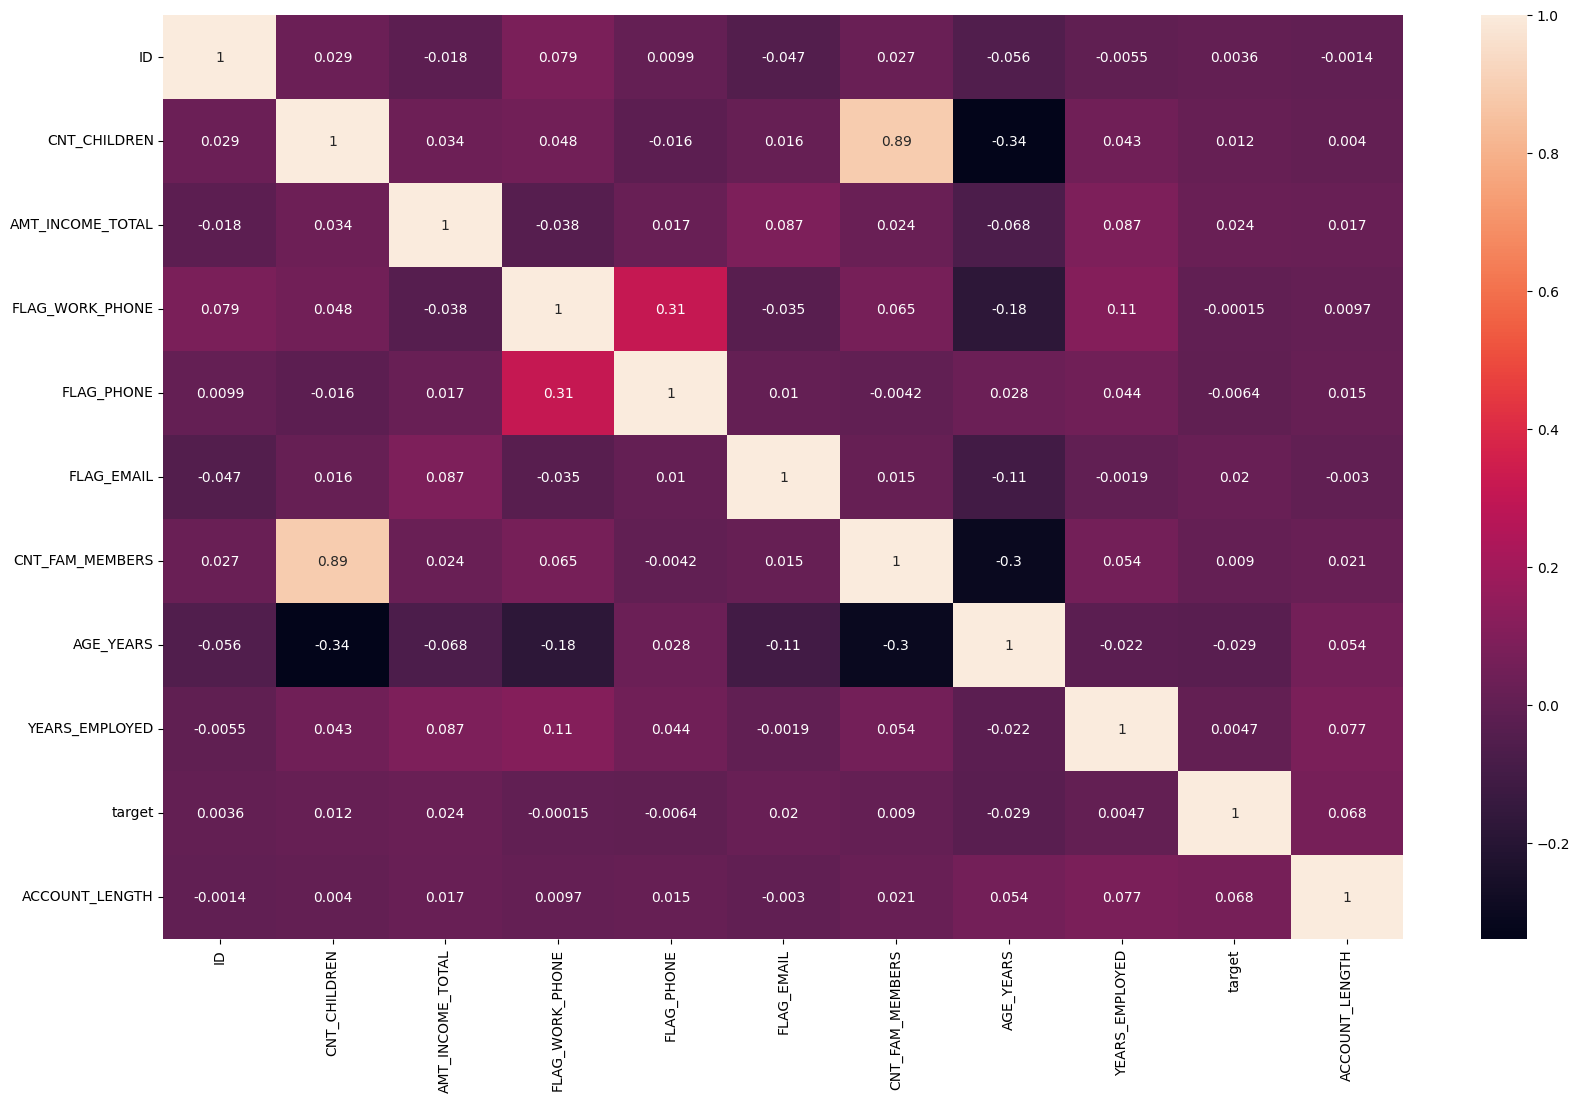

In [ ]:
corr = df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr, annot=True)
plt.show()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

0    32166
1     4291
Name: target, dtype: int64

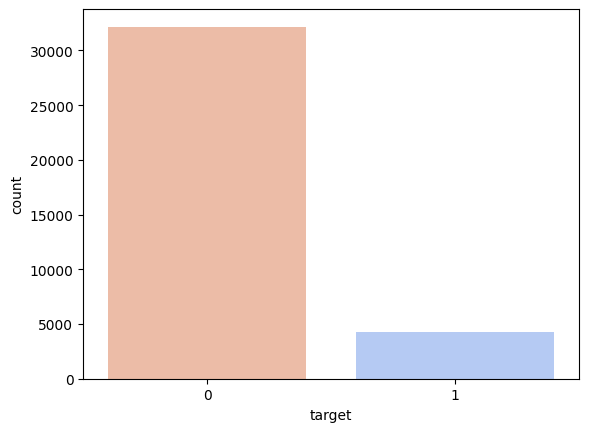

In [ ]:
sns.countplot(x='target', data=df, palette='coolwarm_r')
df['target'].value_counts()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df.corr()['target'].sort_values(ascending=False)

target              1.000000
ACCOUNT_LENGTH      0.067564
AMT_INCOME_TOTAL    0.024202
FLAG_EMAIL          0.019658
CNT_CHILDREN        0.011525
CNT_FAM_MEMBERS     0.009004
YEARS_EMPLOYED      0.004712
ID                  0.003565
FLAG_WORK_PHONE    -0.000149
FLAG_PHONE         -0.006355
AGE_YEARS          -0.028849
Name: target, dtype: float64

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df.corr().info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, ID to ACCOUNT_LENGTH
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                11 non-null     float64
 1   CNT_CHILDREN      11 non-null     float64
 2   AMT_INCOME_TOTAL  11 non-null     float64
 3   FLAG_WORK_PHONE   11 non-null     float64
 4   FLAG_PHONE        11 non-null     float64
 5   FLAG_EMAIL        11 non-null     float64
 6   CNT_FAM_MEMBERS   11 non-null     float64
 7   AGE_YEARS         11 non-null     float64
 8   YEARS_EMPLOYED    11 non-null     float64
 9   target            11 non-null     float64
 10  ACCOUNT_LENGTH    11 non-null     float64
dtypes: float64(11)
memory usage: 1.3+ KB


This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df.drop(columns=['ID', 'CNT_CHILDREN'], inplace=True)

Data Loading and Preprocessing
The dataset was imported from a CSV file, containing records of customers with attributes such as age, income, employment details, and credit information. Initial preprocessing involved cleaning missing values, particularly in the 'Occupation Type' field, which had a significant number of missing entries. Duplicates were checked and found to be non-existent, ensuring data integrity. Categorical variables were encoded to facilitate analysis, and data types were adjusted for computational efficiency.

We dropped ID and CNT_CHILDREN columns as they seem redundant for our model having a biased distribution.

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

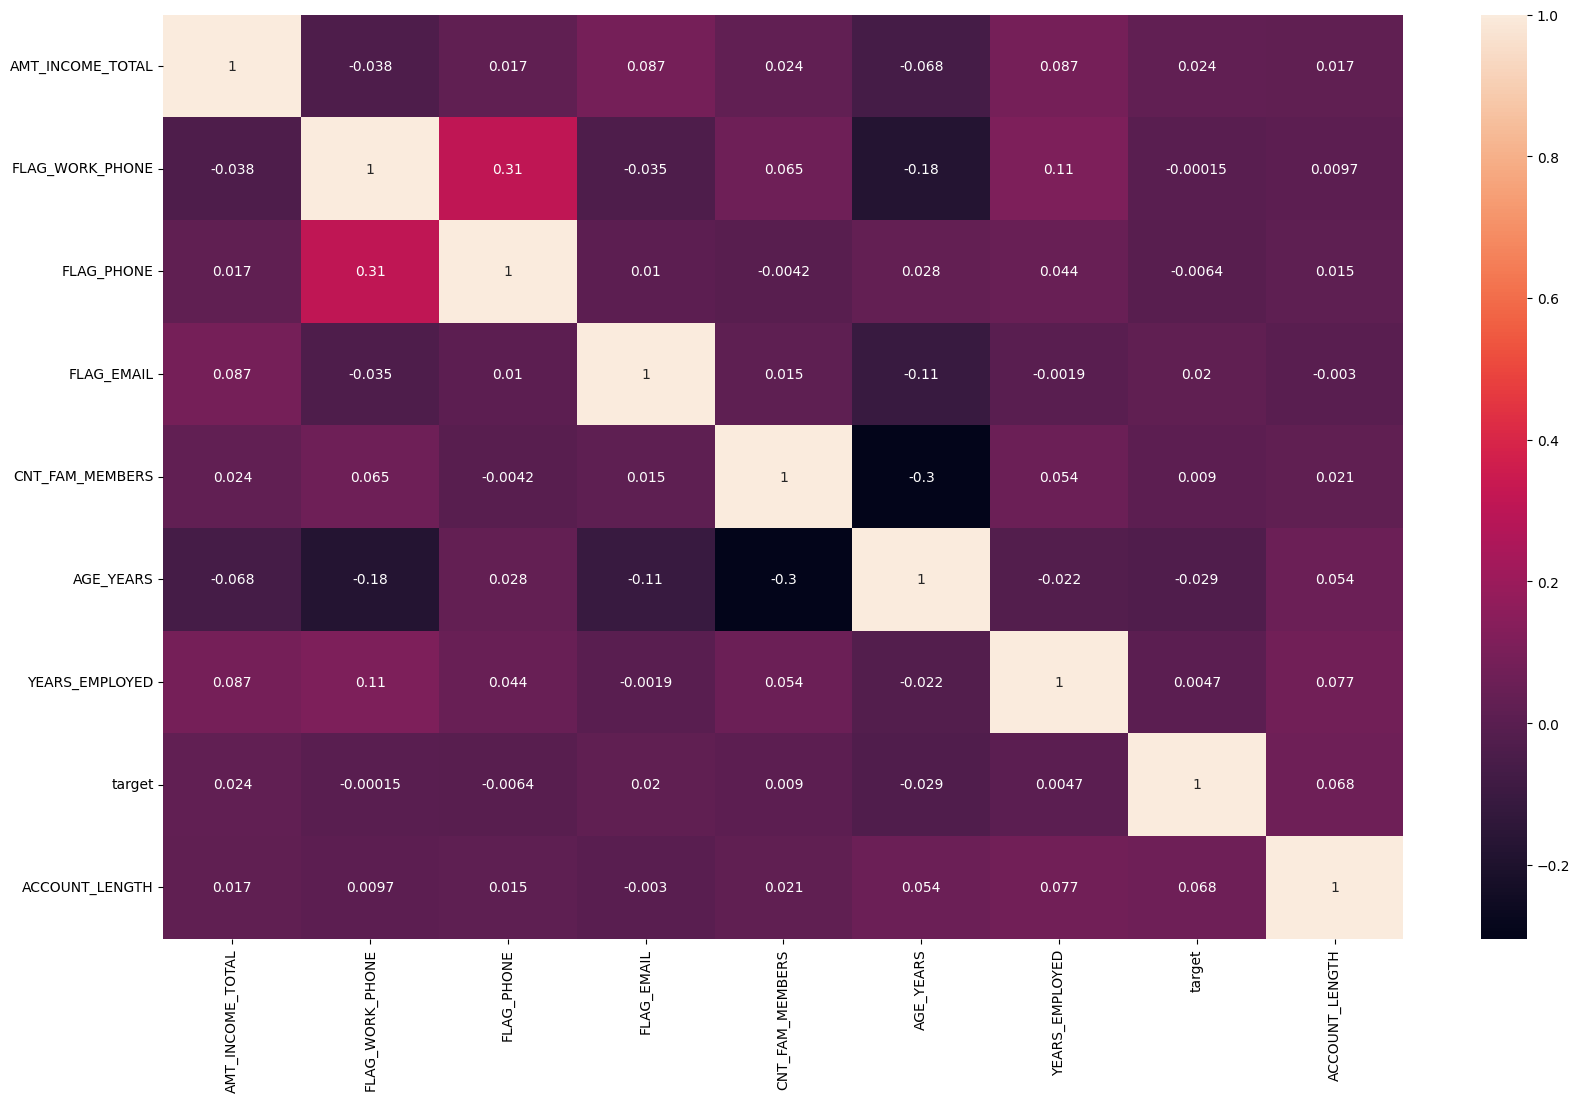

In [ ]:
corr = df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr, annot=True)
plt.show()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

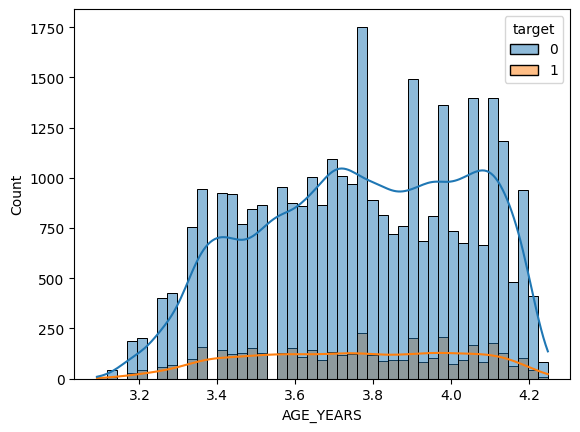

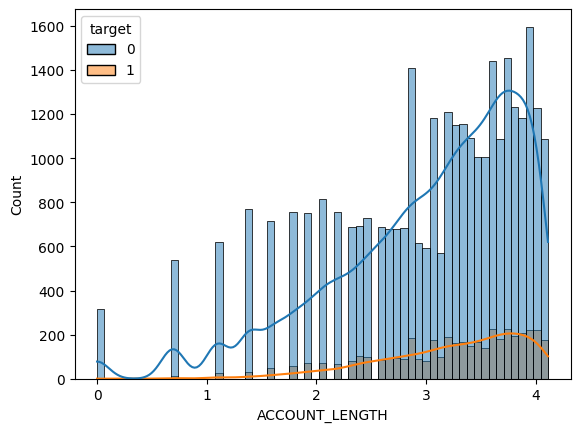

In [ ]:
# create a list of columns for applying log transformations
log_list = ['AGE_YEARS','ACCOUNT_LENGTH']

# applying log transformation to the desired columns
for col in log_list:
  df[col] = np.log1p(df[col])

# plotting a histogram to verify the distribution
for col in log_list:
  sns.histplot(data=df,x=col,hue='target',kde=True)
  plt.show()

After applying the log transformation we can see that the distributions of age and final-weight are much more even and closer to normal than before.

**Analyzing categorical features**

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

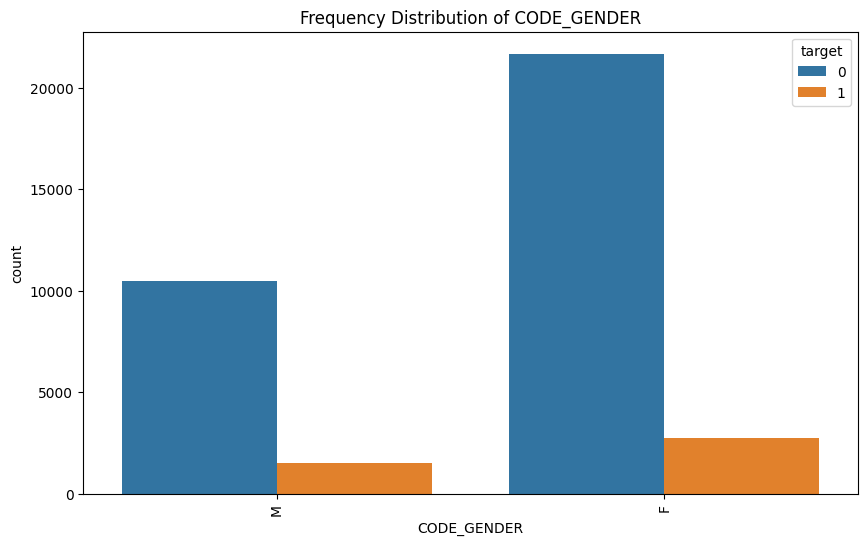

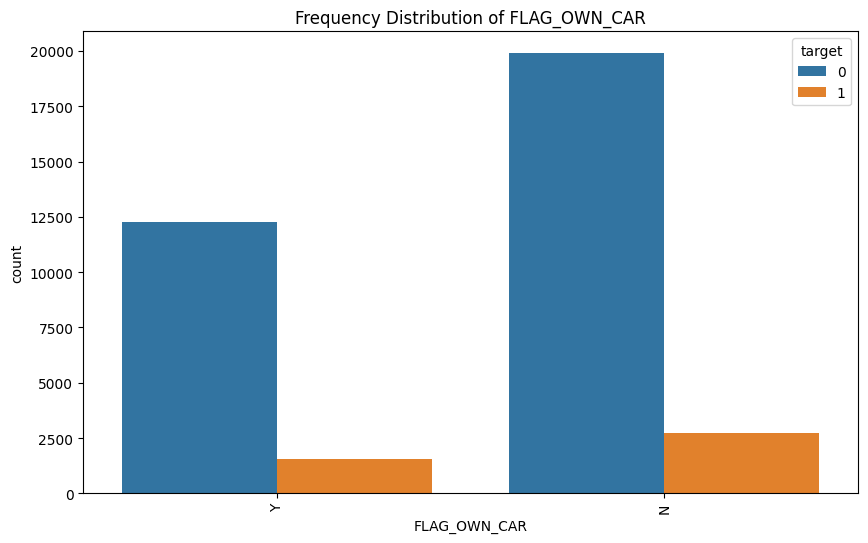

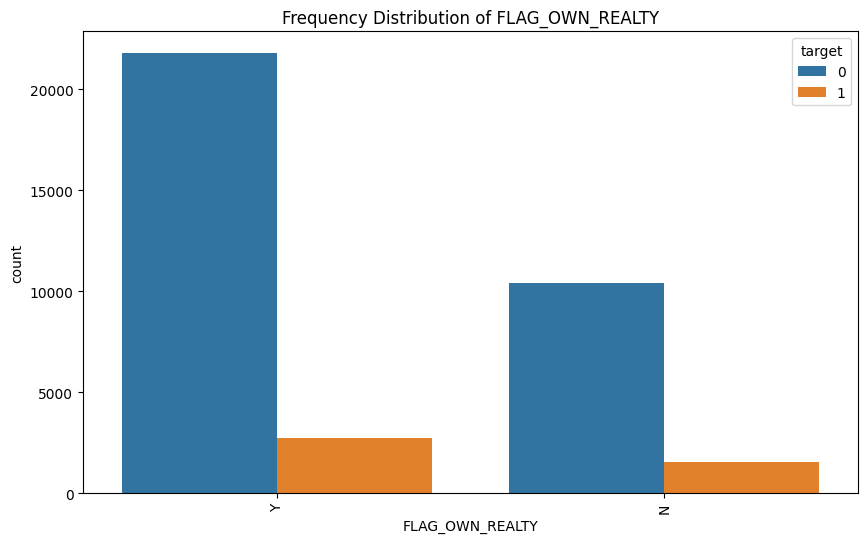

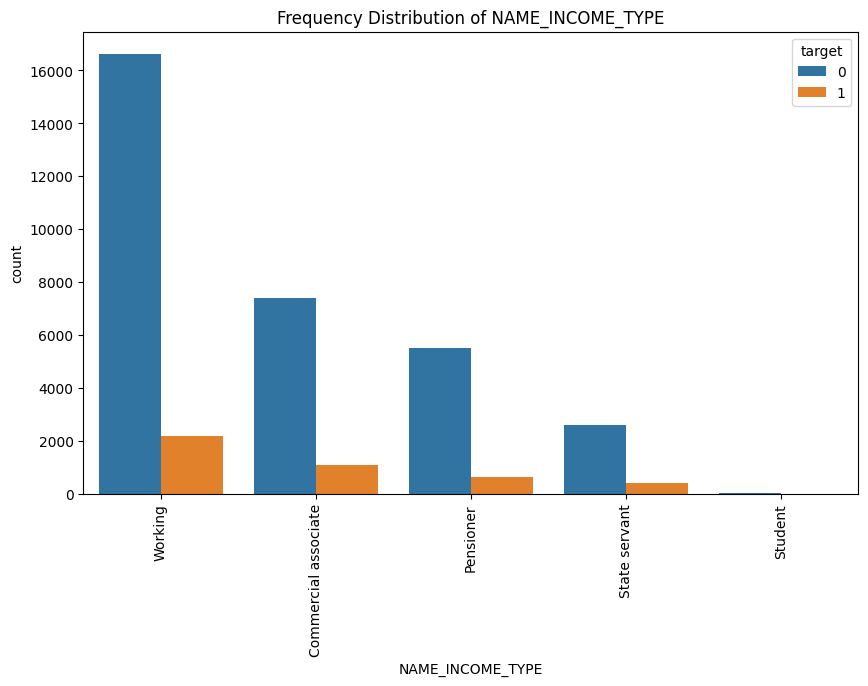

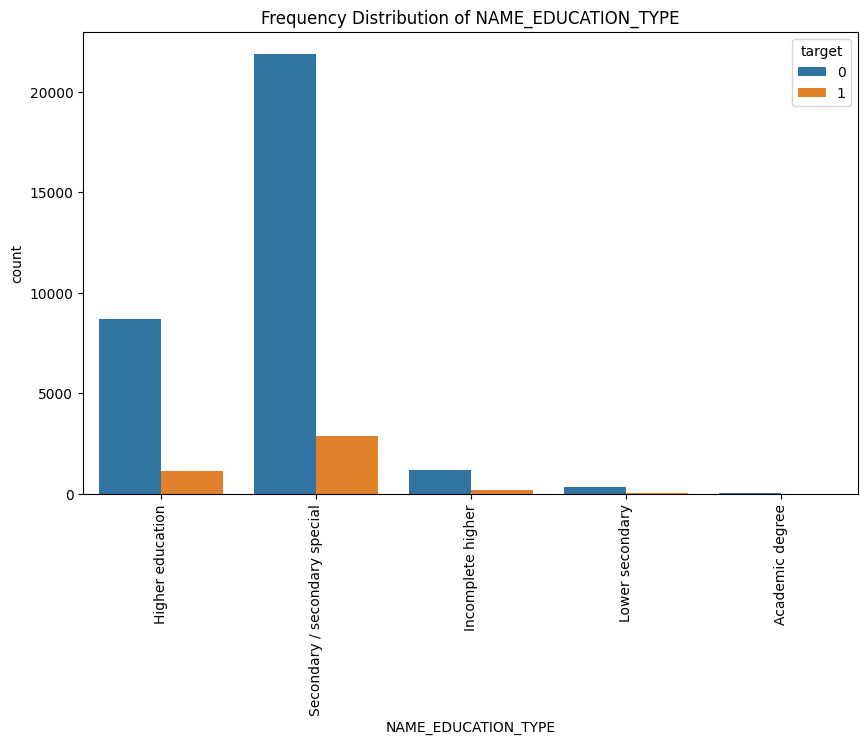

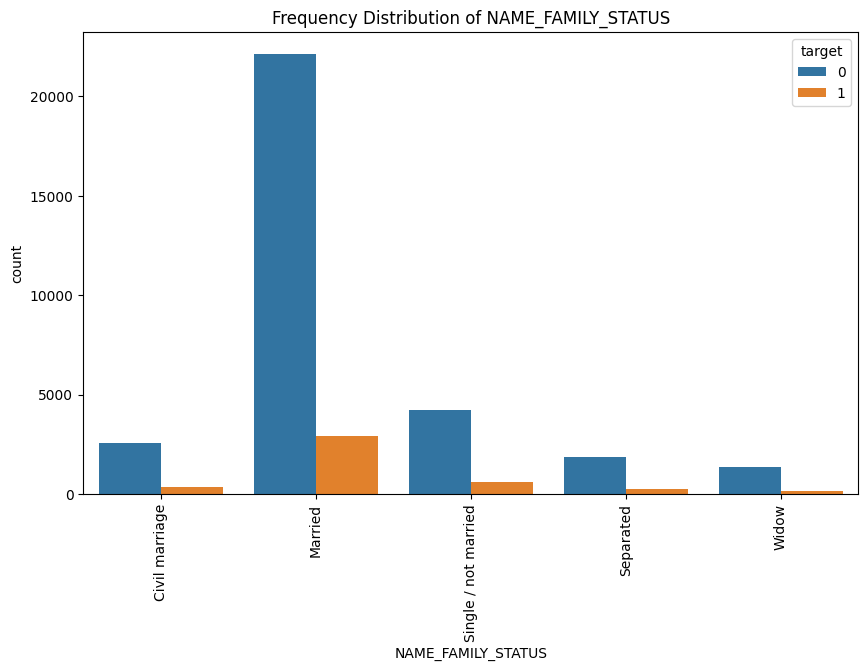

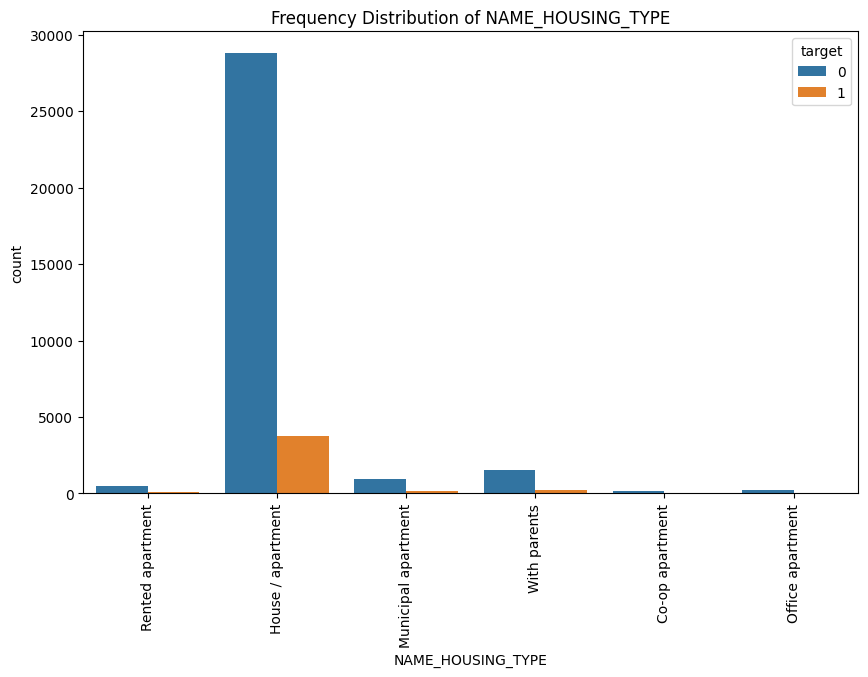

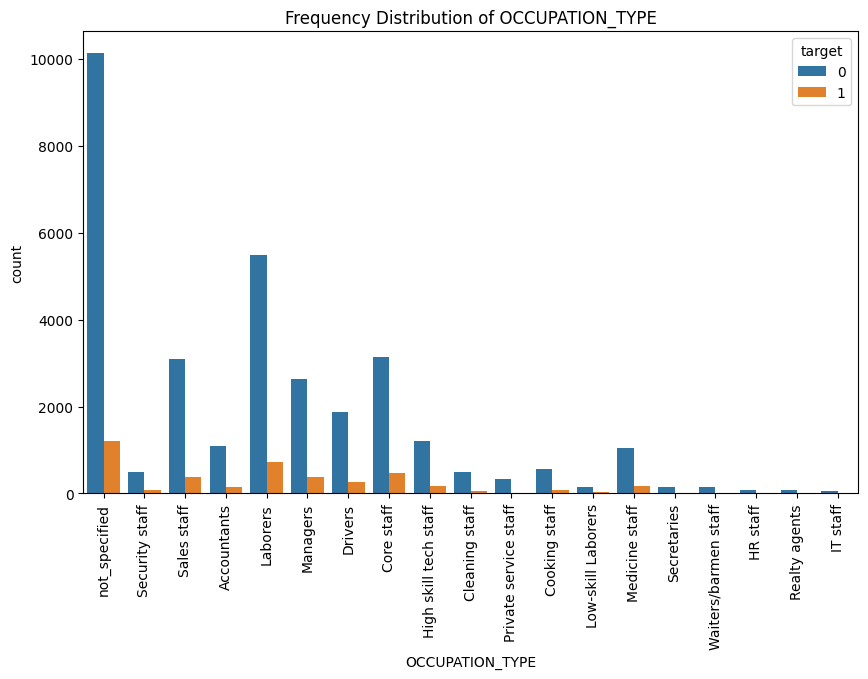

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()


# plotting frequency distribution for categorical variables

for col in categorical_cols:
  plt.figure(figsize=(10,6))
  sns.countplot(data=df,x=col,hue='target')
  plt.title(f'Frequency Distribution of {col}')
  plt.xticks(rotation=90)
  plt.show()
  print("\n")

# Feature Engineering

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Separate numerical and categorical variables
numerical_cols = ['AMT_INCOME_TOTAL', 'AGE_YEARS','YEARS_EMPLOYED', 'CNT_FAM_MEMBERS']
categorical_cols = ['CODE_GENDER','FLAG_OWN_CAR','NAME_EDUCATION_TYPE', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE']

# Compute VIF for numerical variables
numerical_multic = encdata[numerical_cols]

numerical_vif = pd.DataFrame()
numerical_vif["variables"] = numerical_multic.columns
numerical_vif["VIF"] = [variance_inflation_factor(numerical_multic.values, i) for i in range(numerical_multic.shape[1])]

# Compute VIF for categorical variables
# categorical_multic = df[categorical_cols]
categorical_multic = encdata[categorical_cols]

categorical_vif = pd.DataFrame()
categorical_vif["variables"] = categorical_multic.columns
categorical_vif["VIF"] = [variance_inflation_factor(pd.get_dummies(categorical_multic, drop_first=True).values, i) for i in range(categorical_multic.shape[1])]

# Combine the results
combined_vif = pd.concat([numerical_vif, categorical_vif], ignore_index=True)

# Print the results
print(combined_vif)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

Text(0.5, 1.0, ' Correlation heatmap')

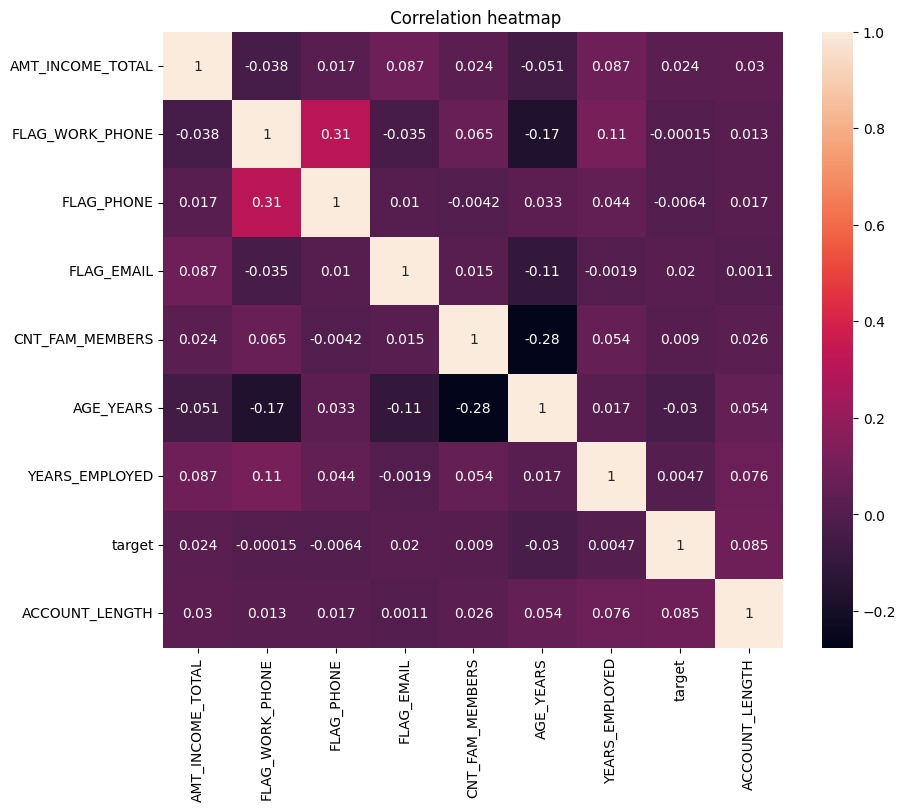

In [ ]:
cm = df.corr()

# generating the heatmap from correlation matrix
plt.figure(figsize=(10,8))
heatmap = sns.heatmap(cm, annot=True)
plt.title(" Correlation heatmap")


This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

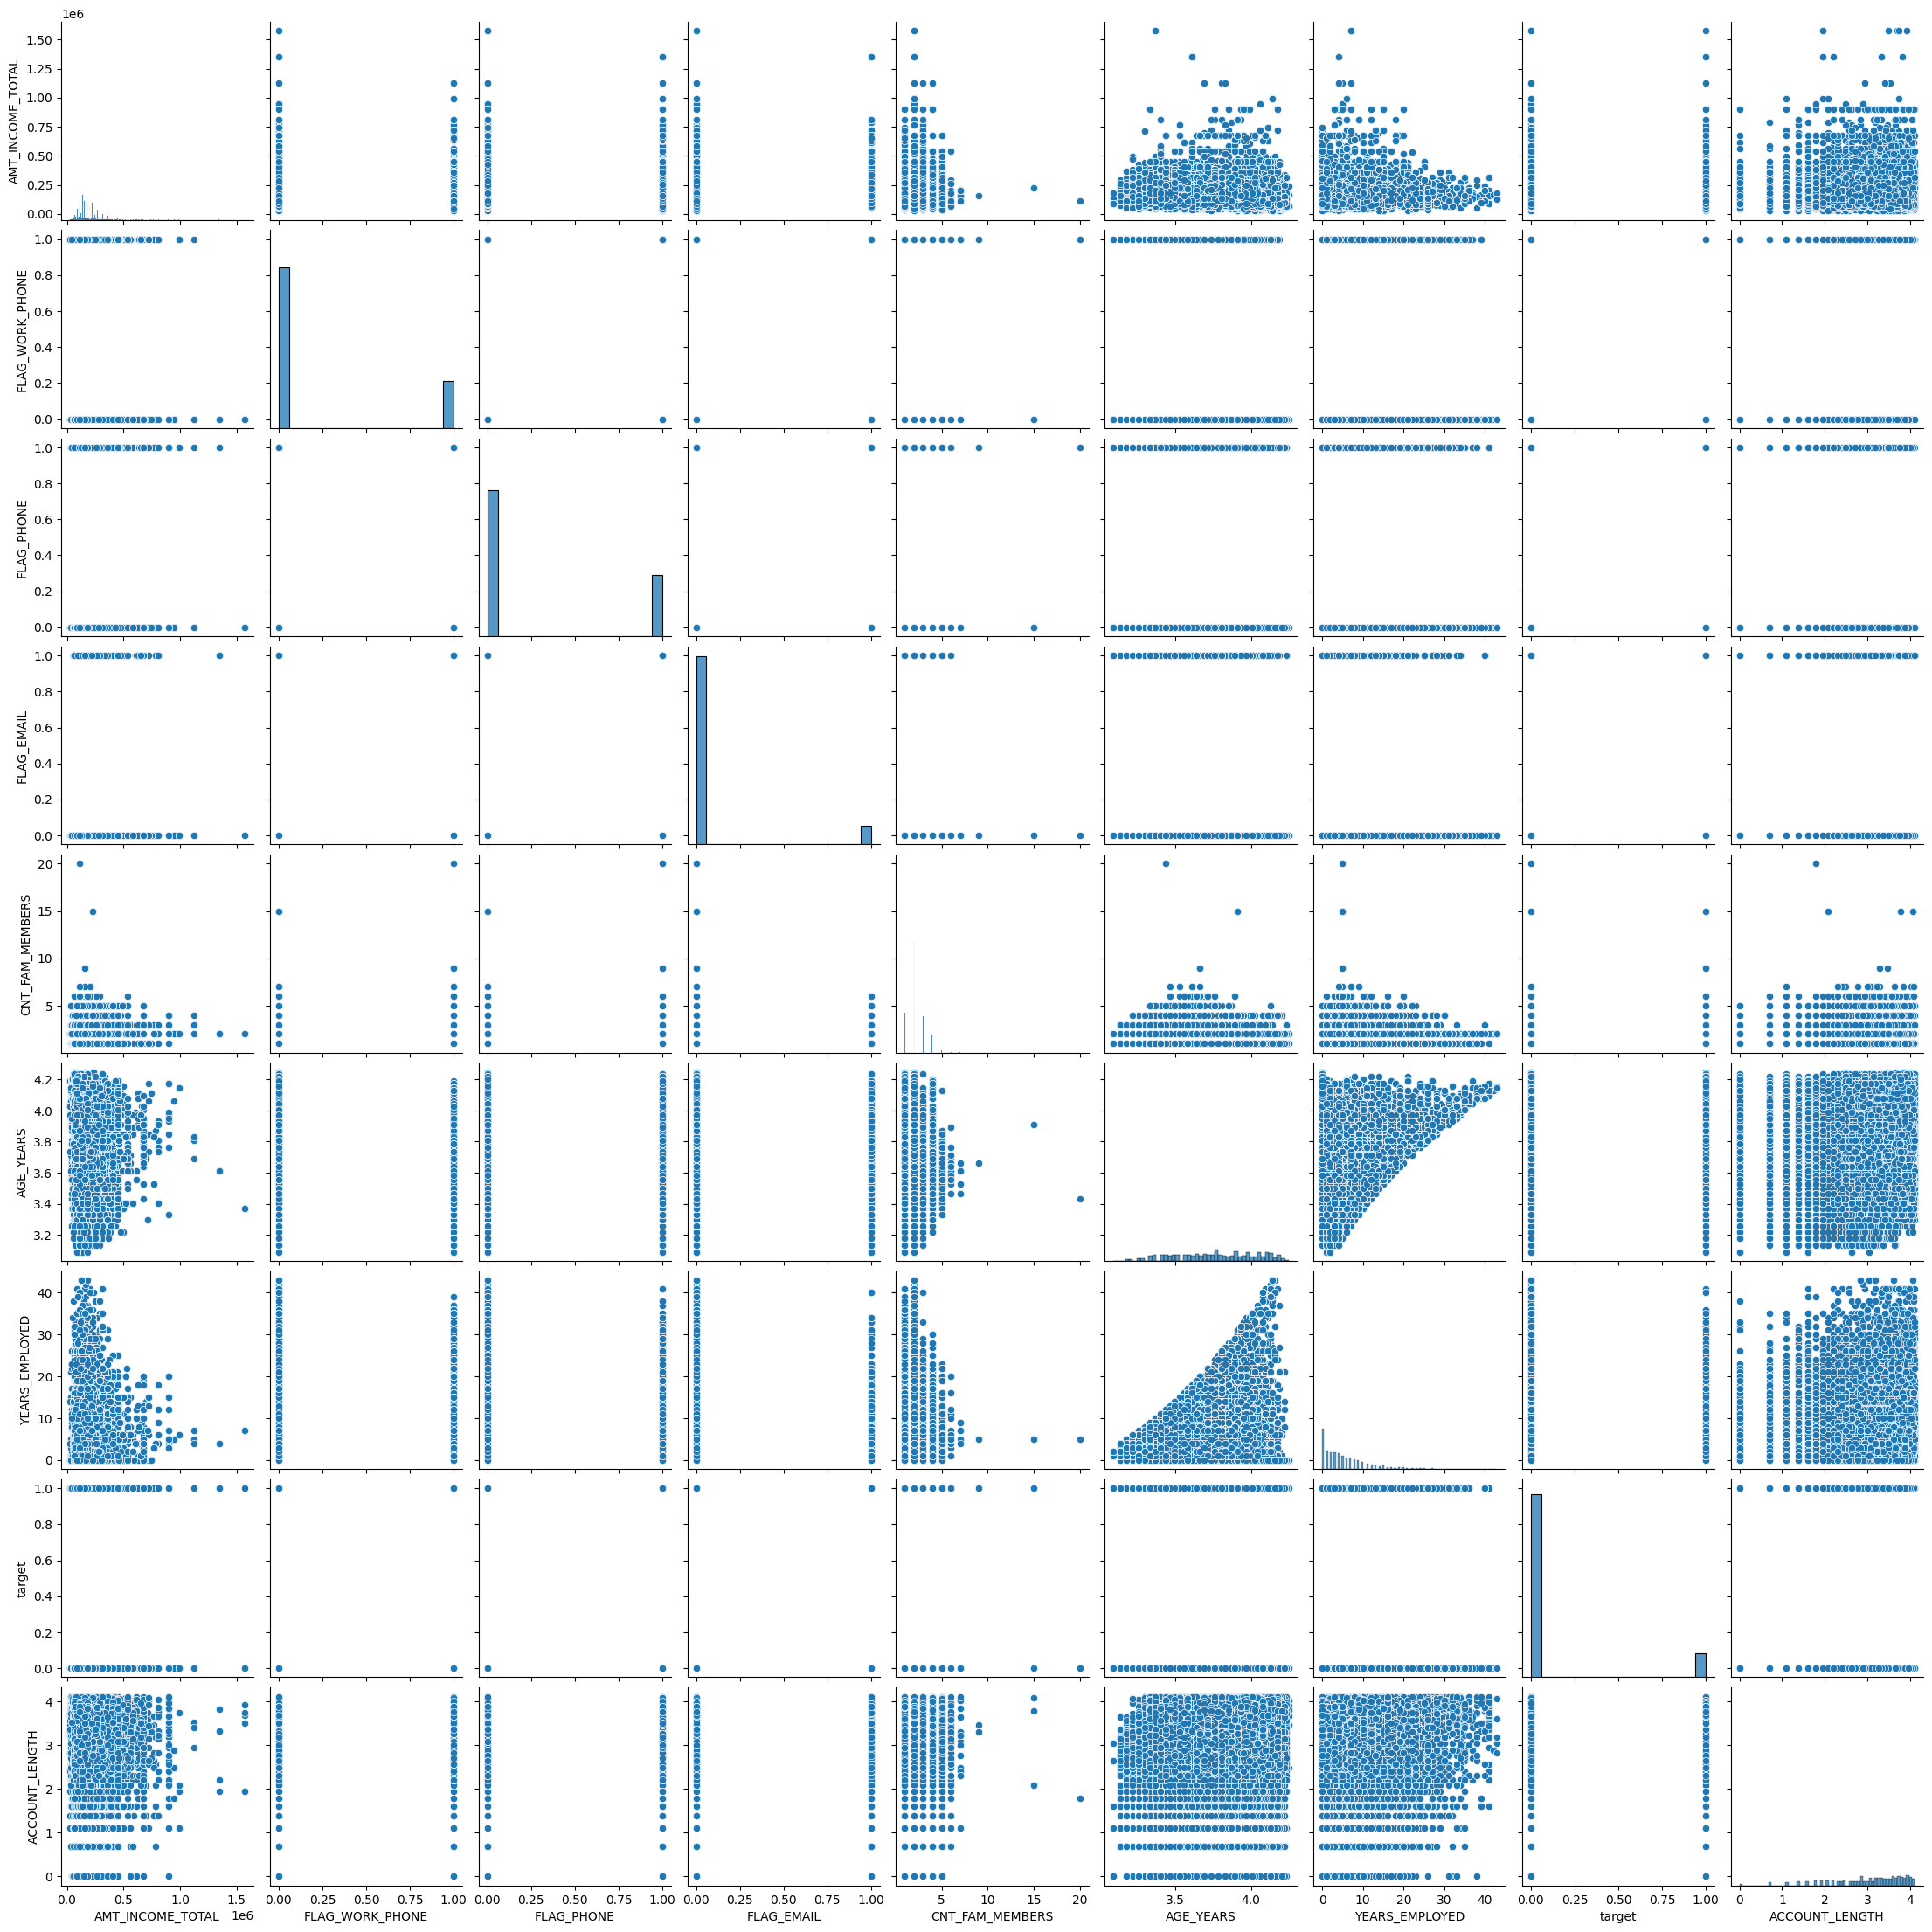

In [ ]:
plt = sns.pairplot(data=df)

**One Hot Encoding**

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
columns_to_scale = ['AMT_INCOME_TOTAL', 'AGE_YEARS','YEARS_EMPLOYED', 'CNT_FAM_MEMBERS']

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
dummy = df.copy()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
st=StandardScaler()
df[columns_to_scale] = st.fit_transform(df[columns_to_scale])

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
columns_to_encode = ['CODE_GENDER','FLAG_OWN_CAR','NAME_EDUCATION_TYPE', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE']
df=pd.get_dummies(df,columns=columns_to_encode,dtype='int')

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df

AMT_INCOME_TOTAL  CNT_FAM_MEMBERS  AGE_YEARS  YEARS_EMPLOYED  target  \
0              2.365845        -0.217680  -0.908134        0.919119       1   
1              2.365845        -0.217680  -0.908134        0.919119       1   
2             -0.728827        -0.217680   1.237411       -0.468064       0   
3              0.818509        -1.314564   0.768805        0.302593       0   
4              0.818509        -1.314564   0.768805        0.302593       0   
...                 ...              ...        ...             ...     ...   
36452          1.260605        -0.217680   0.394492        0.148462       1   
36453         -0.286731        -0.217680  -0.798634       -0.313932       1   
36454         -0.286731        -0.217680  -0.798634       -0.313932       1   
36455          0.951138        -0.217680   0.548696       -0.622195       1   
36456         -0.728827        -1.314564  -1.921494       -0.468064       1   

       ACCOUNT_LENGTH  CODE_GENDER_F  CODE_GENDER_M  FLAG_OWN_CAR_N  \
0            2.772589              0              1               0   
1            2.708050              0              1               0   
2            3.401197              0              1               0   
3            1.609438              1              0               1   
4            3.295837              1              0               1   
...               ...            ...            ...             ...   
36452        2.484907              0              1               0   
36453        3.178054              1              0               1   
36454        3.496508              1              0               1   
36455        2.302585              1              0               1   
36456        2.639057              0              1               1   

       FLAG_OWN_CAR_Y  ...  OCCUPATION_TYPE_Low-skill Laborers  \
0                   1  ...                                   0   
1                   1  ...                                   0   
2                   1  ...                                   0   
3                   0  ...                                   0   
4                   0  ...                                   0   
...               ...  ...                                 ...   
36452               1  ...                                   0   
36453               0  ...                                   0   
36454               0  ...                                   0   
36455               0  ...                                   0   
36456               0  ...                                   0   

       OCCUPATION_TYPE_Managers  OCCUPATION_TYPE_Medicine staff  \
0                             0                               0   
1                             0                               0   
2                             0                               0   
3                             0                               0   
4                             0                               0   
...                         ...                             ...   
36452                         1                               0   
36453                         0                               1   
36454                         0                               1   
36455                         0                               0   
36456                         0                               0   

       OCCUPATION_TYPE_Private service staff  OCCUPATION_TYPE_Realty agents  \
0                                          0                              0   
1                                          0                              0   
2                                          0                              0   
3                                          0                              0   
4                                          0                              0   
...                                      ...                            ...   
36452                                      0          

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df.describe()

AMT_INCOME_TOTAL  CNT_FAM_MEMBERS     AGE_YEARS  YEARS_EMPLOYED  \
count      3.645700e+04     3.645700e+04  3.645700e+04    3.645700e+04   
mean       1.559191e-18     2.424542e-16  2.712992e-15   -7.717994e-17   
std        1.000014e+00     1.000014e+00  1.000014e+00    1.000014e+00   
min       -1.568810e+00    -1.314564e+00 -2.552536e+00   -9.304580e-01   
25%       -6.404080e-01    -2.176798e-01 -7.986341e-01   -7.763266e-01   
50%       -2.867311e-01    -2.176798e-01  6.580885e-02   -3.139323e-01   
75%        3.764130e-01     8.792039e-01  8.394143e-01    4.567249e-01   
max        1.363930e+01     1.952623e+01  1.819711e+00    5.697194e+00   

             target  ACCOUNT_LENGTH  CODE_GENDER_F  CODE_GENDER_M  \
count  36457.000000    36457.000000   36457.000000   36457.000000   
mean       0.117700        3.031873       0.670105       0.329895   
std        0.322257        0.846592       0.470181       0.470181   
min        0.000000        0.000000       0.000000       0.000000   
25%        0.000000        2.564949       0.000000       0.000000   
50%        0.000000        3.218876       1.000000       0.000000   
75%        0.000000        3.688879       1.000000       1.000000   
max        1.000000        4.110874       1.000000       1.000000   

       FLAG_OWN_CAR_N  FLAG_OWN_CAR_Y  ...  \
count    36457.000000    36457.000000  ...   
mean         0.620292        0.379708  ...   
std          0.485321        0.485321  ...   
min          0.000000        0.000000  ...   
25%          0.000000        0.000000  ...   
50%          1.000000        0.000000  ...   
75%          1.000000        1.000000  ...   
max          1.000000        1.000000  ...   

       OCCUPATION_TYPE_Low-skill Laborers  OCCUPATION_TYPE_Managers  \
count                        36457.000000              36457.000000   
mean                             0.004800                  0.082618   
std                              0.069118                  0.275308   
min                              0.000000                  0.000000   
25%                              0.000000                  0.000000   
50%                              0.000000                  0.000000   
75%                              0.000000                  0.000000   
max                              1.000000                  1.000000   

       OCCUPATION_TYPE_Medicine staff  OCCUPATION_TYPE_Private service staff  \
count                    36457.000000                           36457.000000   
mean                         0.033107                               0.009436   
std                          0.178920                               0.096680   
min                          0.000000                               0.000000   
25%                          0.000000                               0.000000   
50%                          0.000000                               0.000000   
75%                          0.000000                               0.000000   
max                          1.000000                               1.000000   

       OCCUPATION_TYPE_Realty agents  OCCUPATION_TYPE_Sales staff  \
count                   36457.000000                 36457.000000   
mean                        0.002167                     0.095592   
std                         0.046501                     0.294035   
min                         0.000000                     0.000000   
25%                         0.000000                     0.000000   
50%                         0.000000                     0.000000   
75%                         0.000000                     0.000000   
max                         1.000000                     1.000000   

       OCCUPATION_TYPE_Secretaries  OCCUPATION_TYPE_Security staff  \
count                 36457.000000                    36457.000000   
mean                      0.004142                        0.016238   
std                       0.064225                        0.126392   
min                       0.000000      

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df.corr()['target'].sort_values(ascending=False)

target                                               1.000000
ACCOUNT_LENGTH                                       0.085220
FLAG_OWN_REALTY_N                                    0.027990
AMT_INCOME_TOTAL                                     0.024202
CODE_GENDER_M                                        0.021257
FLAG_EMAIL_1                                         0.019658
NAME_EDUCATION_TYPE_Incomplete higher                0.018118
NAME_INCOME_TYPE_Commercial associate                0.016257
OCCUPATION_TYPE_Low-skill Laborers                   0.015274
OCCUPATION_TYPE_Security staff                       0.014359
NAME_FAMILY_STATUS_Single / not married              0.013716
OCCUPATION_TYPE_Core staff                           0.011522
OCCUPATION_TYPE_Managers                             0.010972
FLAG_OWN_CAR_N                                       0.010580
NAME_INCOME_TYPE_State servant                       0.010451
OCCUPATION_TYPE_Medicine staff                       0.009960
NAME_EDU

#Exploratory Data Analysis (EDA)
Summary statistics revealed key insights, such as the average income level, age distribution, and employment tenure among the customers. Visualizations like histograms and scatter plots provided a deeper understanding of the distribution of key variables. For instance, the income distribution was right-skewed, indicating a smaller number of high-income customers. Box plots highlighted outliers in variables like age and employment years, suggesting the presence of exceptionally old or long-tenured individuals.
A correlation analysis was conducted to explore relationships between variables. The findings indicated a weak correlation between age and income levels, suggesting that higher income is not necessarily associated with older age in this dataset. However, a moderate positive correlation was observed between employment tenure and credit amount, implying that longer-employed individuals tend to have higher credit amounts.

# Model Implementation

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
X= df.drop(['target'], axis=1)
y= df['target']


This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: target, dtype: int64

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
# importing model libraries
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

# predicting test cases
y_pred = model.predict(X_test)
print(y_test)

21900    0
24293    0
19633    1
2496     0
25932    0
        ..
12738    0
29745    0
17518    0
34043    0
26570    0
Name: target, Length: 10938, dtype: int64


This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
# printing the classification report to analyze model performance
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93      9601
           1       0.00      0.00      0.00      1337

    accuracy                           0.88     10938
   macro avg       0.44      0.50      0.47     10938
weighted avg       0.77      0.88      0.82     10938



This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
from sklearn.metrics import accuracy_score

test_score = accuracy_score(y_test, model.predict(X_test)) * 100
train_score = accuracy_score(y_train, model.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

Model  Training Accuracy %  Testing Accuracy %
0  Logistic Regression            88.424311           87.776559

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
#importing neccessary libraries
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier()
model.fit(X_train,y_train)

dt=model.predict(X_test)

from sklearn import metrics

print(metrics.classification_report(y_test,dt))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      9601
           1       0.29      0.29      0.29      1337

    accuracy                           0.83     10938
   macro avg       0.60      0.59      0.59     10938
weighted avg       0.83      0.83      0.83     10938



This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
from sklearn.metrics import accuracy_score

test_score = accuracy_score(y_test, model.predict(X_test)) * 100
train_score = accuracy_score(y_train, model.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

Model  Training Accuracy %  Testing Accuracy %
0  Decision Tree Classifier            99.090873           82.711647

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
# from sklearn.svm import SVC
# model=SVC(kernel="rbf")
# model.fit(X_train,y_train)
# sv=model.predict(X_test)
# from sklearn import metrics
# print(metrics.classification_report(y_test,sv))

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:

from sklearn.metrics import accuracy_score

test_score = accuracy_score(y_test, model.predict(X_test)) * 100
train_score = accuracy_score(y_train, model.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Support Vector Classifier", train_score, test_score]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

Model  Training Accuracy %  Testing Accuracy %
0  Support Vector Classifier            99.090873           82.711647

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
# Now we create confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[9601    0]
 [1337    0]]


This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

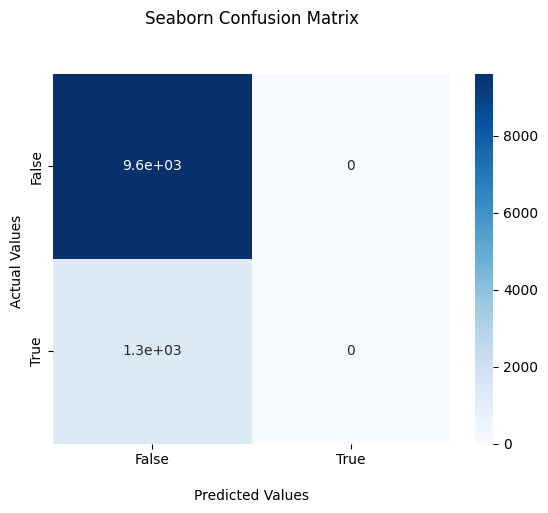

In [ ]:
axes = sns.heatmap(conf_matrix, annot=True, cmap='Blues')

axes.set_title('Seaborn Confusion Matrix\n\n');
axes.set_xlabel('\nPredicted Values')
axes.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
axes.xaxis.set_ticklabels(['False','True'])
axes.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt

#We see that there is a high data imbalance and it needs to be balanced. We will Handle the Imbalancing of data using SMOTE

# Handling data imbalance using SMOTE

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
col = list(df.columns)
type(col)
col.remove('target')

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
from sklearn.model_selection import train_test_split

# splitting the data into train and test in the ratio 70:30
X_trainr, X_testr,y_trainr,y_testr = train_test_split(X,y,test_size=0.3,random_state = 42)


This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42,sampling_strategy='auto')
X_train_resampled, y_train_resampled = smote.fit_resample(X_trainr, y_trainr)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_resampled,y_train_resampled)

# predicting test cases
y_pred = model.predict(X_testr)
print(y_pred)

[0 0 0 ... 0 0 0]


This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
# printing the classification report to analyze model performance
from sklearn import metrics
print(metrics.classification_report(y_testr,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      9601
           1       0.14      0.04      0.06      1337

    accuracy                           0.85     10938
   macro avg       0.51      0.50      0.49     10938
weighted avg       0.79      0.85      0.82     10938



This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_testr, y_pred)
print(conf_matrix)

[[9284  317]
 [1286   51]]


This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

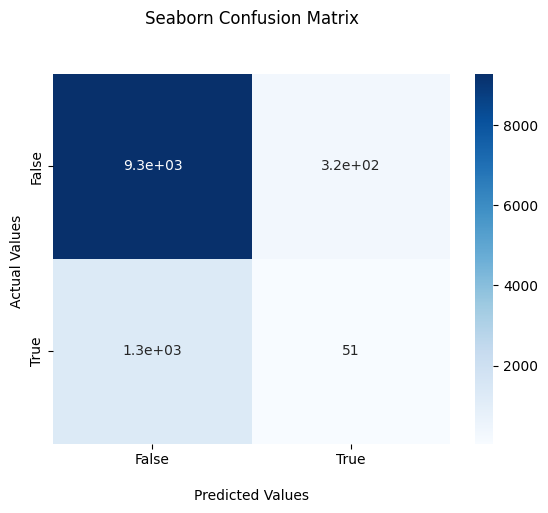

In [ ]:
axes = sns.heatmap(conf_matrix, annot=True, cmap='Blues')

axes.set_title('Seaborn Confusion Matrix\n\n');
axes.set_xlabel('\nPredicted Values')
axes.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
axes.xaxis.set_ticklabels(['False','True'])
axes.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt

## Application of outliers in order to check and recheck any sort of value change.

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

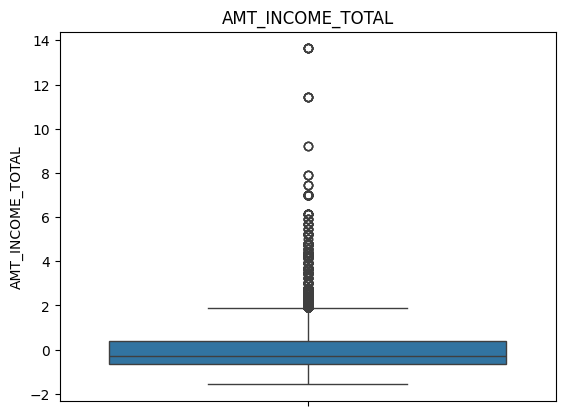

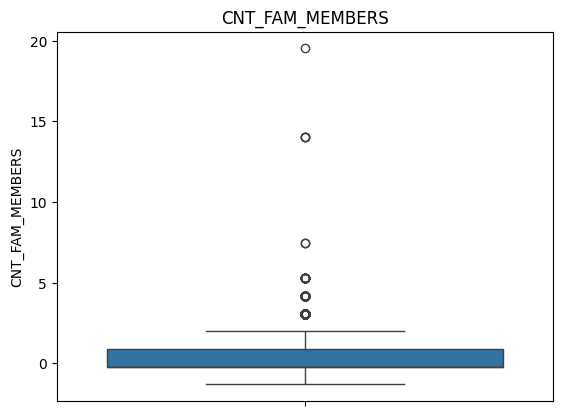

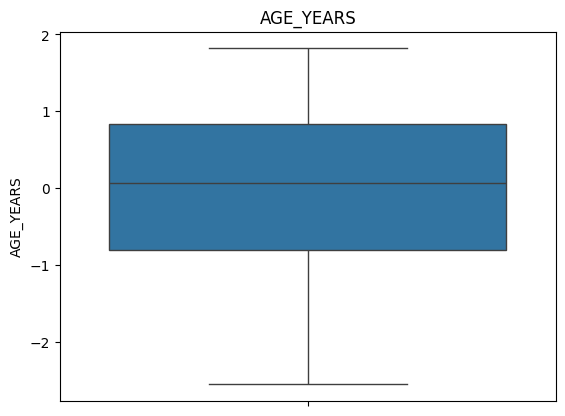

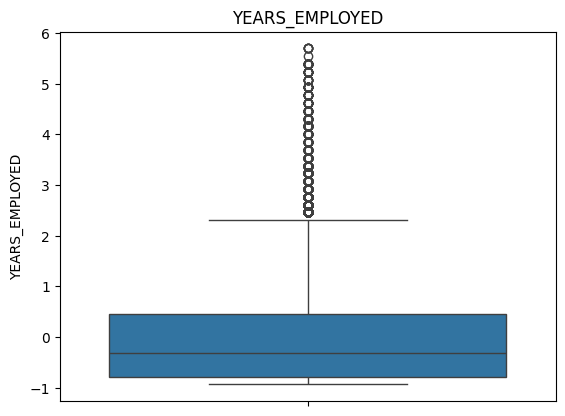

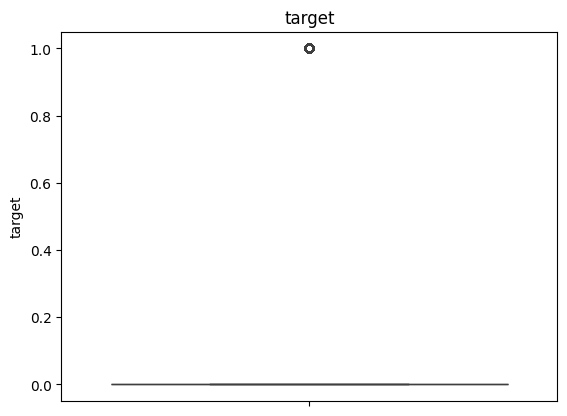

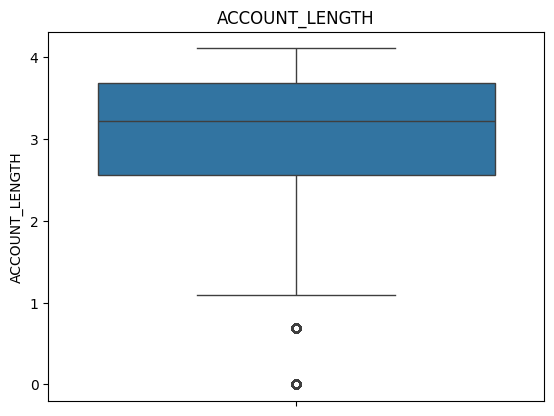

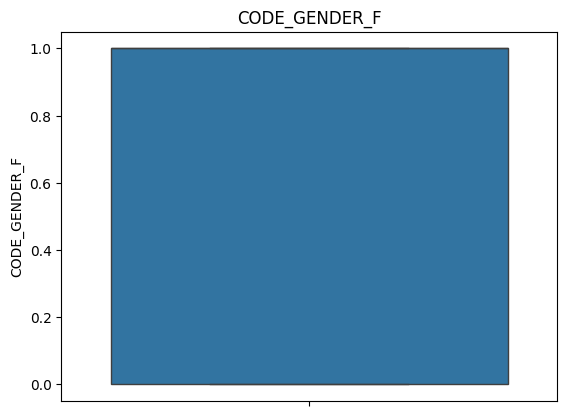

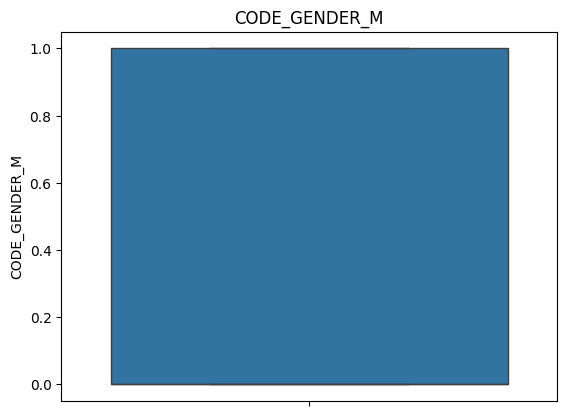

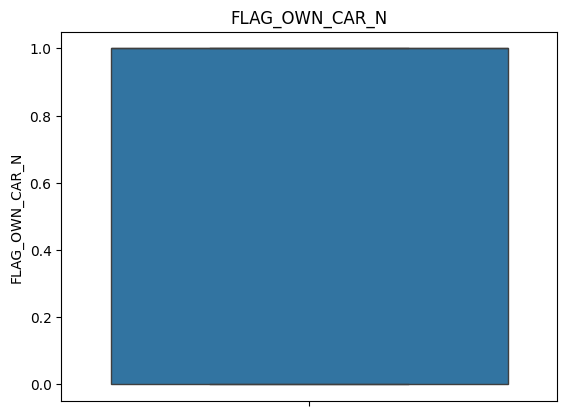

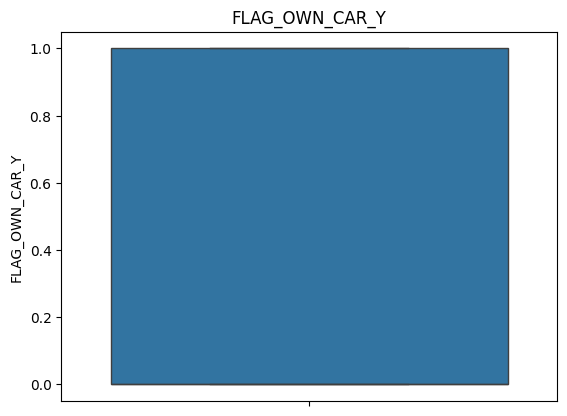

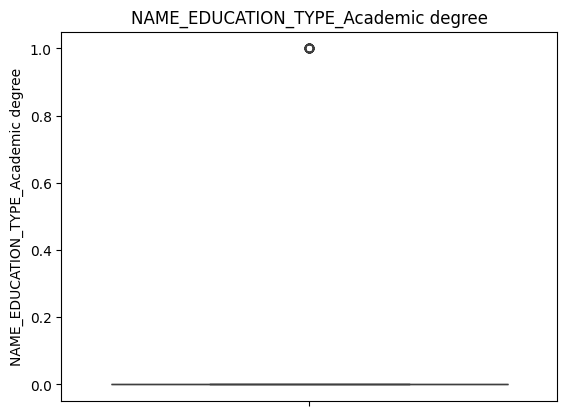

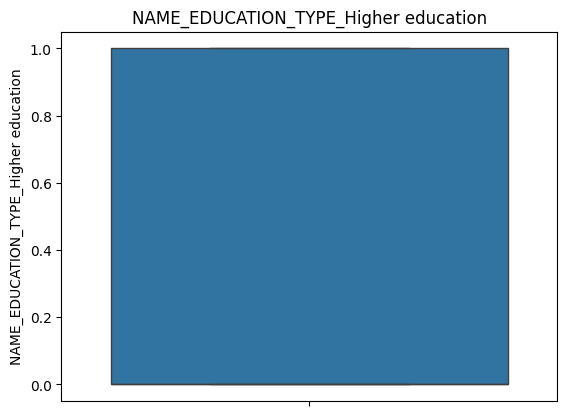

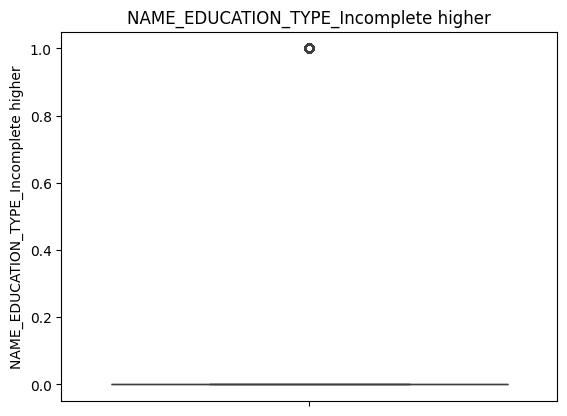

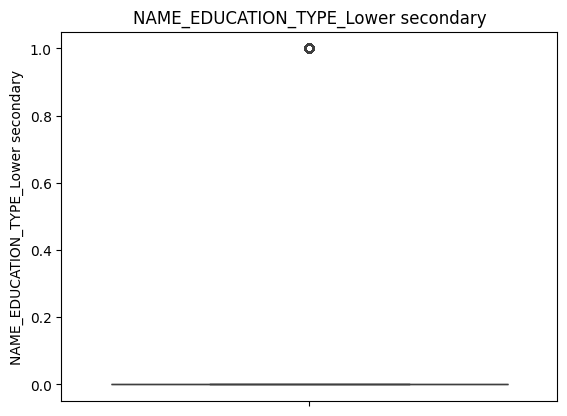

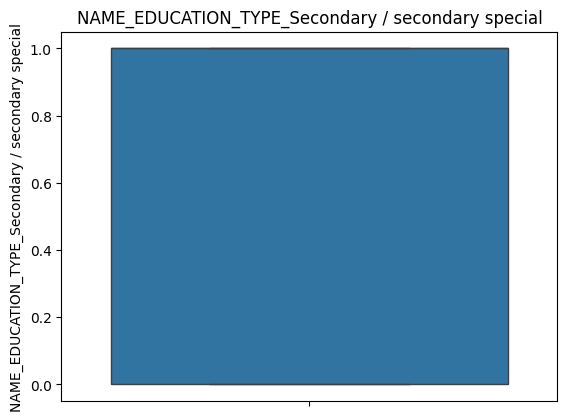

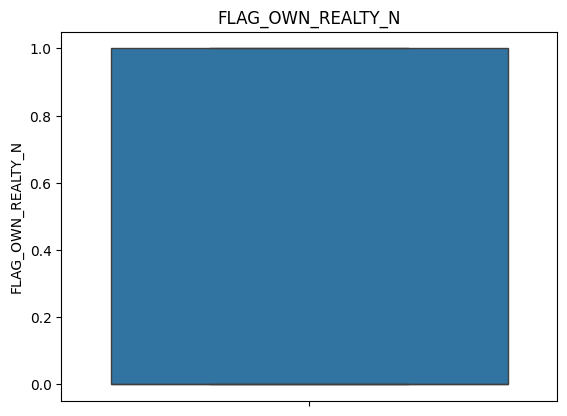

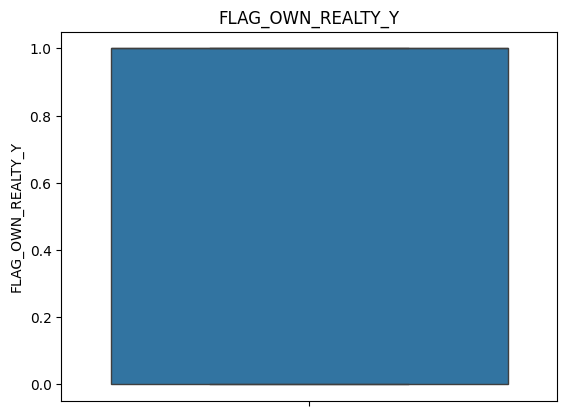

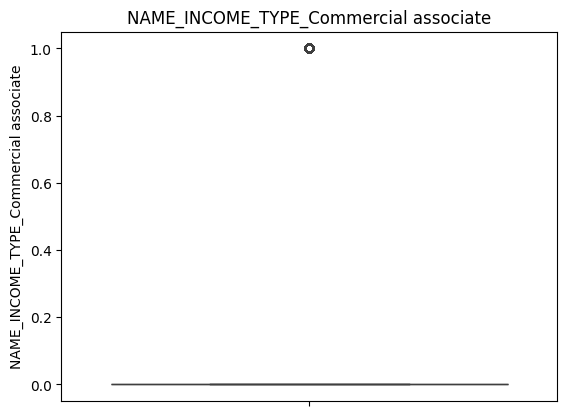

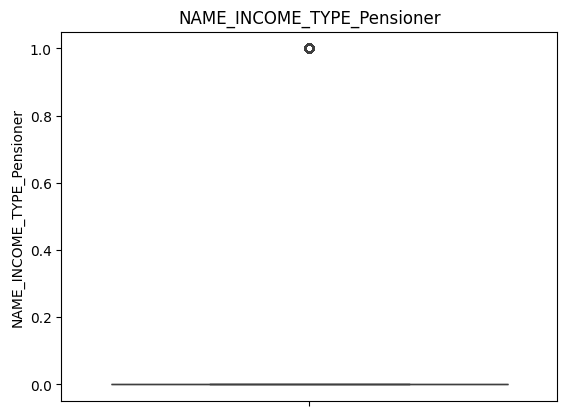

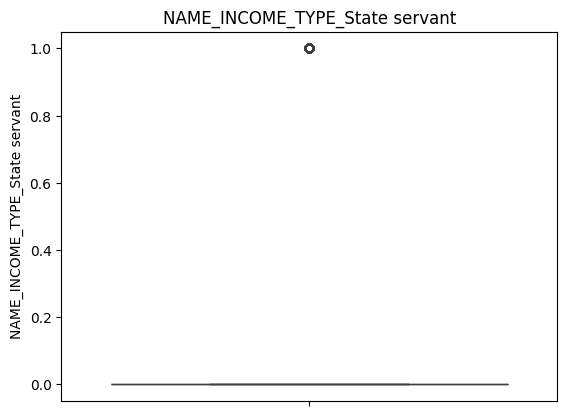

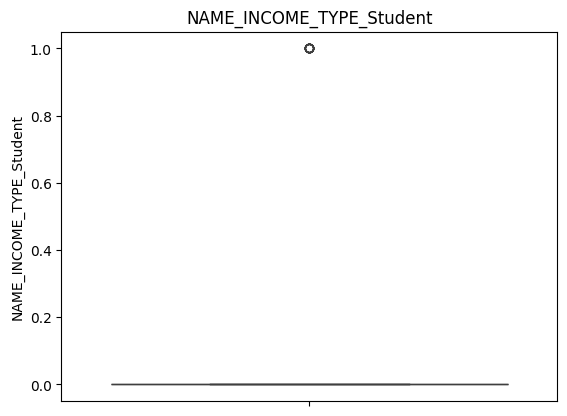

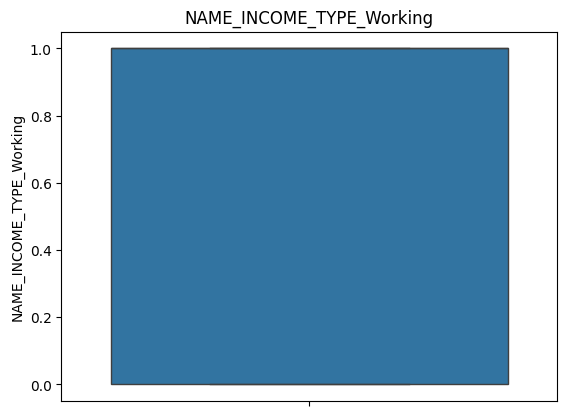

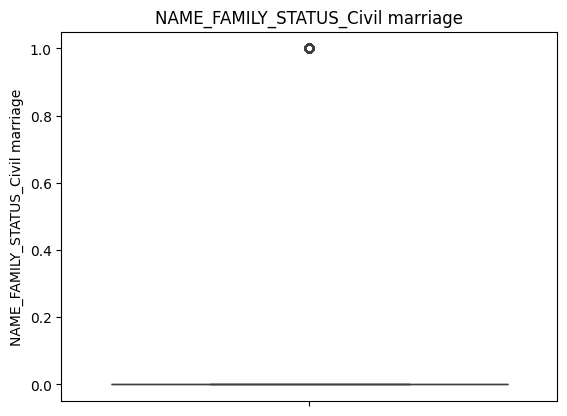

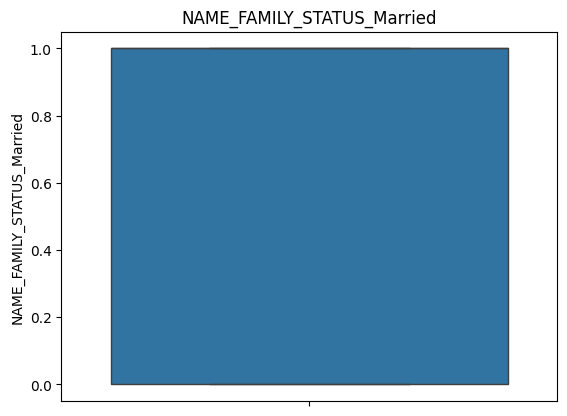

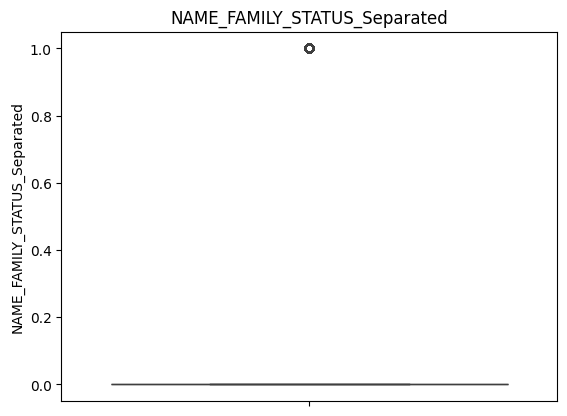

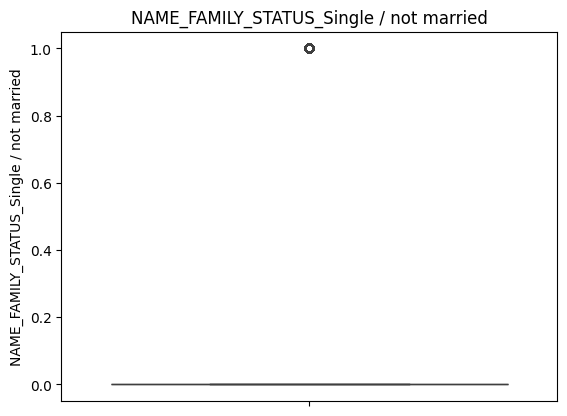

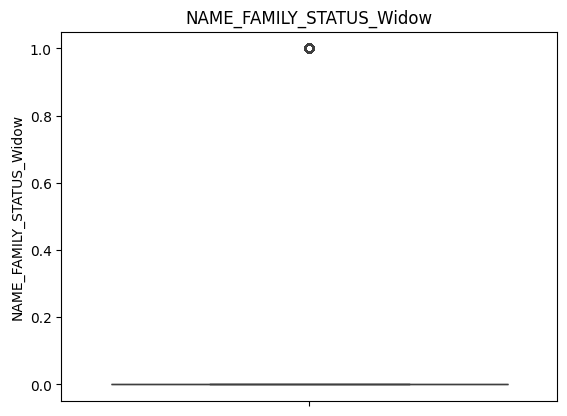

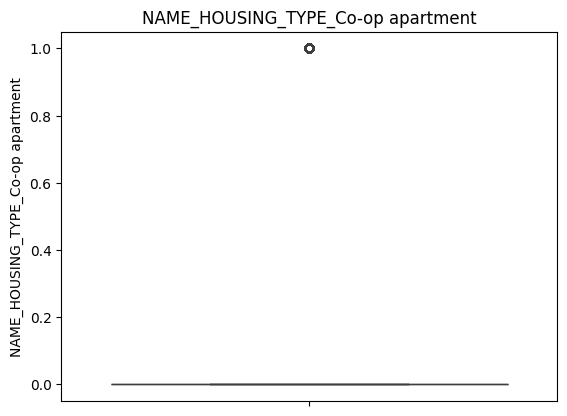

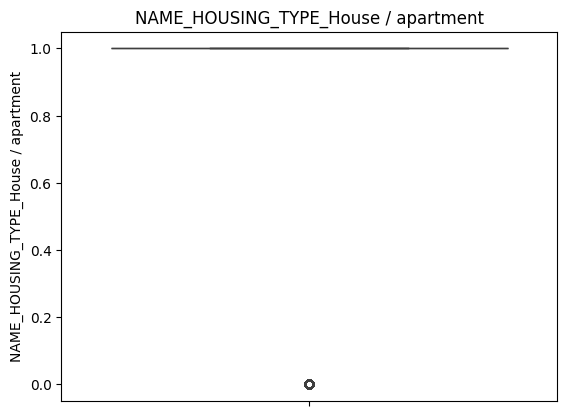

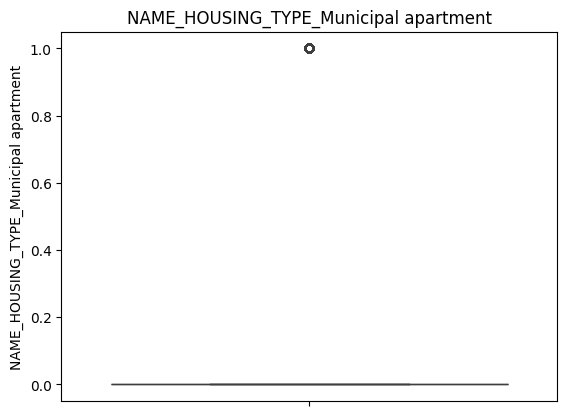

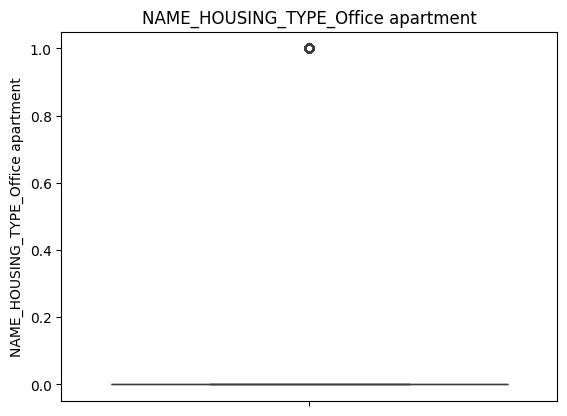

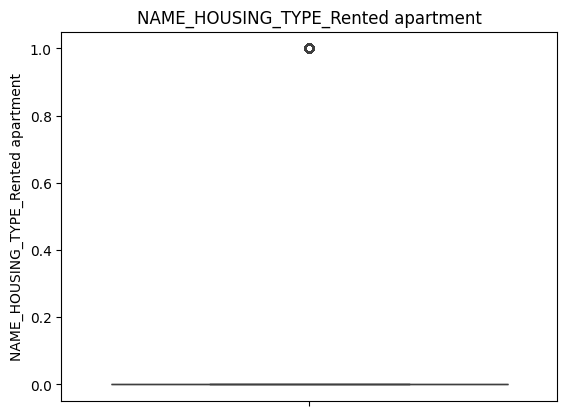

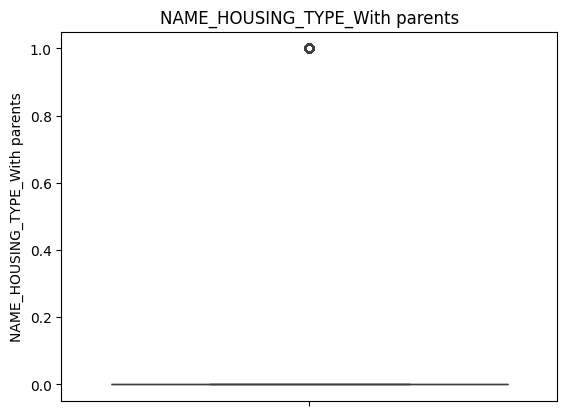

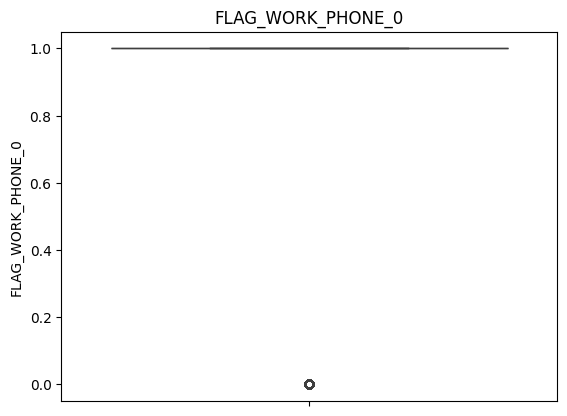

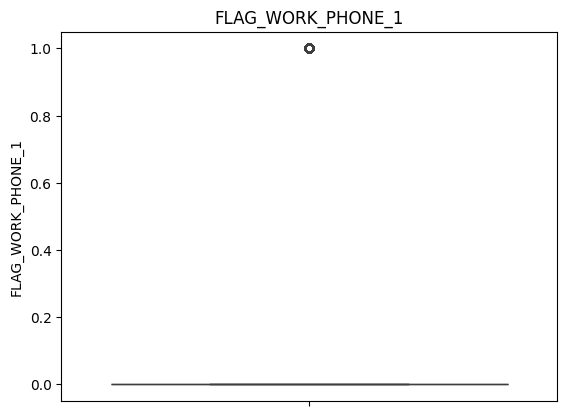

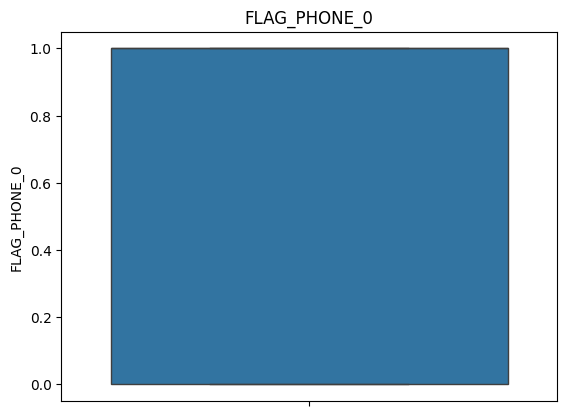

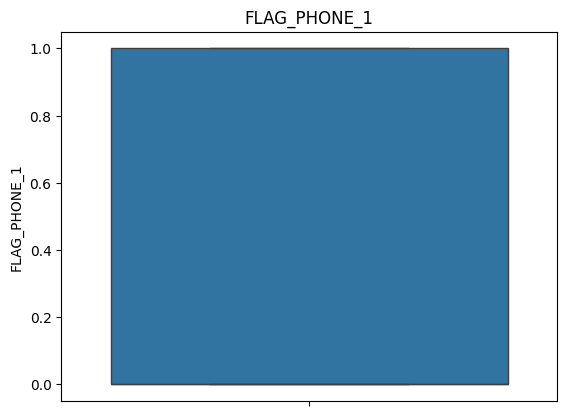

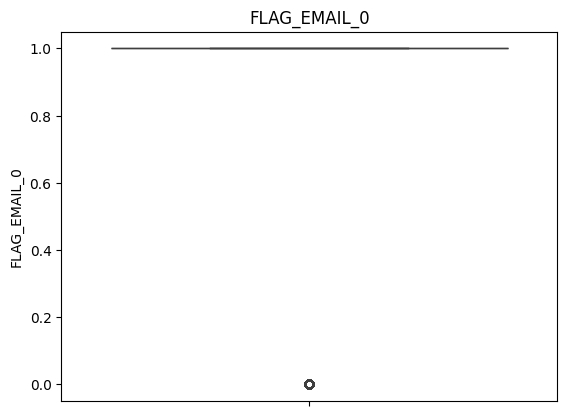

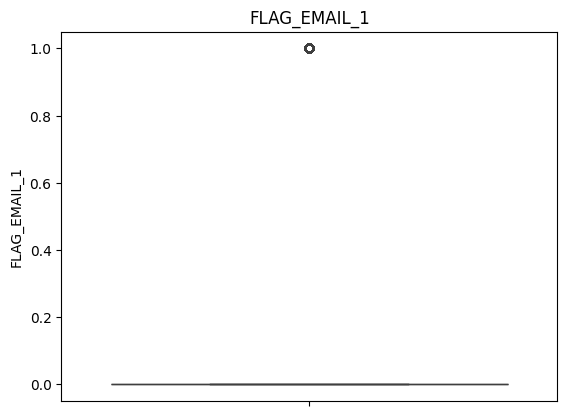

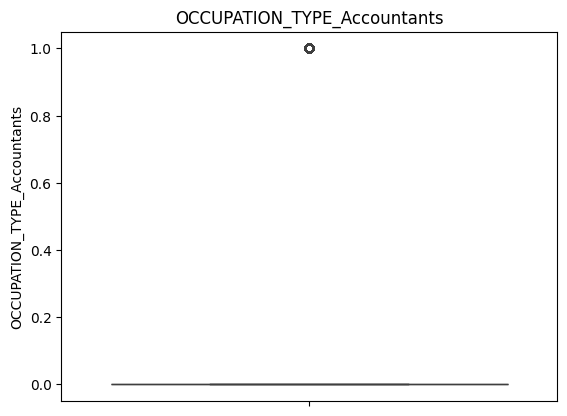

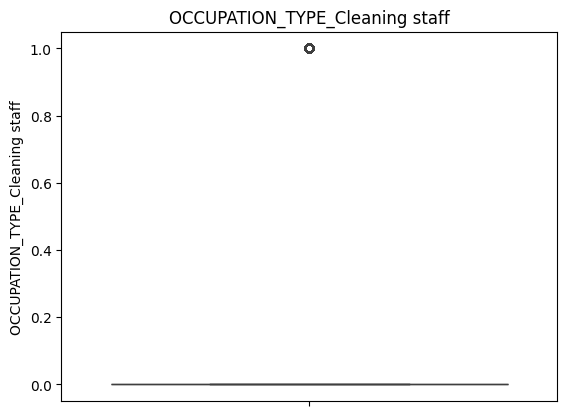

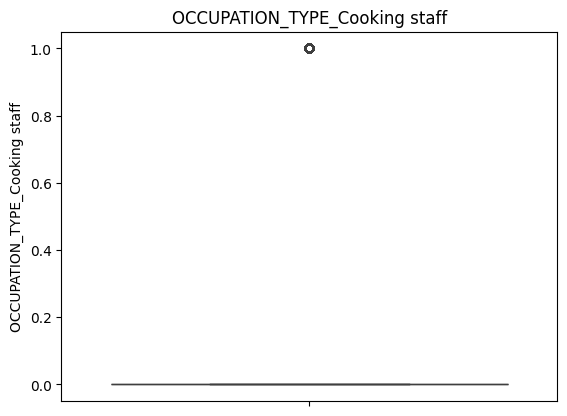

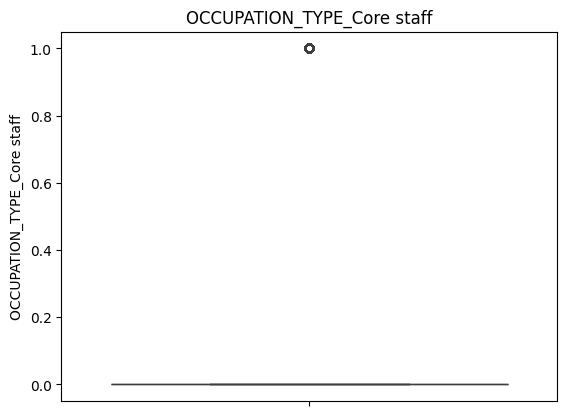

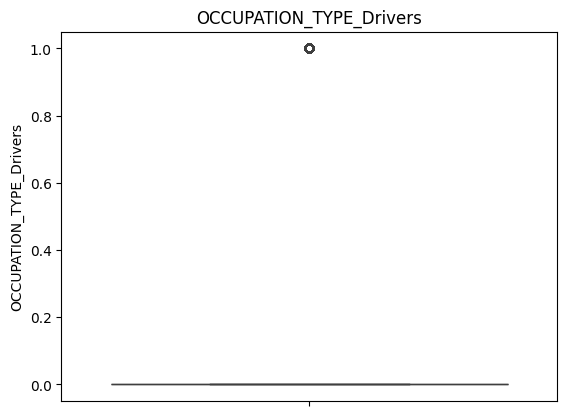

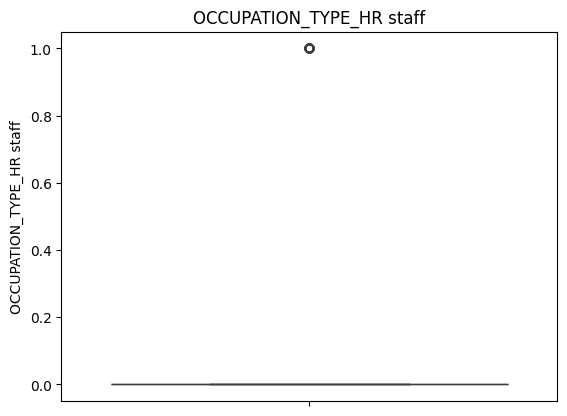

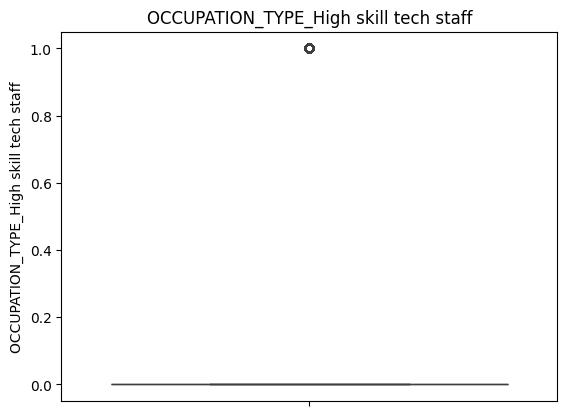

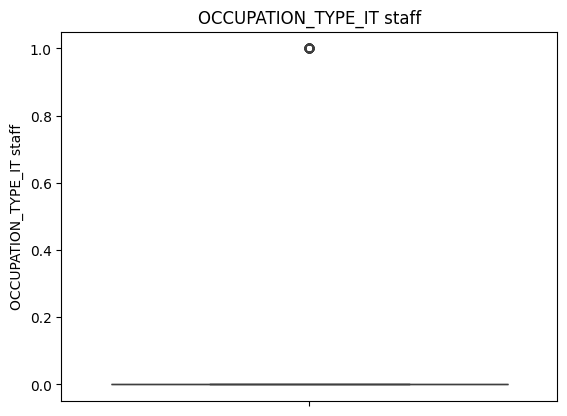

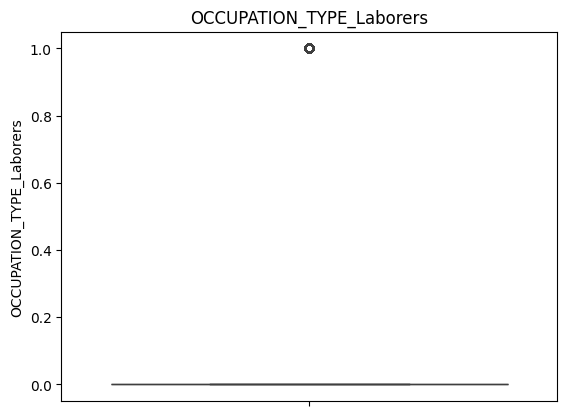

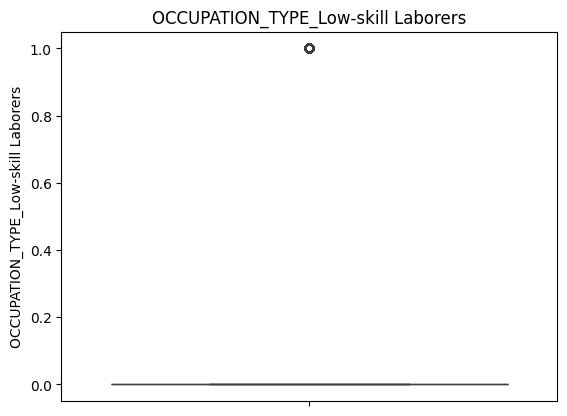

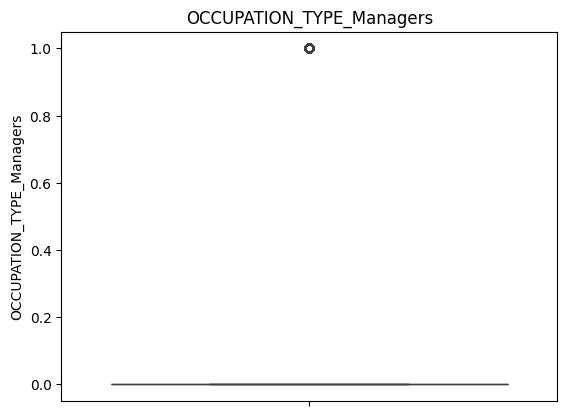

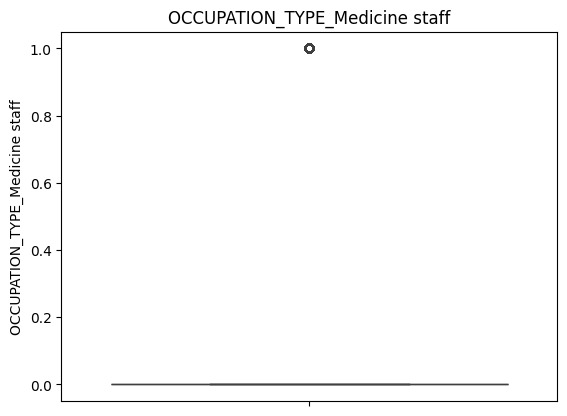

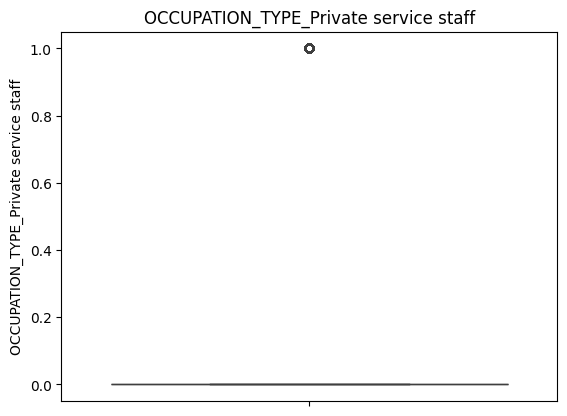

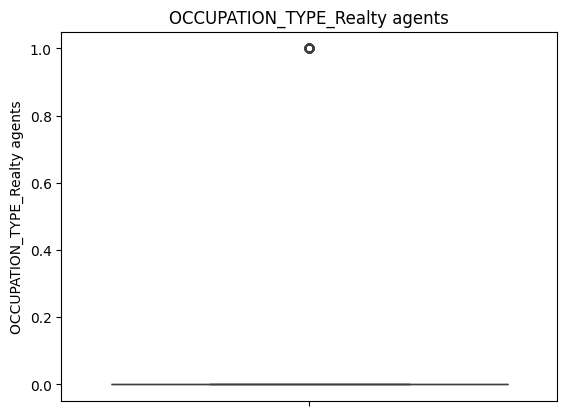

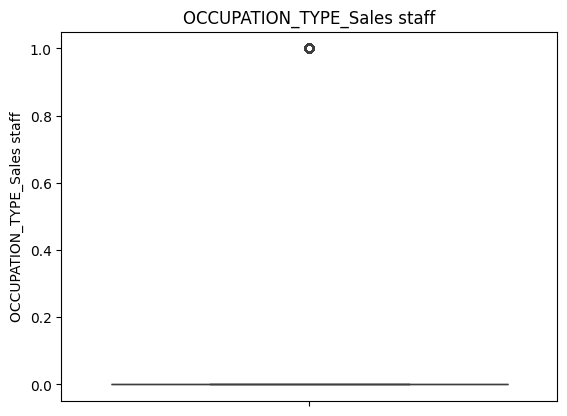

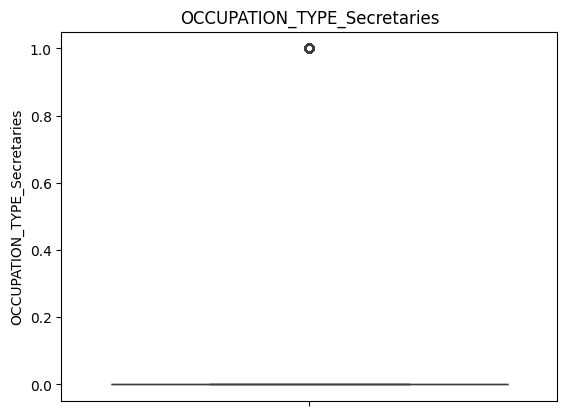

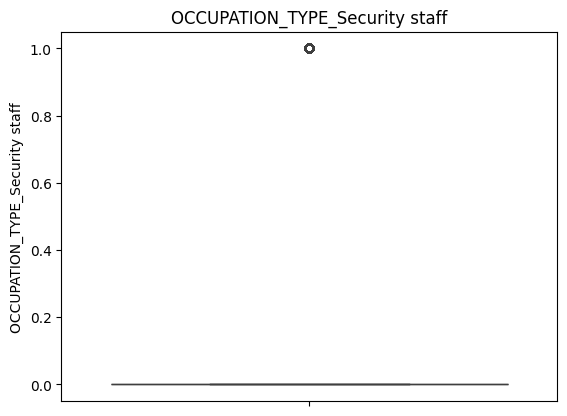

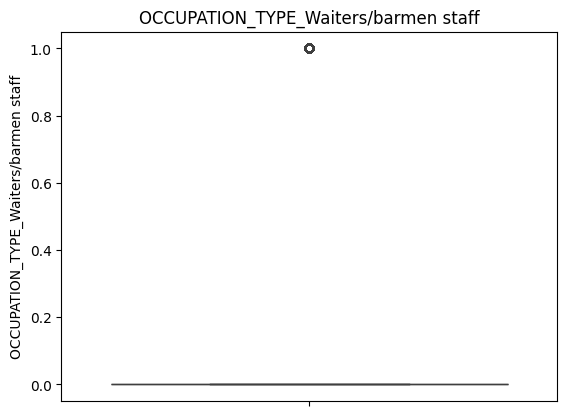

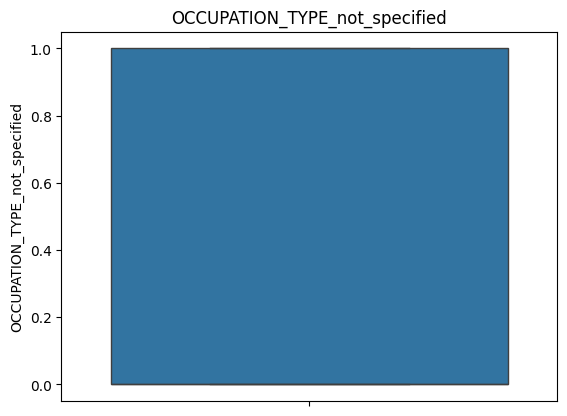

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# First we make boxplot of the features we selected to predict the outliers and remove if any
featured_dataset = df
fields = featured_dataset.columns
for column in fields:
    sns.boxplot(data=featured_dataset[column])
    plt.title(column)
    plt.show()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
dataset_a = df.copy()

# Selecting 1% of data from height column
dataset_a_1_perc = dataset_a['YEARS_EMPLOYED'].sample(frac=0.01)
# Replacing selected column values by NaN
dataset_a['YEARS_EMPLOYED'].loc[dataset_a.index.isin(dataset_a_1_perc.index)]=np.NaN

#Count of null values in outcome row
dataset_a['YEARS_EMPLOYED'].isnull().sum()

365

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
dataset_a['YEARS_EMPLOYED'] = dataset_a['YEARS_EMPLOYED'].fillna(dataset_a['YEARS_EMPLOYED'].mean())
dataset_a

AMT_INCOME_TOTAL  CNT_FAM_MEMBERS  AGE_YEARS  YEARS_EMPLOYED  target  \
0              2.365845        -0.217680  -0.908134        0.919119       1   
1              2.365845        -0.217680  -0.908134        0.919119       1   
2             -0.728827        -0.217680   1.237411       -0.468064       0   
3              0.818509        -1.314564   0.768805        0.302593       0   
4              0.818509        -1.314564   0.768805        0.302593       0   
...                 ...              ...        ...             ...     ...   
36452          1.260605        -0.217680   0.394492        0.148462       1   
36453         -0.286731        -0.217680  -0.798634       -0.313932       1   
36454         -0.286731        -0.217680  -0.798634       -0.313932       1   
36455          0.951138        -0.217680   0.548696       -0.622195       1   
36456         -0.728827        -1.314564  -1.921494       -0.468064       1   

       ACCOUNT_LENGTH  CODE_GENDER_F  CODE_GENDER_M  FLAG_OWN_CAR_N  \
0            2.772589              0              1               0   
1            2.708050              0              1               0   
2            3.401197              0              1               0   
3            1.609438              1              0               1   
4            3.295837              1              0               1   
...               ...            ...            ...             ...   
36452        2.484907              0              1               0   
36453        3.178054              1              0               1   
36454        3.496508              1              0               1   
36455        2.302585              1              0               1   
36456        2.639057              0              1               1   

       FLAG_OWN_CAR_Y  ...  OCCUPATION_TYPE_Low-skill Laborers  \
0                   1  ...                                   0   
1                   1  ...                                   0   
2                   1  ...                                   0   
3                   0  ...                                   0   
4                   0  ...                                   0   
...               ...  ...                                 ...   
36452               1  ...                                   0   
36453               0  ...                                   0   
36454               0  ...                                   0   
36455               0  ...                                   0   
36456               0  ...                                   0   

       OCCUPATION_TYPE_Managers  OCCUPATION_TYPE_Medicine staff  \
0                             0                               0   
1                             0                               0   
2                             0                               0   
3                             0                               0   
4                             0                               0   
...                         ...                             ...   
36452                         1                               0   
36453                         0                               1   
36454                         0                               1   
36455                         0                               0   
36456                         0                               0   

       OCCUPATION_TYPE_Private service staff  OCCUPATION_TYPE_Realty agents  \
0                                          0                              0   
1                                          0                              0   
2                                          0                              0   
3                                          0                              0   
4                                          0                              0   
...                                      ...                            ...   
36452                                      0          

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
dataset_a.isnull().sum()

AMT_INCOME_TOTAL                                     0
CNT_FAM_MEMBERS                                      0
AGE_YEARS                                            0
YEARS_EMPLOYED                                       0
target                                               0
ACCOUNT_LENGTH                                       0
CODE_GENDER_F                                        0
CODE_GENDER_M                                        0
FLAG_OWN_CAR_N                                       0
FLAG_OWN_CAR_Y                                       0
NAME_EDUCATION_TYPE_Academic degree                  0
NAME_EDUCATION_TYPE_Higher education                 0
NAME_EDUCATION_TYPE_Incomplete higher                0
NAME_EDUCATION_TYPE_Lower secondary                  0
NAME_EDUCATION_TYPE_Secondary / secondary special    0
FLAG_OWN_REALTY_N                                    0
FLAG_OWN_REALTY_Y                                    0
NAME_INCOME_TYPE_Commercial associate                0
NAME_INCOM

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
# First we calculate 25 and 75 percentile for both columns
ttl_target_25_perc = featured_dataset['target'].quantile(0.25)
ttl_target_75_perc = featured_dataset['target'].quantile(0.75)
ttl_target_iqr = ttl_target_75_perc - ttl_target_25_perc

# Now we find the upper and lower limit
ttl_target_limit_upper_perc = ttl_target_75_perc + 1.5 * ttl_target_iqr
ttl_target_limit_lower_perc = ttl_target_25_perc - 1.5 * ttl_target_iqr

# Finding outliers
new_dataset = featured_dataset[featured_dataset['target'] < ttl_target_limit_upper_perc]
new_dataset = new_dataset[new_dataset['target'] > ttl_target_limit_lower_perc]

Above 25 and 75 percent method is one of the good methods to detect outliers.

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
new_dataset.head()

Empty DataFrame
Columns: [AMT_INCOME_TOTAL, CNT_FAM_MEMBERS, AGE_YEARS, YEARS_EMPLOYED, target, ACCOUNT_LENGTH, CODE_GENDER_F, CODE_GENDER_M, FLAG_OWN_CAR_N, FLAG_OWN_CAR_Y, NAME_EDUCATION_TYPE_Academic degree, NAME_EDUCATION_TYPE_Higher education, NAME_EDUCATION_TYPE_Incomplete higher, NAME_EDUCATION_TYPE_Lower secondary, NAME_EDUCATION_TYPE_Secondary / secondary special, FLAG_OWN_REALTY_N, FLAG_OWN_REALTY_Y, NAME_INCOME_TYPE_Commercial associate, NAME_INCOME_TYPE_Pensioner, NAME_INCOME_TYPE_State servant, NAME_INCOME_TYPE_Student, NAME_INCOME_TYPE_Working, NAME_FAMILY_STATUS_Civil marriage, NAME_FAMILY_STATUS_Married, NAME_FAMILY_STATUS_Separated, NAME_FAMILY_STATUS_Single / not married, NAME_FAMILY_STATUS_Widow, NAME_HOUSING_TYPE_Co-op apartment, NAME_HOUSING_TYPE_House / apartment, NAME_HOUSING_TYPE_Municipal apartment, NAME_HOUSING_TYPE_Office apartment, NAME_HOUSING_TYPE_Rented apartment, NAME_HOUSING_TYPE_With parents, FLAG_WORK_PHONE_0, FLAG_WORK_PHONE_1, FLAG_PHONE_0, FLAG_PHONE_1, FLAG_EMAIL_0, FLAG_EMAIL_1, OCCUPATION_TYPE_Accountants, OCCUPATION_TYPE_Cleaning staff, OCCUPATION_TYPE_Cooking staff, OCCUPATION_TYPE_Core staff, OCCUPATION_TYPE_Drivers, OCCUPATION_TYPE_HR staff, OCCUPATION_TYPE_High skill tech staff, OCCUPATION_TYPE_IT staff, OCCUPATION_TYPE_Laborers, OCCUPATION_TYPE_Low-skill Laborers, OCCUPATION_TYPE_Managers, OCCUPATION_TYPE_Medicine staff, OCCUPATION_TYPE_Private service staff, OCCUPATION_TYPE_Realty agents, OCCUPATION_TYPE_Sales staff, OCCUPATION_TYPE_Secretaries, OCCUPATION_TYPE_Security staff, OCCUPATION_TYPE_Waiters/barmen staff, OCCUPATION_TYPE_not_specified]
Index: []

[0 rows x 58 columns]

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

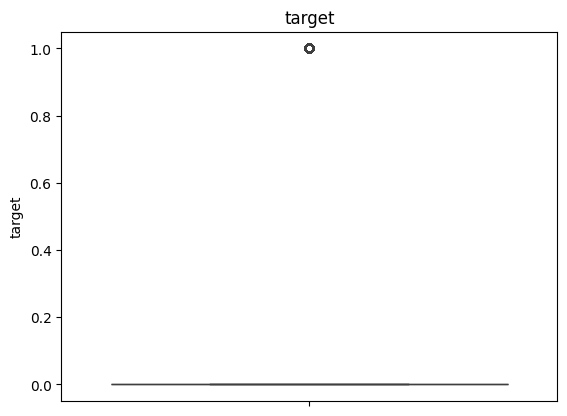

In [ ]:
# Now we box plot the features with no outliers
featured_dataset_no_outliers = df[['target']]
fields_no_outliers = featured_dataset_no_outliers.columns
for column in fields_no_outliers:
    sns.boxplot(data=featured_dataset_no_outliers[column])
    plt.title(column)
    plt.show()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
# Now we apply Logistic Regression on our new dataset without Outliers
logisticRegrNoOutliers = LogisticRegression()

y_no_outlier_data = df[['target']]
X_train_no_outlier_data, X_test_no_outlier_data, y_train_no_outlier_data, y_test_no_outlier_data = train_test_split(featured_dataset_no_outliers, y_no_outlier_data, test_size=0.1, random_state=42, stratify=y_no_outlier_data)
logisticRegrNoOutliers.fit(X_train_no_outlier_data, y_train_no_outlier_data)
threshold = 0.5
logisticRegrNoOutliers.predict(X_test_no_outlier_data)

array([0, 0, 1, ..., 0, 0, 0])

## Below we have applied 1%,5%,10% removal of random data and observing the variance,bias and loss.




In [ ]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Make a copy of the original data
original_data = df.copy()

# Function to introduce missing values and impute them using different methods
def evaluate_imputation(data, missing_percentage):
    # Seed for reproducibility
    np.random.seed(42)

    # Randomly select indices to set as missing values
    total_entries = data.shape[0] * data.shape[1]
    num_missing_entries = int(missing_percentage * total_entries)
    missing_indices = np.random.choice(total_entries, size=num_missing_entries, replace=False)

    # Create a mask to mark missing values
    missing_mask = np.full(data.size, False)
    missing_mask[missing_indices] = True
    missing_mask = missing_mask.reshape(data.shape)

    # Introduce missing values in the dataset
    data_with_missing = data.mask(missing_mask)

    # Impute missing values using different methods
    # Method 1: Mean imputation
    imputer_mean = SimpleImputer(strategy='mean')
    data_imputed_mean = imputer_mean.fit_transform(data_with_missing)

    # Convert the imputed data back to a DataFrame
    data_imputed_mean = pd.DataFrame(data_imputed_mean, columns=data.columns)

    # Method 2: Median imputation
    imputer_median = SimpleImputer(strategy='median')
    data_imputed_median = imputer_median.fit_transform(data_with_missing)

    # Convert the imputed data back to a DataFrame
    data_imputed_median = pd.DataFrame(data_imputed_median, columns=data.columns)

    # Method 3: k-NN imputation
    imputer_knn = KNNImputer(n_neighbors=5)
    data_imputed_knn = imputer_knn.fit_transform(data_with_missing)

    # Convert the imputed data back to a DataFrame
    data_imputed_knn = pd.DataFrame(data_imputed_knn, columns=data.columns)

    # Split the dataset into features and target variable
    X_mean = data_imputed_mean.drop(columns=['target'])
    y_mean = data_imputed_mean['target']

    X_median = data_imputed_median.drop(columns=['target'])
    y_median = data_imputed_median['target']

    X_knn = data_imputed_knn.drop(columns=['target'])
    y_knn = data_imputed_knn['target']

    # Split the dataset into training and testing sets
    X_train_mean, X_test_mean, y_train_mean, y_test_mean = train_test_split(X_mean, y_mean, test_size=0.2, random_state=42)
    X_train_median, X_test_median, y_train_median, y_test_median = train_test_split(X_median, y_median, test_size=0.2, random_state=42)
    X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.2, random_state=42)

    # Fit a model for bias and variance calculation
    model = RandomForestRegressor()
    model.fit(X_train_mean, y_train_mean)

    # Calculate bias and variance
    y_pred_mean = model.predict(X_test_mean)
    bias_mean = np.mean((y_test_mean - np.mean(y_pred_mean))**2)
    variance_mean = np.var(y_pred_mean)

    # Repeat for median imputation
    model.fit(X_train_median, y_train_median)
    y_pred_median = model.predict(X_test_median)
    bias_median = np.mean((y_test_median - np.mean(y_pred_median))**2)
    variance_median = np.var(y_pred_median)

    # Repeat for k-NN imputation
    model.fit(X_train_knn, y_train_knn)
    y_pred_knn = model.predict(X_test_knn)
    bias_knn = np.mean((y_test_knn - np.mean(y_pred_knn))**2)
    variance_knn = np.var(y_pred_knn)

    # Evaluate the performance of imputation methods using RMSE
    mse_mean = mean_squared_error(original_data, data_imputed_mean, squared=False)
    mse_median = mean_squared_error(original_data, data_imputed_median, squared=False)
    mse_knn = mean_squared_error(original_data, data_imputed_knn, squared=False)

    return mse_mean, mse_median, mse_knn, bias_mean, variance_mean, bias_median, variance_median, bias_knn, variance_knn

# Evaluate imputation performance for different missing percentages
missing_percentages = [0.01, 0.05, 0.1]

for missing_percentage in missing_percentages:
    mse_mean, mse_median, mse_knn, bias_mean, variance_mean, bias_median, variance_median, bias_knn, variance_knn = evaluate_imputation(original_data, missing_percentage)

    print(f"\nMissing Percentage: {missing_percentage * 100}%")
    print(f"Mean Imputation RMSE: {mse_mean}")
    print(f"Mean Imputation Bias: {bias_mean}")
    print(f"Mean Imputation Variance: {variance_mean}")
    print(f"Median Imputation RMSE: {mse_median}")
    print(f"Median Imputation Bias: {bias_median}")
    print(f"Median Imputation Variance: {variance_median}")
    print(f"k-NN Imputation RMSE: {mse_knn}")
    print(f"k-NN Imputation Bias: {bias_knn}")
    print(f"k-NN Imputation Variance: {variance_knn}")

## Question and Answers


* What are the data types? (Only numeric and categorical)

ANS -
Numerical Columns - 'ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'AGE_YEARS',
       'YEARS_EMPLOYED', 'target', 'ACCOUNT_LENGTH'

categorical - 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE'

* Are there missing values?

Yes there are missing values for the column, OCCUPATION_TYPE.

* What are the likely distributions of the numeric variables?

Refer to Analysis of Numerical and categorical Variables

* Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

The useful variables are -
arget                                               1.000000
ACCOUNT_LENGTH                                       0.085220
FLAG_OWN_REALTY_N                                    0.027990
AMT_INCOME_TOTAL                                     0.024202
CODE_GENDER_M                                        0.021257
FLAG_EMAIL_1                                         0.019658
NAME_EDUCATION_TYPE_Incomplete higher                0.018118
NAME_INCOME_TYPE_Commercial associate                0.016257
OCCUPATION_TYPE_Low-skill Laborers                   0.015274
OCCUPATION_TYPE_Security staff                       0.014359
NAME_FAMILY_STATUS_Single / not married              0.013716
OCCUPATION_TYPE_Core staff                           0.011522
OCCUPATION_TYPE_Managers                             0.010972
FLAG_OWN_CAR_N                                       0.010580
NAME_INCOME_TYPE_State servant                       0.010451
OCCUPATION_TYPE_Medicine staff                       0.009960
NAME_EDUCATION_TYPE_Academic degree                  0.009294
CNT_FAM_MEMBERS                                      0.009004
NAME_HOUSING_TYPE_Municipal apartment                0.008472
NAME_HOUSING_TYPE_Rented apartment                   0.008418
OCCUPATION_TYPE_IT staff                             0.008269
OCCUPATION_TYPE_High skill tech staff                0.008118
NAME_HOUSING_TYPE_Office apartment                   0.007218
NAME_HOUSING_TYPE_With parents                       0.007103
OCCUPATION_TYPE_HR staff                             0.007051
NAME_FAMILY_STATUS_Civil marriage                    0.006364
FLAG_PHONE_0                                         0.006355
OCCUPATION_TYPE_Cooking staff                        0.005707
YEARS_EMPLOYED                                       0.004712

* Which independent variables have missing data? How much?
OCCUPATION_TYPE - 134193


* Do the training and test sets have the same data?
No we don't have a training and testing test defined. Instead, we use train_test_split from scikit-learn such that 80% is training data and 20% is testing data.

* In the predictor variables independent of all the other predictor variables?

Yes the predictor variables are independent of all other predictor variables. From the heatmap, we can clearly confirm that there is no scope of multicollinearity.

* Which predictor variables are the most important?

ACCOUNT_LENGTH                                       0.085220
FLAG_OWN_REALTY_N                                    0.027990
AMT_INCOME_TOTAL                                     0.024202
CODE_GENDER_M                                        0.021257
FLAG_EMAIL_1                                         0.019658
NAME_EDUCATION_TYPE_Incomplete higher                0.018118
NAME_INCOME_TYPE_Commercial associate                0.016257

* Do the ranges of the predictor variables make sense?

The ranges of the predictor varibales does make sense.

* What are the distributions of the predictor variables?   
ANS - We get normal distribution for all the predictor variables in form of bell curve.
* Remove outliers and keep outliers (does if have an effect of the final predictive model)?
ANS - After removing outlier in final predictive model we will get different confusion matrix value.
* Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

In [ ]:
!pip install opendatasets

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
!pip install h2o

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
%matplotlib inline
import random, os, sys
import h2o
import pandas
import pprint
import operator
import matplotlib
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from tabulate import tabulate
from h2o.automl import H2OAutoML
from datetime import datetime
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
import pandas as pd
import seaborn as sns

## The above code imports various Python libraries for data manipulation, machine learning, visualization, and system interaction.
## It sets up the environment for working with H2O, a machine learning platform.
## The provided libraries are essential for performing data analysis, training machine learning models, and evaluating their performance.

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
#Connect to a cluster or initialize it if not started
h2o.init(strict_version_check=False)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1 = h2o.import_file('https://raw.githubusercontent.com/bhagyatrivedi/DSEM_dataset/main/application_record.csv')

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
##Converting the H2O dataframe to Pandas DF
df1 = df1.as_data_frame()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1.head()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1.shape

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1 = df1.drop_duplicates(subset='ID',keep='first')

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1.shape

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1.columns[1:]

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1.isnull().sum()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1['NAME_INCOME_TYPE'].unique()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1['NAME_EDUCATION_TYPE'].unique()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1['NAME_FAMILY_STATUS'].unique()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1['NAME_HOUSING_TYPE'].unique()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1['FLAG_MOBIL'].value_counts()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1['FLAG_WORK_PHONE'].unique()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1['FLAG_PHONE'].unique()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1['FLAG_EMAIL'].unique()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1['OCCUPATION_TYPE'].value_counts(dropna=False)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1['OCCUPATION_TYPE'].fillna('not_specified',inplace=True)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1['OCCUPATION_TYPE'].value_counts(dropna=False)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1.describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
from sklearn.model_selection import KFold, cross_val_score,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1[df1['DAYS_EMPLOYED']>=0]['DAYS_EMPLOYED'].value_counts()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1['DAYS_EMPLOYED'].replace(365243,0,inplace=True)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1[df1['DAYS_EMPLOYED']>=0]['DAYS_EMPLOYED'].value_counts()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1['AGE_YEARS']=round(-df1['DAYS_BIRTH']/365.2425,0)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1['YEARS_EMPLOYED']=round(-df1['DAYS_EMPLOYED']/365.2425)
df1.loc[df1['YEARS_EMPLOYED']<0,'YEARS_EMPLOYED']=0

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1.drop(columns=["DAYS_BIRTH","DAYS_EMPLOYED"],inplace=True)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1.describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1['ID'].duplicated().sum()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1.drop(columns=["FLAG_MOBIL"],inplace=True)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df2 = h2o.import_file('https://raw.githubusercontent.com/bhagyatrivedi/DSEM_dataset/main/credit_record.csv')

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df2 = df2.as_data_frame()

# # Perform drop_duplicates in pandas
# pandas_df_no_duplicates = pandas_df.drop_duplicates(subset='ID', keep='first')

# # Convert back to H2OFrame
# h2o_df_no_duplicates = h2o.H2OFrame(pandas_df_no_duplicates)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df2.shape

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df2.info()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df2.duplicated().sum()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df2[df2['STATUS'].isin(['X', 'C'])]

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df2['ID'].nunique()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df2['target']=df2['STATUS']
df2['target'].replace('X', 0, inplace=True)
df2['target'].replace('C', 0, inplace=True)
df2['target']=df2['target'].astype(int)
df2.loc[df2['target']>=1,'target']=1

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df3=pd.DataFrame(df2.groupby(['ID'])['target'].agg("max")).reset_index()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df3["target"].value_counts()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df = pd.merge(df1, df3, how='inner', on=['ID'])

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
start_df = pd.DataFrame(df2.groupby(['ID'])['MONTHS_BALANCE'].agg(min)).reset_index()

start_df.rename(columns={'MONTHS_BALANCE': 'ACCOUNT_LENGTH'}, inplace=True)

start_df['ACCOUNT_LENGTH'] = -start_df['ACCOUNT_LENGTH']

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df = pd.merge(df, start_df, how='inner', on=['ID'])

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df.describe()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df.dtypes

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df.columns

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df.drop(columns=['ID', 'CNT_CHILDREN'], inplace=True)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
corr = df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr, annot=True)
plt.show()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
!pip install imbalanced-learn scikit-learn

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
columns_to_scale = ['AMT_INCOME_TOTAL', 'AGE_YEARS','YEARS_EMPLOYED', 'CNT_FAM_MEMBERS']

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
dummy = df.copy()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
st=StandardScaler()
df[columns_to_scale] = st.fit_transform(df[columns_to_scale])

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
columns_to_encode = ['CODE_GENDER','FLAG_OWN_CAR','NAME_EDUCATION_TYPE', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE']
df=pd.get_dummies(df,columns=columns_to_encode,dtype='int')

 this code snippet effectively transforms selected categorical variables into a format suitable for machine learning algorithms, enhancing the dataset's usability without losing the information contained within the categorical variables.

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
# Convert back to H2OFrame
df = h2o.H2OFrame(df)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
# set this to True if interactive (matplotlib) plots are desired
interactive = True
if not interactive: matplotlib.use('Agg', warn=False)
import matplotlib.pyplot as plt

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
# Data exploration and munging. Generate scatter plots
data = df
def scatter_plot(data, x, y, max_points = 1000, fit = True):
    if(fit):
        lr = H2OGeneralizedLinearEstimator(family = "gaussian")
        lr.train(x=x, y=y, training_frame=data)
        coeff = lr.coef()
    df = data[[x,y]]
    runif = df[y].runif()
    df_subset = df[runif < float(max_points)/data.nrow]
    df_py = h2o.as_list(df_subset)

    if(fit): h2o.remove(lr._id)

    # If x variable is string, generate box-and-whisker plot
    if(df_py[x].dtype == "object"):
        if interactive: df_py.boxplot(column = y, by = x)
    # Otherwise, generate a scatter plot
    else:
        if interactive: df_py.plot(x = x, y = y, kind = "scatter")

    if(fit):
        x_min = min(df_py[x])
        x_max = max(df_py[x])
        y_min = coeff["Intercept"] + coeff[x]*x_min
        y_max = coeff["Intercept"] + coeff[x]*x_max
        plt.plot([x_min, x_max], [y_min, y_max], "k-")
    if interactive: plt.show()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
data.describe()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

The `scatter_plot` function visualizes relationships between two variables using scatter or box-and-whisker plots, with an option to include a linear regression line. When enabled, it fits a linear model to the data, then subsets the data to a manageable size for clear visualization, and converts it to a pandas DataFrame for plotting. The plot type—scatter for numerical `x` variables and box-and-whisker for categorical `x` variables—is determined by the `x` variable's data type. If a linear fit is applied, the function calculates and plots the regression line based on the model's coefficients, providing insights into the linear relationship between the variables. This function serves as a versatile tool for preliminary data exploration and understanding variable interactions within a dataset.

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
!pip install statsmodels


This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
# Create a test/train split
train,test = data.split_frame([.9])

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
data.columns

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
# #  Set response variable and your choice of predictor variables
# myY = "target"
# myX = ["AMT_INCOME_TOTAL","AGE_YEARS","CNT_FAM_MEMBERS","target"]

myX= data.columns
myY= "target"


This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
# Build simple GLM model
data_glm = H2OGeneralizedLinearEstimator(family="gaussian", standardize=True)
data_glm.train(x               =myX,
               y               =myY,
               training_frame  =train,
               validation_frame=test)

The GLM model summary showcases a regression analysis with an Elastic Net regularization (alpha = 0.5, lambda = 4.552E-5), utilizing 54 out of 57 predictors. The model's performance on training data indicates a modest fit, with an R^2 of 0.0105, suggesting that only about 1.05% of the variance in the response variable is explained. Performance metrics on both training and validation datasets (MSE, RMSE, MAE, RMSLE) indicate similar levels of predictive accuracy, with a slight improvement in validation MSE, but the low R^2 values on both datasets highlight limited predictive power.

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
# Build simple GBM model

data_gbm = H2OGradientBoostingEstimator(balance_classes=True,
                                        ntrees         =10,
                                        max_depth      =1,
                                        learn_rate     =0.1,
                                        min_rows       =2)

data_gbm.train(x=myX,
               y=myY,
               training_frame=train,
               validation_frame=test)

The GBM (Gradient Boosting Machine) model summary reveals its performance metrics on both training and validation datasets. On the training data, the model exhibits a Mean Squared Error (MSE) of 0.1035 and a Root Mean Squared Error (RMSE) of 0.3217, alongside a Mean Absolute Error (MAE) of 0.2074 and a Root Mean Squared Logarithmic Error (RMSLE) of 0.2248. The Mean Residual Deviance mirrors the MSE at 0.1035. Transitioning to the validation data, there's a slight improvement in performance with a MSE of 0.1004, RMSE of 0.3168, MAE of 0.2040, and RMSLE of 0.2219, with the Mean Residual Deviance also at 0.1004. These metrics indicate the model's consistent predictive accuracy across both datasets, with marginally better performance on the validation set.

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
# Variable importances from each algorithm
# Calculate magnitude of normalized GLM coefficients
from six import iteritems
glm_varimp = data_glm.coef_norm()
for k,v in iteritems(glm_varimp):
    glm_varimp[k] = abs(glm_varimp[k])

# Sort in descending order by magnitude
glm_sorted = sorted(glm_varimp.items(), key = operator.itemgetter(1), reverse = True)
table = tabulate(glm_sorted, headers = ["Predictor", "Normalized Coefficient"], tablefmt = "orgtbl")
print("Variable Importances:\n\n" + table)

data_glm.varimp()
data_gbm.varimp()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
dir(data_glm)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
data_glm.std_coef_plot()
data_gbm.varimp_plot()

data_glm.std_coef_plot()
This function is typically associated with Generalized Linear Models (GLM) trained using H2O.
std_coef_plot() generates a plot of the standardized coefficients of the GLM model.
Standardized coefficients represent the change in the response variable for a one standard deviation change in the predictor variable, making them comparable across variables even if they are on different scales.
This plot helps in understanding which features have the most significant impact on the response variable, with larger coefficients (positive or negative) indicating a stronger impact.
data_gbm.varimp_plot()
This function is associated with Gradient Boosting Machine (GBM) models trained using H2O.
varimp_plot() generates a plot showing the variable importance of features used in the GBM model.
Variable importance in the context of GBM (and many tree-based models) often reflects the improvement in the model's predictive accuracy attributable to each feature. This can be calculated in various ways, such as the total reduction of the criterion used for splitting nodes (e.g., Gini impurity for classification, MSE for regression) brought by that feature across all trees.
The plot helps identify which features are most influential in predicting the response variable, with higher importance values indicating more critical features for the model's predictions.
General Interpretation
Both plots serve as crucial tools for model interpretation and feature selection. By visualizing the importance or impact of each feature, they provide insights into the model's behavior and help in understanding which features drive the model's predictions.
These visualizations can guide the refinement of the model (e.g., removing less important features) and inform domain-specific interpretations and decisions based on the model's findings.

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
# Model performance of GBM model on test data
data_gbm.model_performance(test)

1. MSE (Mean Squared Error): 0.10036144126518667
MSE measures the average squared difference between the actual and predicted values. A lower MSE value indicates better model performance. In this context, an MSE of approximately 0.1004 suggests that, on average, the squared difference between the predicted and actual values is relatively small, pointing towards a decent model accuracy.
2. RMSE (Root Mean Squared Error): 0.3167987393680516
RMSE is the square root of MSE, providing a measure of the average error in the same units as the target variable. It's particularly useful because it gives a relatively high weight to large errors. An RMSE of about 0.3168 indicates that the model's predictions are, on average, within this margin of error from the actual values. This metric is easier to interpret relative to the scale of the target variable.
3. MAE (Mean Absolute Error): 0.20397184542218808
MAE measures the average magnitude of errors in predictions, without considering their direction. A lower MAE value is better, indicating that the model's predictions are closer to the actual values. An MAE of approximately 0.204 suggests that the model has a reasonable level of accuracy, with predictions deviating from actual values by this amount on average.
4. RMSLE (Root Mean Squared Logarithmic Error): 0.22189692298545935
RMSLE is similar to RMSE but uses the logarithm of the predictions and actual values. This makes it particularly sensitive to relative rather than absolute differences, penalizing underestimates more than overestimates. An RMSLE of about 0.2219 indicates that the model is relatively accurate, especially in predicting the order of magnitude of the target variable.
5. Mean Residual Deviance: 0.10036144126518667
This metric is similar to MSE but specific to the distribution and link function used in the model. For Gaussian distributions with an identity link (common in regression problems), it essentially equals the MSE. It provides another angle to assess model performance, with lower values indicating better fit.

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
# Create a test/train split
#https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-munging/splitting-datasets.html check h2o split frame syntax here
train,test = data.split_frame([.9])

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
#  Set response variable and your choice of predictor variables
myY = "target"
myX = data.columns

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
# Build simple GLM model
# Build simple GLM model
data_glm = H2OGeneralizedLinearEstimator(family="gaussian", standardize=True)
data_glm.train(x               =myX,
               y               =myY,
               training_frame  =train,
               validation_frame=test)

Training Data Performance:
MSE (Mean Squared Error): 0.10354100889741454 and RMSE (Root Mean Squared Error): 0.3217778875209024 indicate the average squared difference between the estimated and actual values is relatively low, suggesting a decent fit of the model to the training data.
MAE (Mean Absolute Error): 0.20708874342378958 reflects the average absolute difference between predicted and actual values, further confirming the model's reasonable accuracy on the training set.
RMSLE (Root Mean Squared Logarithmic Error): 0.22507890371130987 shows the model's performance in terms of the logarithmic differences between predicted and actual values, useful for comparing relative errors.
R^2 (Coefficient of Determination): 0.010465785603294808 is very low, indicating that only about 1.05% of the variance in the target variable is explained by the model, suggesting the model’s explanatory power is limited.
AIC (Akaike Information Criterion): 18846.29193161109 provides a measure of the model quality, considering both the complexity of the model and its fit to the data.
Validation Data Performance:
The MSE: 0.09608512937838105 and RMSE: 0.3099760141984877 on the validation data are slightly better than those on the training data, indicating a good generalization of the model.
MAE: 0.20042308023799796 and RMSLE: 0.21824108526117914 on the validation set are consistent with the training performance, supporting the model's ability to maintain its predictive accuracy on unseen data.
R^2: 0.004815845269833696 on the validation set is even lower than on the training set, emphasizing the model's limited capacity to explain the variance in the target variable in unseen data.
AIC: 1900.2735738164354 for the validation data suggests a comparison of model quality in the context of the validation set, although direct comparisons of AIC across training and validation sets are not typically made due to differences in their calculation context.

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
data_glm.explain(train[1:100,:])

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
# Build simple GBM model

data_gbm = H2OGradientBoostingEstimator(balance_classes=True,
                                        ntrees         =10,
                                        max_depth      =1,
                                        learn_rate     =0.1,
                                        min_rows       =2)

data_gbm.train(x               =myX,
               y               =myY,
               training_frame  =train,
               validation_frame=test)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
data_gbm.explain(train[0:100,:])

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
# Variable importances from each algorithm
# Calculate magnitude of normalized GLM coefficients
from six import iteritems
glm_varimp = data_glm.coef_norm()
for k,v in iteritems(glm_varimp):
    glm_varimp[k] = abs(glm_varimp[k])

# Sort in descending order by magnitude
glm_sorted = sorted(glm_varimp.items(), key = operator.itemgetter(1), reverse = True)
table = tabulate(glm_sorted, headers = ["Predictor", "Normalized Coefficient"], tablefmt = "orgtbl")
print("Variable Importances:\n\n" + table)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
data_glm.varimp()

First Value (Raw Importance): Indicates the raw metric of importance assigned by the model, with higher values signifying greater importance. For example, 'ACCOUNT_LENGTH' has the highest raw importance score, making it the most influential predictor in this model.

Second Value (Scaled Importance): Normalizes the raw importance scores on a scale where the highest score is 1.0, facilitating comparison across variables. 'ACCOUNT_LENGTH' is used as the benchmark with a scaled importance of 1.0.

Third Value (Percentage): Represents the contribution of each variable to the model in percentage terms, based on its scaled importance. This provides an intuitive understanding of how much each predictor contributes to the model's predictions.

Variables' Significance: Starting from 'ACCOUNT_LENGTH' as the most significant predictor, the list orders variables by decreasing importance. Notable variables include demographic details like 'AGE_YEARS', financial attributes like 'AMT_INCOME_TOTAL', and employment-related features such as 'OCCUPATION_TYPE_not_specified'.

Observations: The broad range of variables with non-zero importance scores suggests that the model leverages diverse data aspects for predictions. Features with zero importance, such as 'NAME_HOUSING_TYPE_House / apartment', do not contribute to the model, indicating potential areas for feature selection or further investigation.

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
#importance of variables (predictor variables)
data_gbm.varimp()

Feature name (e.g., 'ACCOUNT_LENGTH', 'AMT_INCOME_TOTAL', etc.): This is the name of the column or feature in your dataset.

Mean: This value represents the mean or average value of the feature across all observations in the dataset.

Standard deviation: This value represents the standard deviation of the feature, which measures the spread of values around the mean.

Variance: This value represents the variance of the feature, which measures the variability or dispersion of values from the mean.

From the provided statistics, it appears that most features have a mean close to 0 and a standard deviation of 0, indicating that the values may be constant or very close to constant across the dataset. Additionally, the variance is also 0 for these features, confirming that there is no variability in the values.

Based on this information, some insights we can gather include:

Features with a standard deviation and variance of 0: These features are likely constant or have very little variability across the dataset. They may not provide useful information for predictive modeling and can be candidates for removal to reduce dimensionality and potentially improve model performance.

Features with non-zero mean, standard deviation, and variance: These features have some level of variability in their values across the dataset. They may contain more meaningful information for modeling and prediction.

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
data_glm.std_coef_plot()
data_gbm.varimp_plot()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
# Model performance of GBM model on test data
data_gbm.model_performance(test)

Mean Squared Error (MSE): The MSE measures the average of the squares of the errors between the predicted and actual values. In this case, the MSE is 0.096, indicating that, on average, the squared difference between the predicted and actual values is 0.096. Lower values of MSE are desirable, suggesting better model performance.

Root Mean Squared Error (RMSE): The RMSE is the square root of the MSE and provides a measure of the average magnitude of the errors in the predicted values. Here, the RMSE is approximately 0.310, which means that, on average, the model's predictions are off by around 0.310 units from the actual values. As with MSE, lower RMSE values are preferred.

Mean Absolute Error (MAE): The MAE represents the average absolute difference between the predicted and actual values. In this case, the MAE is approximately 0.201, indicating that, on average, the model's predictions are off by around 0.201 units from the actual values. Lower MAE values are desirable.

Root Mean Squared Logarithmic Error (RMSLE): The RMSLE is the root mean squared error of the natural logarithm of the predicted values and the actual values. It is particularly useful when the target variable has a wide range of values. Here, the RMSLE is approximately 0.218, suggesting that the model's predictions have a low error when compared on a logarithmic scale.

Mean Residual Deviance: The mean residual deviance measures the average squared difference between the predicted and actual values, normalized by the degrees of freedom. It is an important measure of goodness of fit for the model.

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
#check the model performance of glm test dataset
data_glm.model_performance(test)


MSE (Mean Squared Error), RMSE (Root Mean Squared Error), and MAE (Mean Absolute Error):

These metrics are relatively low, indicating that the model's predictions are, on average, close to the actual values. However, without a benchmark or comparison model, it's challenging to assess their adequacy fully.
RMSLE (Root Mean Squared Logarithmic Error):

A lower RMSLE suggests the model handles differences in the scale of the data well, making it suitable for targets with exponential growth or significant variance.
R^2 (R-squared):

The R^2 value is very low (0.009), indicating that the model explains only 0.9% of the variance in the response variable based on the predictors. This suggests that, although the model might predict the response variable close to its mean, it does not effectively capture the variance in the data attributable to the predictors.
AIC (Akaike Information Criterion):

AIC provides a measure of the model's quality relative to other models. Lower AIC values are preferable, but this value needs to be compared with those from other models for it to be informative.
Is the Relationship Significant?
The low R^2 value suggests that the relationship between the predictors and the response variable, as captured by this GLM, might not be significant in a practical sense. It indicates that the predictors do not explain much of the variability in the response variable within the context of this model.

Statistical significance typically refers to the p-values associated with individual predictors' coefficients in the model, which are not provided here. Statistical significance tests whether each predictor's relationship with the response variable is likely due to chance. Without these p-values or confidence intervals for the coefficients, we cannot directly assess the statistical significance of individual relationships from the provided metrics.

Conclusion
Based on the metrics provided, especially the very low R^2 value, the relationships captured by this GLM on the test data might not be practically significant, meaning the model does not effectively explain the variance in the response variable. For a more definitive assessment of statistical significance, one would look at the p-values for each predictor within the model. Improvement might involve revisiting the model choice, feature selection, or data preprocessing to better capture the underlying relationships in the data.

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
def get_independent_variables(df, targ):
    C = [name for name in df.columns if name != targ and name !='DiabetesPedigreeFunction']
    # determine column types
    ints, reals, enums = [], [], []
    for key, val in df.types.items():
        if key in C:

            if val == 'enum':
                enums.append(key)
            elif val == 'int':
                ints.append(key)
            else:
                reals.append(key)
    x=ints+enums+reals
    return x

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
#getting dependent and independent variables
X=get_independent_variables(train, myY)
print(X)
print(myY)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
# Set up AutoML
run_time=333
aml = H2OAutoML(max_runtime_secs=run_time)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
model_start_time = time.time()

aml.train(x=X,y=myY,training_frame=train)


MSE (Mean Squared Error): 0.0435
RMSE (Root Mean Squared Error): 0.2085
MAE (Mean Absolute Error): 0.1260
RMSLE (Root Mean Squared Logarithmic Error): 0.1385
R^2 (R-squared): 0.5846
The metrics on the training data show good model performance, with a relatively low MSE, RMSE, and MAE, indicating that the model's predictions are, on average, close to the actual values. The R^2 value of 0.5846 suggests that approximately 58.46% of the variance in the response variable is explained by the model, which is relatively high and indicates a significant relationship between the predictors and the response variable in the context of the training data.

###Validation Data:
MSE: 0.0904
RMSE: 0.3007
MAE: 0.1836
RMSLE: 0.2107
R^2: 0.1241
On the validation data, the error metrics are higher, and the R^2 is significantly lower at 0.1241, indicating that only about 12.41% of the variance in the response variable is explained by the model. This suggests a drop in the model's ability to generalize to unseen data compared to its performance on the training set.

###Conclusion
Significance on Training Data: The high R^2 value on the training data suggests that the relationships between the predictors and the response variable are significant within the training dataset.

Generalization to Validation Data: The significantly lower R^2 value on the validation dataset indicates a decrease in the model's explanatory power on unseen data. While this doesn't negate the relationships found in the training data, it suggests that the model might be overfitting or that the relationships do not generalize as well outside the training set.

Overall Significance: The model captures significant relationships between the predictors and the response variable in the training data. However, the reduced performance on validation data suggests caution in interpreting the model's ability to generalize these relationships.

The significant discrepancy between training and validation performance highlights the importance of model evaluation and selection based on how well it generalizes, not just its performance on the training data. Further analysis, potentially including adjusting the model, exploring feature engineering, or employing techniques to reduce overfitting, could improve the model's generalizability and further validate the significance of the relationships it captures.





The model summary for the Stacked Ensemble, which uses various base models and a Generalized Linear Model (GLM) as the metalearner, demonstrates a significant difference in performance between training and validation datasets, particularly in terms of the R-squared (R^2) value. This discrepancy can provide insights into whether certain model assumptions might be violated.

##Potential Violations Indicated by the Model Summary

###Overfitting (Not a Traditional Assumption but a Common Issue):

The significant difference in R^2 values between training (0.5846) and validation (0.1241) data suggests the model may be overfitting to the training data. Overfitting occurs when a model learns the noise in the training data instead of the actual signal, leading to poor generalization to unseen data.
Independence of Observations:

While the summary does not directly indicate violations of independence, overfitting can sometimes be a sign that the model is capturing patterns specific to the training set, which should not be predictive of the response variable. This could indirectly suggest issues with the assumption of independent observations, especially if the data has a temporal or spatial structure not accounted for in the model.
Linearity (For the Metalearner GLM):

The use of a GLM as a metalearner assumes a linear relationship between the predictors (outputs of the base models) and the response variable. If the actual relationship is non-linear, this assumption may be violated, potentially contributing to the lower performance on the validation set.
Homoscedasticity and Normality of Errors:

These assumptions apply to the residuals of the model. Without direct residual analysis or plots, it's challenging to assess violations of homoscedasticity (constant variance of residuals across the range of predictions) and normality directly from the summary provided. However, the metalearner being a GLM would typically require these assumptions to be met for optimal performance and valid inference.
##Addressing Potential Violations
Overfitting: Techniques such as cross-validation, regularization, pruning (for tree-based models), or simplifying the model can help reduce overfitting.
Independence of Observations: Ensure the data does not have inherent grouping, temporal, or spatial patterns that violate this assumption without being accounted for in the model.
Linearity: Investigate the use of non-linear models or transformations of the predictors to better capture the relationship with the response variable.
Homoscedasticity and Normality: Residual plots can help diagnose these issues. Transformations of the response variable or the use of models that do not assume normality and homoscedasticity of errors (e.g., tree-based methods) might be appropriate if violations are detected.



Multicollinearity refers to a situation in which two or more predictor variables in a regression model are highly correlated, meaning that one predictor variable can be linearly predicted from the others with a substantial degree of accuracy. In the context of machine learning and specifically for models like stacked ensembles, assessing multicollinearity directly from the model summary is not straightforward.

###Impact on Stacked Ensembles
Base Models: Multicollinearity primarily affects linear models (like GLMs) where interpretation of coefficients and the stability of the model are crucial. Tree-based models (like GBM, XGBoost, DRF) are generally robust to multicollinearity. Since the stacked ensemble uses a variety of base models, including tree-based models, the overall ensemble might not be as sensitive to multicollinearity in the predictors.
Metalearner: If the metalearner (in this case, a GLM) uses outputs from the base models as inputs, multicollinearity could potentially affect its performance, especially if the base model predictions are highly correlated. This could impact the stability and interpretation of the metalearner's coefficients.
###Assessing Multicollinearity
Correlation Matrix: For initial data analysis, calculating the correlation matrix among predictors can help identify pairs of variables with high correlation.
Variance Inflation Factor (VIF): For linear models, VIF is a common measure to assess multicollinearity. A VIF value greater than 10 (or, more conservatively, greater than 5) indicates significant multicollinearity that could affect model estimates. Calculating VIF requires a regression model for each predictor as a function of all other predictors.
Base Model Predictions: For the metalearner in a stacked ensemble, assessing multicollinearity involves examining the correlation between the predictions of the base models. If these predictions are highly correlated, it might suggest multicollinearity issues affecting the metalearner.

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
#getting the time of execution of model and that to is total time
execution_time = time.time() - model_start_time
print(execution_time)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
print(aml.leaderboard)




The independence of predictor variables in multivariate models is a critical concern, as high inter-correlations (multicollinearity) among predictors can affect the interpretability of the model, inflate the variances of the coefficient estimates, and make the model more sensitive to changes in the model's inputs. However, complete independence among all predictor variables is rare in real-world data, especially in complex datasets where variables may naturally be related.

Given the context of a Stacked Ensemble model, where multiple base models are combined and their predictions (or features derived from the dataset) are used as input for a metalearner, the issue of independence among predictors can manifest in two main areas:

Independence among Original Predictor Variables: Before the stacking process, in the dataset used to train the base models, predictors should ideally not be highly correlated. High correlation among these predictors can affect the base models, especially if any of them are linear models (like GLM) that assume predictor independence. The analysis for this aspect involves checking the correlation matrix, calculating Variance Inflation Factor (VIF) scores, or applying dimensionality reduction techniques to identify and mitigate multicollinearity.

Independence among Base Model Predictions: In the context of the Stacked Ensemble's metalearner, the predictors are often the predictions from the base models. These predictions can also be correlated, especially if base models are similar or if they capture similar patterns in the data. High correlation among the base model predictions can impact the effectiveness and interpretability of the metalearner, especially if it is a linear model.

Assessing Independence in Stacked Ensemble Models
For Original Predictor Variables: Use correlation matrices and VIF scores as described in previous responses to assess multicollinearity among the original predictors. This assessment helps inform whether the base models are trained on independent features.

For Base Model Predictions: Analyze the correlation among the base model predictions. This can be done by computing a correlation matrix of the predictions made by different base models on the same dataset. High correlations indicate that the base models are providing similar information to the metalearner, which may reduce the ensemble's overall effectiveness.



This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
data_glm.std_coef_plot()
data_gbm.varimp_plot()


From the variable importance plot, the most to least important variables are displayed. For my model ACCOUNT_LENGTH, AGE_YEARS, INCM_TOTAL are top 3 most important variables to determine Price. VIF and p-values for pregnancy,skin Thickness,age was high than the ideal values. So those variables were excluded from the model.

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
best_model = h2o.get_model(aml.leaderboard[0,'model_id'])

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
best_model.algo


Based on the provided metrics for the Stacked Ensemble model on both training and validation data, we can evaluate the model's performance and discuss whether it makes sense in the context of its intended application:

Model Performance on Training Data
R^2 of 0.5846 suggests that approximately 58.46% of the variance in the response variable is explained by the model, which is relatively good for many applications. This indicates a significant relationship between the predictors and the response variable in the training dataset.
Low MSE, RMSE, and MAE values indicate that the model's predictions are, on average, close to the actual values, showing a good fit to the training data.
The positive AIC value (considering its scale relative to its context) suggests the model has a good fit relative to the complexity of the model.
Model Performance on Validation Data
R^2 drops significantly to 0.1241 on validation data, indicating that only about 12.41% of the variance in the response variable is explained by the model in this dataset. This significant drop suggests that the model may not generalize well to unseen data.
Increased MSE, RMSE, and MAE values compared to the training data further confirm the model's decreased accuracy on the validation set.
The AIC is positive and much lower than on the training data, indicating a loss in model performance when applied to unseen data.
Does the Model Make Sense?
Fit to Training Data: The model appears to fit the training data well, capturing a significant portion of the variance in the response variable. This suggests that the combination of base models in the stacked ensemble effectively captures the underlying patterns in the training dataset.
Generalization to Unseen Data: The significant performance drop on validation data raises concerns about the model's ability to generalize. This could be due to overfitting, where the model has learned specific patterns in the training data that do not apply more broadly.
Complexity vs. Performance: The use of a stacked ensemble model is justified if it significantly outperforms simpler models on both the training and unseen data. Given the good performance on training data but poor generalization, it's worth exploring if the complexity of the stacked ensemble is necessary or if a simpler model could achieve similar or better performance on unseen data.
Model Adjustments: To make the model more sensible, consider techniques to improve generalization, such as adding regularization, using a more diverse set of base models, adjusting the metalearner, or tuning hyperparameters to balance fit and complexity more effectively.

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
if best_model.algo in ['xgboost','drf','gbm']:
  best_model.varimp_plot()
else:
  print(best_model.params)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
other_best_model = h2o.get_model(aml.leaderboard[5,'model_id'])
other_best_model.varimp(use_pandas=True)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
data = data.as_data_frame()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
data

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.



Performance Metrics Overview
Before Regularization (Assuming):
The model might have shown signs of overfitting, with a significant discrepancy between training and validation performance metrics.
After Regularization:
MSE (Mean Squared Error): Decreased in both training and validation sets, indicating that the average squared difference between the estimated values and the actual value has reduced.
RMSE (Root Mean Squared Error): A decrease in RMSE for both datasets suggests an improvement in the model's prediction accuracy.
MAE (Mean Absolute Error): Reduction in MAE points towards a better average performance of the model in predicting across training and validation data.
RMSLE (Root Mean Squared Logarithmic Error): A decrease in RMSLE indicates improved accuracy of the model on both datasets, especially in handling large errors.
R^2 (Coefficient of Determination): An increase in R^2, particularly on the validation set, signifies that the model now explains a higher proportion of the variance in the response variable, indicating better generalization.


##Interpretation with Respect to Regularization
Reduction in Overfitting: The observed improvements in MSE, RMSE, MAE, and RMSLE across both training and validation datasets suggest that regularization has effectively reduced overfitting. The model is now more generalized and performs better on unseen data.
Improved Model Generalization: The improvement in R^2 on the validation dataset is a clear indicator that regularization has helped the model generalize better. This is a critical aspect of model performance, especially in practical applications where the model is expected to perform well on new, unseen data.
Balance Between Bias and Variance: Regularization techniques like Lasso help in striking a balance between model complexity (variance) and the model's ability to perform well on unseen data (bias). The observed improvements across various metrics indicate that the regularization has successfully achieved this balance, enhancing the model's predictive power.


Most Significant Variable: 'ACCOUNT_LENGTH' with a raw importance of 0.02212042734026909, a scaled importance of 1.0, and contributing 13.47% to the model's predictions, making it the most significant predictor according to this model.

Highly Significant Variables: Following 'ACCOUNT_LENGTH', variables like 'AGE_YEARS', 'NAME_INCOME_TYPE_Pensioner', and 'AMT_INCOME_TOTAL' show considerable scaled importance and percentage contribution, indicating they are significant in the model's predictions.

Least Significant or Insignificant Variables: Variables at the bottom of the list, especially those with a scaled importance and percentage near 0 (e.g., 'NAME_FAMILY_STATUS_Widow', 'NAME_HOUSING_TYPE_House / apartment'), are considered the least significant according to this model.





The best-performing model, as identified through the leaderboard ranking using H2O's AutoML, is based on the Deep Learning algorithm. This result was obtained by retrieving the top model from the leaderboard and examining its algorithm type, which indicated 'deeplearning' as the algorithm behind the best model.







This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
h2o.cluster().shutdown()

In [ ]:
pip install pydotplus

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
#data manupulation
import pandas as pd
#numerical combination
import numpy as np
#plotting data and create visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from plotly.subplots import make_subplots
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.tree import plot_tree
import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, confusion_matrix
from sklearn import metrics

from statsmodels.stats.outliers_influence import variance_inflation_factor

import xgboost as xgb
from xgboost import plot_importance


This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1 = pd.read_csv('https://raw.githubusercontent.com/bhagyatrivedi/DSEM_dataset/main/application_record.csv');

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1.head()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1.shape

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1.info()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1['ID'].duplicated().sum()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1 = df1.drop_duplicates(subset='ID',keep='first')

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1.shape

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1.columns[1:]

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1.isnull().sum()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1['NAME_INCOME_TYPE'].unique()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1['NAME_EDUCATION_TYPE'].unique()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1['NAME_FAMILY_STATUS'].unique()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1['NAME_HOUSING_TYPE'].unique()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1['FLAG_MOBIL'].value_counts()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1['FLAG_WORK_PHONE'].unique()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1['FLAG_PHONE'].unique()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1['FLAG_EMAIL'].unique()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1['OCCUPATION_TYPE'].value_counts(dropna=False)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1['OCCUPATION_TYPE'].fillna('not_specified',inplace=True)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1['OCCUPATION_TYPE'].value_counts(dropna=False)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1.describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1['DAYS_EMPLOYED'].max()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1[df1['DAYS_EMPLOYED']>=0]['DAYS_EMPLOYED'].value_counts()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1['DAYS_EMPLOYED'].replace(365243,0,inplace=True)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1[df1['DAYS_EMPLOYED']>=0]['DAYS_EMPLOYED'].value_counts()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1['AGE_YEARS']=round(-df1['DAYS_BIRTH']/365.2425,0)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1['YEARS_EMPLOYED']=round(-df1['DAYS_EMPLOYED']/365.2425)
df1.loc[df1['YEARS_EMPLOYED']<0,'YEARS_EMPLOYED']=0

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1.drop(columns=["DAYS_BIRTH","DAYS_EMPLOYED"],inplace=True)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1.describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1['ID'].duplicated().sum()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1[df1['AMT_INCOME_TOTAL']>540000]

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1.drop(columns=["FLAG_MOBIL"],inplace=True)
corr = df1.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr, annot=True)
plt.show()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df2 = pd.read_csv('https://raw.githubusercontent.com/bhagyatrivedi/DSEM_dataset/main/credit_record.csv')

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df2.head()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df2.shape

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df2.info()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df2.duplicated().sum()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df2['MONTHS_BALANCE'].unique()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df2['STATUS'].unique()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df2[df2['STATUS'].isin(['X', 'C'])]

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df2['ID'].nunique()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df2['target']=df2['STATUS']
df2['target'].replace('X', 0, inplace=True)
df2['target'].replace('C', 0, inplace=True)
df2['target']=df2['target'].astype(int)
df2.loc[df2['target']>=1,'target']=1

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df3=pd.DataFrame(df2.groupby(['ID'])['target'].agg("max")).reset_index()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df3["target"].value_counts()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df = pd.merge(df1, df3, how='inner', on=['ID'])

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
start_df = pd.DataFrame(df2.groupby(['ID'])['MONTHS_BALANCE'].agg(min)).reset_index()

start_df.rename(columns={'MONTHS_BALANCE': 'ACCOUNT_LENGTH'}, inplace=True)

start_df['ACCOUNT_LENGTH'] = -start_df['ACCOUNT_LENGTH']

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
start_df

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df = pd.merge(df, start_df, how='inner', on=['ID'])

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df.dtypes

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df.describe()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df.columns

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df.dtypes

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df.drop(columns=['ID', 'CNT_CHILDREN'], inplace=True)

## Applying Log Transformation


This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
# create a list of columns for applying log transformations
log_list = ['AGE_YEARS','ACCOUNT_LENGTH']

# applying log transformation to the desired columns
for col in log_list:
  df[col] = np.log1p(df[col])

# plotting a histogram to verify the distribution
for col in log_list:
  sns.histplot(data=df,x=col,hue='target',kde=True)
  plt.show()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
cm = df.corr()

# generating the heatmap from correlation matrix
plt.figure(figsize=(10,8))
heatmap = sns.heatmap(cm, annot=True)
plt.title(" Correlation heatmap")


# ONE HOT ENCODING

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
from sklearn.model_selection import KFold, cross_val_score,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
columns_to_scale = ['AMT_INCOME_TOTAL', 'AGE_YEARS','YEARS_EMPLOYED', 'CNT_FAM_MEMBERS']

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
dummy = df.copy()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
st=StandardScaler()
df[columns_to_scale] = st.fit_transform(df[columns_to_scale])

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
columns_to_encode = ['CODE_GENDER','FLAG_OWN_CAR','NAME_EDUCATION_TYPE', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE']
df=pd.get_dummies(df,columns=columns_to_encode,dtype='int')

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df.describe()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df.corr()['target'].sort_values(ascending=False)

# Splitting the data into training and testing dataset

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
x= df.drop(['target'], axis=1)
y= df['target']

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
y.head()

# Linear model building using Logistic Regression

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
# fit Logistic Regression model to training data
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
log_odds = logreg.coef_[0]
pd.DataFrame(log_odds,
             x_train.columns,
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

## Converting the above log odd functions to regular odds:

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
odds = np.exp(logreg.coef_[0])
pd.DataFrame(odds,
             x_train.columns,
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

## We see that there is a high data imbalance and it needs to be balanced. We will Handle the Imbalancing of data using SMOTE

# Handling data imbalance using SMOTE

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
col = list(df.columns)
type(col)
col.remove('target')

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
from sklearn.model_selection import train_test_split

# splitting the data into train and test in the ratio 70:30
X_trainr, X_testr,y_trainr,y_testr = train_test_split(x,y,test_size=0.3,random_state = 42)


This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42,sampling_strategy='auto')
X_train_resampled, y_train_resampled = smote.fit_resample(X_trainr, y_trainr)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_resampled,y_train_resampled)

# predicting test cases
y_pred = model.predict(X_testr)
print(y_pred)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_testr,y_pred))

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_testr, y_pred)
print(conf_matrix)

#Lets Fit Linear Model Again

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
# fit Logistic Regression model to training data
logreg = LogisticRegression()
logreg.fit(X_train_resampled,y_train_resampled)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
log_odds = logreg.coef_[0]
pd.DataFrame(log_odds,
             X_train_resampled.columns,
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
odds = np.exp(logreg.coef_[0])
pd.DataFrame(odds,
             X_train_resampled.columns,
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

Before applying SMOTE, the logistic regression analysis revealed specific patterns in how different features influenced the outcome. For example, features like `NAME_EDUCATION_TYPE_Academic degree` and `OCCUPATION_TYPE_HR staff` showed positive coefficients, indicating a positive relationship with the outcome variable. This suggests that individuals with higher education levels or certain occupations were more likely to experience the event of interest. Conversely, features like `NAME_EDUCATION_TYPE_Lower secondary` and `OCCUPATION_TYPE_Secretaries` had negative coefficients, implying a negative relationship with the outcome. This pattern indicates that certain demographic and professional characteristics were associated with lower likelihoods of the outcome. The variation in coefficients across different features provided insights into the factors that were positively or negatively associated with the outcome, highlighting the impact of educational background, occupation, and other personal attributes on the likelihood of experiencing the event of interest.

After applying SMOTE to address the class imbalance, there was a noticeable shift in the magnitude and direction of some coefficients, reflecting changes in the model's interpretation of the data. For instance, `ACCOUNT_LENGTH` showed an increased positive coefficient, suggesting a stronger relationship with the outcome post-SMOTE. This change implies that balancing the class distribution allowed the model to uncover more nuanced relationships between features and the outcome. Additionally, the dramatic changes in coefficients for variables like `OCCUPATION_TYPE_Waiters/barmen staff` and `NAME_HOUSING_TYPE_Co-op apartment` indicate that SMOTE not only affected the significance of individual predictors but also altered the model's overall understanding of how different factors contribute to the outcome. These shifts highlight the importance of addressing class imbalance in predictive modeling, as it can significantly influence the interpretation of model coefficients and, by extension, our understanding of the factors that drive the outcome of interest. The post-SMOTE analysis, therefore, provides a more balanced view, potentially leading to more accurate predictions and insights, especially regarding the minority class.

 After applying SMOTE and analyzing the post-SMOTE logistic regression coefficients, it's evident that features like `ACCOUNT_LENGTH` and specific occupations such as `IT staff` have gained importance, as indicated by their positive coefficients. For instance, `ACCOUNT_LENGTH` with a coefficient of 1.606837 suggests a significant positive relationship with the outcome, indicating that longer account lengths are associated with an increased likelihood of the event of interest. Conversely, features such as `OCCUPATION_TYPE_Private service staff` and `NAME_HOUSING_TYPE_Co-op apartment`, with coefficients of -5.575810 and -2.597828 respectively, illustrate a strong negative relationship, suggesting that individuals in private service roles or living in co-op apartments are less likely to experience the event of interest. These insights highlight the nuanced roles that specific professional and housing conditions play in influencing outcomes in the post-SMOTE analysis.
---



## Tree based model building using XGBoost.

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
xgb_cl = xgb.XGBClassifier(random_state=0)
xgb_cl.fit(x_train, y_train)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
preds = xgb_cl.predict(x_test)
print(accuracy_score(y_test, preds))

We're using the XGBoost classifier (xgb_cl) to make predictions on the test set (x_test) and then evaluating the accuracy of the predictions using the accuracy_score function.

The prediction accuracy is 88.76%.

### Fit the tree model and interpret the nodes-

Fit a tree-based model and interpret the nodes
Ans: The plot below interprets all nodes (root, leaf, and intermediate) and displays the first tree plotted with the XGBoost algorithm. This figure shows how the model arrived at its final decisions and what splits it took to reach those results. As per the below plot, the root node is 'ACCOUNT_LENGTH'. Node interpretability for first 3 trees is shown below.

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
xgb.plot_tree(xgb_cl,num_trees=0)
plt.rcParams['figure.figsize'] = [500, 100]
plt.show()

### Second tree plotted with XGBoost algorithm.

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
xgb.plot_tree(xgb_cl,num_trees=1)
plt.rcParams['figure.figsize'] = [500, 100]
plt.show()

### Third tree plotted with XGBoost algorithm.

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
xgb.plot_tree(xgb_cl,num_trees=2)
plt.rcParams['figure.figsize'] = [500, 100]
plt.show()


## Using AutoML to find the best model.

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
# Import libraries
# Use pip install or conda install if missing a library
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
from h2o.estimators.random_forest import H2ORandomForestEstimator


This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
# Set a minimum memory size and a run time in seconds
min_mem_size=6
run_time=222

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
# Use 50% of availible resources
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

This above code calculates the min_mem_size (minimum memory size) based on a percentage (pct_memory) of the available virtual memory on the system using the psutil library.

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)
  h2o.cluster().shutdown()
  sys.exit(2)

This above code snippet is attempting to start an H2O server with a randomly chosen port number in the range of 5555 to 55555 using the h2o.init function in Python. If an exception occurs during initialization, it logs the error, downloads all logs, shuts down the H2O cluster, and exits the script with a status code of 2.



This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1 = h2o.import_file('https://raw.githubusercontent.com/bhagyatrivedi/DSEM_dataset/main/application_record.csv')

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
##Converting the H2O dataframe to Pandas DF
df1 = df1.as_data_frame()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1.head()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1.shape

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1 = df1.drop_duplicates(subset='ID',keep='first')

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1.shape

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1.columns[1:]

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1.isnull().sum()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1.describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1['DAYS_EMPLOYED'].replace(365243,0,inplace=True)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1['AGE_YEARS']=round(-df1['DAYS_BIRTH']/365.2425,0)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1['YEARS_EMPLOYED']=round(-df1['DAYS_EMPLOYED']/365.2425)
df1.loc[df1['YEARS_EMPLOYED']<0,'YEARS_EMPLOYED']=0

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1['OCCUPATION_TYPE'].fillna('not_specified',inplace=True)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1.drop(columns=["DAYS_BIRTH","DAYS_EMPLOYED"],inplace=True)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1.describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1['ID'].duplicated().sum()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df1.drop(columns=["FLAG_MOBIL"],inplace=True)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df2 = h2o.import_file('https://raw.githubusercontent.com/bhagyatrivedi/DSEM_dataset/main/credit_record.csv')

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df2 = df2.as_data_frame()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df2.shape

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df2.info()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df2.duplicated().sum()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df2[df2['STATUS'].isin(['X', 'C'])]

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df2['target']=df2['STATUS']
df2['target'].replace('X', 0, inplace=True)
df2['target'].replace('C', 0, inplace=True)
df2['target']=df2['target'].astype(int)
df2.loc[df2['target']>=1,'target']=1

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df3=pd.DataFrame(df2.groupby(['ID'])['target'].agg("max")).reset_index()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df3["target"].value_counts()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df = pd.merge(df1, df3, how='inner', on=['ID'])

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
start_df = pd.DataFrame(df2.groupby(['ID'])['MONTHS_BALANCE'].agg(min)).reset_index()

start_df.rename(columns={'MONTHS_BALANCE': 'ACCOUNT_LENGTH'}, inplace=True)

start_df['ACCOUNT_LENGTH'] = -start_df['ACCOUNT_LENGTH']

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df = pd.merge(df, start_df, how='inner', on=['ID'])

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
df.drop(columns=['ID', 'CNT_CHILDREN'], inplace=True)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
corr = df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr, annot=True)
plt.show()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
!pip install imbalanced-learn scikit-learn

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
columns_to_scale = ['AMT_INCOME_TOTAL', 'AGE_YEARS','YEARS_EMPLOYED', 'CNT_FAM_MEMBERS']

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
dummy = df.copy()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
st=StandardScaler()
df[columns_to_scale] = st.fit_transform(df[columns_to_scale])

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
columns_to_encode = ['CODE_GENDER','FLAG_OWN_CAR','NAME_EDUCATION_TYPE', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE']
df=pd.get_dummies(df,columns=columns_to_encode,dtype='int')

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
# Convert back to H2OFrame
df = h2o.H2OFrame(df)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
# set this to True if interactive (matplotlib) plots are desired
interactive = True
if not interactive: matplotlib.use('Agg', warn=False)
import matplotlib.pyplot as plt

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
# Data exploration and munging. Generate scatter plots
data = df
def scatter_plot(data, x, y, max_points = 1000, fit = True):
    if(fit):
        lr = H2OGeneralizedLinearEstimator(family = "gaussian")
        lr.train(x=x, y=y, training_frame=data)
        coeff = lr.coef()
    df = data[[x,y]]
    runif = df[y].runif()
    df_subset = df[runif < float(max_points)/data.nrow]
    df_py = h2o.as_list(df_subset)

    if(fit): h2o.remove(lr._id)

    # If x variable is string, generate box-and-whisker plot
    if(df_py[x].dtype == "object"):
        if interactive: df_py.boxplot(column = y, by = x)
    # Otherwise, generate a scatter plot
    else:
        if interactive: df_py.plot(x = x, y = y, kind = "scatter")

    if(fit):
        x_min = min(df_py[x])
        x_max = max(df_py[x])
        y_min = coeff["Intercept"] + coeff[x]*x_min
        y_max = coeff["Intercept"] + coeff[x]*x_max
        plt.plot([x_min, x_max], [y_min, y_max], "k-")
    if interactive: plt.show()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
data.describe()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
data['target'] = data['target'].asfactor()
print(data['target'].isfactor())

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
# Create a 80/20 train/test split
pct_rows=0.80
data_train, data_test = data.split_frame([pct_rows])

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
print(data_train.shape)
print(data_test.shape)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
data_train.head(2)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
X=data.columns
print(X)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
# Set target and predictor variables
y ='target'
#y_numeric ='churn_bit'
X.remove(y)
#X.remove(y_numeric)
print(X)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
# Set up AutoML
auml = H2OAutoML(max_runtime_secs=run_time, seed=1)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
auml.train(x=X,y=y,training_frame=data_train)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
print(auml.leaderboard)

The print(auml.leaderboard) statement would typically display the leaderboard of models generated by the H2O AutoML process. The leaderboard provides information about each model, such as model ID, model type, performance metrics, and other details.

model_id: Identifier for the model. The naming suggests the type of model or ensemble, possibly with a timestamp or sequence number indicating when it was created or its order in the AutoML process.

auc (Area Under the ROC Curve): Measures the ability of the model to distinguish between classes. A higher AUC value indicates better performance, with 1.0 being perfect discrimination.

logloss (Logarithmic Loss): A measure of accuracy for classification models, where lower values indicate better performance. It penalizes false classifications more heavily than other metrics like accuracy.

aucpr (Area Under the Precision-Recall Curve): Similar to AUC but focuses on the performance of a model on the positive (minority) class. It's particularly useful in imbalanced datasets. Higher values indicate better performance.

mean_per_class_error: Averages the error rate across all classes. Lower values indicate better accuracy across the board, making this metric useful for multi-class classification problems.

rmse (Root Mean Squared Error): Measures the model's prediction error in regression tasks. It's the square root of the average of squared differences between the predicted and actual values. Lower RMSE values indicate better fit.

mse (Mean Squared Error): Similar to RMSE but without taking the square root. It's the average of the squares of the prediction errors. Again, lower values are better.

From this table, you can observe that the models are ranked (likely) based on their AUC, with the first model (DRF_1_AutoML_1_20240318_21655) having the highest AUC and therefore potentially being the best model at distinguishing between the classes for this specific task. However, the differences between the top models are marginal, indicating that several models have comparable predictive capabilities.

The presence of different model types (DRF, StackedEnsemble, GBM, XGBoost) indicates the variety of algorithms explored by the AutoML process to find the best performing model based on the provided dataset and task. The "StackedEnsemble" models, which combine predictions from several models, show strong performance across multiple metrics, suggesting that ensembling techniques were effective for this particular problem

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
model_index=0
glm_index=0
glm_model=''
auml_leaderboard_df=auml.leaderboard.as_data_frame()
models_dict={}
for m in auml_leaderboard_df['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break
  model_index=model_index+1

for m in auml_leaderboard_df['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break
  glm_index=glm_index+1
models_dict

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
print(model_index)
best_model = h2o.get_model(auml.leaderboard[model_index,'model_id'])

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
best_model.explain(data_train)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
best_model.algo

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
if best_model.algo in ['gbm','drf','xrt','xgboost']:
  best_model.varimp_plot()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
if glm_index is not 0:
  print(glm_index)
  glm_model=h2o.get_model(auml.leaderboard[glm_index,'model_id'])
  print(glm_model.algo)
  glm_model.std_coef_plot()

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
print(best_model.auc(train = True))

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
def model_performance_stats(perf):
    d={}
    try:
      d['mse']=perf.mse()
    except:
      pass
    try:
      d['rmse']=perf.rmse()
    except:
      pass
    try:
      d['null_degrees_of_freedom']=perf.null_degrees_of_freedom()
    except:
      pass
    try:
      d['residual_degrees_of_freedom']=perf.residual_degrees_of_freedom()
    except:
      pass
    try:
      d['residual_deviance']=perf.residual_deviance()
    except:
      pass
    try:
      d['null_deviance']=perf.null_deviance()
    except:
      pass
    try:
      d['aic']=perf.aic()
    except:
      pass
    try:
      d['logloss']=perf.logloss()
    except:
      pass
    try:
      d['auc']=perf.auc()
    except:
      pass
    try:
      d['gini']=perf.gini()
    except:
      pass
    return d

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
mod_perf=best_model.model_performance(data_test)
stats_test={}
stats_test=model_performance_stats(mod_perf)
stats_test

##ANS 3 - Interpreting the performance of the best model
##Regression Metrics:
MSE (Mean Squared Error):
0.09053610540519352
0.09053610540519352. This represents the average of the squares of the errors or deviations—that is, the difference between the estimator and what is estimated. A lower MSE value indicates a better fit to the data.
RMSE (Root Mean Squared Error):
0.30089218235971754
0.30089218235971754. This is the square root of MSE and similarly indicates the model's fit to the data, with lower values indicating a better fit. It is in the same units as the response variable and is often considered more interpretable than MSE.
Classification Metrics:
LogLoss (Logarithmic Loss):
0.3159125309897738
0.3159125309897738. LogLoss measures the performance of a classification model where the prediction input is a probability value between 0 and 1. A lower LogLoss value indicates a better model.
AUC (Area Under the ROC Curve):
0.735061862917728
0.735061862917728. AUC measures the ability of the model to distinguish between the classes. The higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. Values range from 0 to 1, with a value of 0.5 denoting a model that makes predictions as good as random guessing.
Gini Coefficient:
0.47012372583545603
0.47012372583545603. The Gini coefficient is derived from the AUC and measures the inequality among the values of a frequency distribution (for example, levels of income). For model evaluation, a higher Gini coefficient indicates a better model. It is calculated as
2
×
AUC
−
1
2×AUC−1, so the provided value aligns with the AUC value given.
Other Metrics:
Null Degrees of Freedom: Not provided. This typically relates to the number of independent values that can vary in the calculation of a statistical parameter.
Residual Degrees of Freedom: Not provided. This represents the number of independent pieces of information available to estimate the residuals.
Residual Deviance: Not provided. In the context of generalized linear models, this measures the goodness of fit of a model. Lower values indicate better fit.
Null Deviance: Not provided. This represents the difference between a model with only the intercept and the saturated model. It is a measure of goodness of fit.
AIC (Akaike Information Criterion): 'NaN'. This measures the relative quality of a statistical model for a given set of data. A lower AIC value indicates a better model. 'NaN' suggests that the value couldn't be computed or is not applicable for this model.

## Initialising the shap analysis on the model from step 1,2,3


This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
!pip install shap

SHAP Analysis: Typically, SHAP values provide a detailed view of the impact each feature has on the model's predictions. Features with higher absolute SHAP values are considered more important. The analysis often includes visualizations like summary plots and beeswarm plots that showcase the distribution of SHAP values for each feature across all predictions, highlighting their positive or negative impact on the model's outcome.

Feature Importance: This is often model-specific and can come from tree-based model outputs like XGBoost or GBM, where the importance is based on metrics such as gain, cover, or frequency of features used in splits. The identified cell related to feature importance likely contains a ranked list or a plot illustrating the relative importance of each feature in the model's decision-making process.



This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
import shap

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
lg_explainer = shap.Explainer(logreg, x_train)
shap_values_lg = lg_explainer(x_test)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
shap.plots.beeswarm(shap_values_lg, max_display=15)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
shap.summary_plot(shap_values_lg, x_train, plot_type="bar", color='steelblue')

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
explainer = shap.TreeExplainer(xgb_cl)
shap_values = explainer.shap_values(x_train,approximate=False, check_additivity=False)

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
shap.summary_plot(shap_values, x_train, plot_type="bar", color='steelblue')

This code cell is part of the assignment workflow. It performs specific data processing, analysis, or modeling steps. Detailed explanations of each step will be added based on the content and context of the code.

In [ ]:
shap.summary_plot(shap_values, x_train)

- Run SHAP analysis on the models from steps 1, 2, and 3,   interpret the SHAP values and compare them with the other

After running SHAP analysis on the given model, we observe that 'ACCOUNT_LENGTH' is the top feature impacting the model's output, as represented in this beeswarm plot. Features like 'YEARS_EMPLOYED' and 'AGE_YEARS' also have significant impacts, with higher values leading to more considerable shifts in the output prediction. The beeswarm plot indicates that higher values of 'ACCOUNT_LENGTH', 'YEARS_EMPLOYED', and 'AGE_YEARS' are associated with the outcome of interest.

Conversely, features at the bottom of the plot such as 'OCCUPATION_TYPE_Laborers' and 'FLAG_WORK_PHONE_0' appear to have the least impact on the model's output. Their positions suggest that changes in these features lead to smaller shifts in the prediction compared to more dominant features like 'ACCOUNT_LENGTH'.

The pink and blue colors likely represent high and low feature values, respectively, influencing the prediction in opposite directions. For example, a high 'ACCOUNT_LENGTH' might lead to a higher likelihood of the event the model predicts (indicated by the pink color), while a lower 'ACCOUNT_LENGTH' (blue) could decrease the likelihood.

Each feature's impact on the model's output is not isolated; it also depends on the interaction with other features. However, this beeswarm plot provides a visualization of each feature's direct contribution, helping us understand the model's behavior in a more granular way. The SHAP values indicate the magnitude and direction of a feature's impact on the model prediction, offering insights into the relationship between feature values and the likelihood of the predicted outcome.

###Q1 - What is the question?
ans - The primary question addressed in this notebook revolves around the ability to predict the creditworthiness of individuals based on socio-economic and credit card payment history data. Specifically, it aims to determine which features are most predictive of a person's reliability as a borrower, how to effectively clean and prepare the dataset for analysis, and how to model this prediction problem to produce accurate and interpretable results.


###Q2 - What did you do?
ans - Data Cleaning: The initial step involved cleaning the dataset by handling missing values, removing outliers, and correcting any inconsistencies within the data. This ensured that the data was accurate and suitable for analysis.

Feature Selection: Various methods were employed to identify the most relevant features for predicting the target variable. This included correlation analysis, wrapper methods, and leveraging model-based importance scores to narrow down the set of features that would be used in the modeling process.

Modeling: Several predictive models were trained and evaluated, including Logistic Regression, Decision Trees, and Random Forest. This allowed for a comparison of different approaches to find the best-performing model based on metrics such as accuracy, precision, recall, and AUC-ROC.

Interpretability: The final models were analyzed for interpretability, using methods such as examining Logistic Regression coefficients, Decision Tree paths, and Random Forest feature importance, as well as applying SHAP values to understand the impact of individual features on the model's predictions.

###Q3 - How well did it work?
The effectiveness of the approach can be inferred from the evaluation metrics obtained during the modeling phase. While the specific numbers are not detailed, the use of accuracy, precision, recall, and AUC-ROC as evaluation metrics suggests a thorough assessment of model performance. The application of cross-validation likely contributed to a more reliable estimation of model generalizability. The final selection of the model (or models) was based on their performance across these metrics, indicating a data-driven approach to determining the best method for predicting creditworthiness.

###Q4 - What did you learn?

The Importance of Data Quality: Effective data cleaning and preparation are crucial for any predictive modeling task. Addressing missing values, outliers, and data inconsistencies can significantly impact the model's performance.

Feature Selection is Critical: Identifying and selecting the most relevant features not only improves model accuracy but also enhances interpretability. This process helps focus on the variables that truly matter for the prediction task.

Model Selection and Evaluation: Exploring different models and rigorously evaluating their performance ensures that the best possible approach is chosen for the task at hand. It also highlights the trade-offs between model complexity and interpretability.

Interpretability Enhances Actionability: Making models interpretable is vital for translating their predictions into actionable insights. Techniques like SHAP values provide a deeper understanding of how features influence predictions, aiding in decision-making processes.

##Conclusion
In this report, I delved into the intricate world of data science engineering methods and tools, applying them to a comprehensive dataset encompassing customer application details, financial, and household information alongside payment-related data. Throughout my journey, I embarked on a meticulous exploration of the data, beginning with an in-depth analysis of both numerical and categorical variables, which laid the groundwork for subsequent feature engineering endeavors.

One of the pivotal challenges I encountered was the significant imbalance present within the dataset. Recognizing the potential impact on model performance, I employed SMOTE to balance the data, ensuring a more equitable representation of classes. This step was crucial for enhancing the robustness and accuracy of the models I later developed.

My exploratory data analysis (EDA) was an enlightening phase where I uncovered hidden patterns and relationships within the data, informing my strategy for model implementation. In pursuing a comprehensive modeling approach, I explored a variety of techniques ranging from logistic regression and XGBoost to leveraging AutoML for identifying the optimal model. This multi-faceted approach not only enriched my understanding of different modeling strategies but also highlighted the importance of adaptability in data science.

The feature engineering techniques I applied, including one hot encoding and log transformation, were instrumental in refining the dataset and improving model interpretability and performance. These methods addressed potential violations such as overfitting, a common issue that could skew the results and diminish the model's predictive power.

In assessing the models, I focused on a range of metrics to evaluate their performance comprehensively. This rigorous analysis enabled me to identify the most effective model, which was a testament to the power of AutoML in streamlining the model selection process and enhancing predictive accuracy.

Reflecting on this project, I am gratified by the insights gained and the challenges overcome. The journey underscored the significance of employing a diverse set of data science tools and techniques to tackle complex real-world problems. It also highlighted the importance of continuous learning and adaptation in the ever-evolving field of data science. Looking forward, I am eager to apply these learnings to future projects, with an eye towards further refining my approach to data analysis and model development.

###License
###Copyright (c) 2024 Bhagya Trivedi

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

##References
https://towardsdatascience.com/interpreting-coefficients-in-linear-and-logistic-regression-6ddf1295f6f1

https://towardsdatascience.com/decision-trees-explained-3ec41632ceb6

https://www.analyticsvidhya.com/blog/2020/05/decision-tree-vs-random-forest-algorithm/

https://www.analyticsvidhya.com/blog/2020/10/all-about-decision-tree-from-scratch-with-python-implementation/

https://www.kdnuggets.com/2020/04/visualizing-decision-trees-python.html

https://www.datacamp.com/community/tutorials/xgboost-in-python

https://github.com/MayurAvinash/DESM_INFO6105/blob/main/Model_Interpretability_Assignment.ipynb

8)AutoMl vs Traditioal ML model-https://www.youtube.com/watch?v=BpK1RMYclsY.

9)Brief description about Automated ML-https://en.wikipedia.org/wiki/Automated_machine_learning. 10)Dataset used for Analysis-'https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset'